<a href="https://colab.research.google.com/github/AtsushiNi/myLeprecon/blob/master/150482_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import subprocess, os
from pandas import Series, DataFrame
from scipy import interpolate
from scipy.optimize import curve_fit, nnls, minimize, LinearConstraint
from sklearn import linear_model
from sympy.physics.wigner import wigner_3j
from lmfit.models import GaussianModel,SkewedGaussianModel
from lmfit.lineshapes import gaussian,skewed_gaussian

In [ ]:
#data = np.loadtxt(r"C:\Users\Ishihara\Desktop\echelle_output\CMOS_D2\150381_echelle_spec.txt", comments='#', delimiter=",",unpack=True)
data = np.loadtxt(r"C:\Users\Ishihara\Desktop\echelle_output\CMOS_D2\150482_echelle_spec.txt", comments='#', delimiter=",",unpack=True)

In [ ]:
wl = np.loadtxt('./data_files/fulcher-α_band_wavenumber_D2.txt')
wl = 1/(wl.T*1e-7) # wavenumber [cm-1] -> wavelength [nm]
wl.shape

(5, 15)

Text(0,0.5,'Intensity [W m$^{-2}$ nm$^{-1}$]')

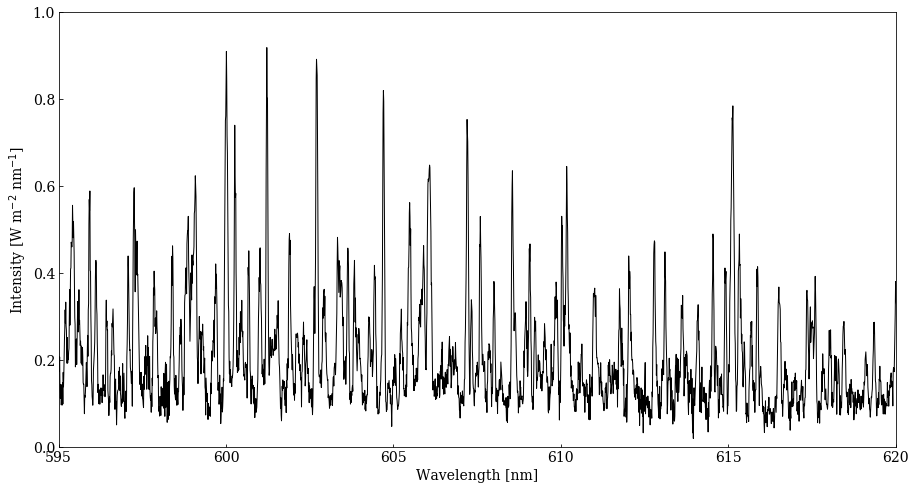

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
gcf().set_size_inches([15,8])

x = data[0]
y = data[7] # frame 12 -> collapse frame? 
f = interpolate.interp1d(x, y, 'cubic')
plot(x, f(x), color="black", linewidth=1)

xlim(595, 620)
ylim(0, 1)
xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ nm$^{-1}$]")

Text(0,0.5,'Intensity [W m$^{-2}$ nm$^{-1}$]')

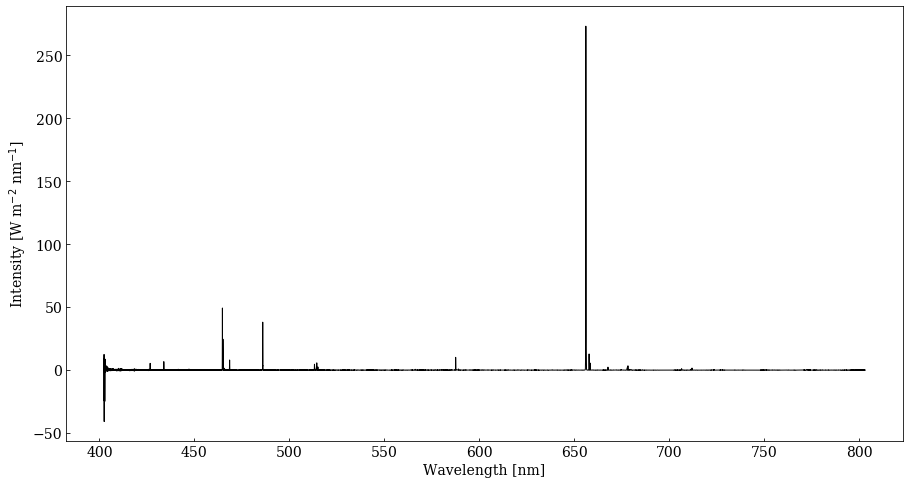

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
gcf().set_size_inches([15,8])

xc = data[0]
yc = data[25] # frame 12 -> collapse frame? 
fc = interpolate.interp1d(xc, yc, 'cubic')
plot(xc, fc(xc), color="black", linewidth=1)

#xlim(595, 620)
#ylim(0, 1)
xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ nm$^{-1}$]")

1.271395
Amplitude      = 40.33708561579575
Standard error = 0.5547699773674816
Relative error = 1.3753348039359519 %
fwhm           = 0.13647653129242754


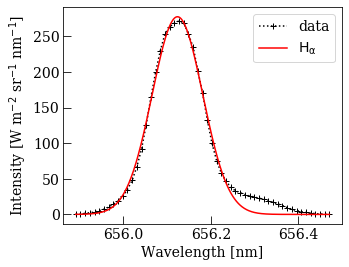

In [ ]:
a = 656.28 - 0.4
b = 656.28 + 0.2
index = np.where((a<xc) & (xc<b))[0]

xx = xc[index[0]:index[-1]+1] 
yy = yc[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, '+', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label=r'$\rm{H_{\alpha}}$')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

0.01666138
Amplitude      = 3.4174460760453704
Standard error = 0.04878065699348777
Relative error = 1.4274009277107949 %
fwhm           = 0.08883078138216677


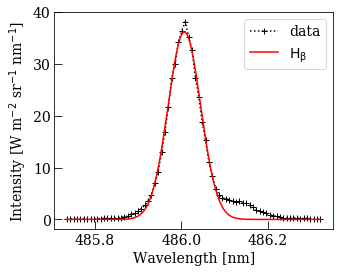

In [ ]:
a = 486.13 - 0.4
b = 486.13 + 0.2
index = np.where((a<xc) & (xc<b))[0]

xx = xc[index[0]:index[-1]+1] 
yy = yc[index[0]:index[-1]+1]
print(yy.min())
#yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, '+', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label=r'$\rm{H_{\beta}}$')

amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

-0.1120056
Amplitude      = 0.5426855046467074
Standard error = 0.013761570661862219
Relative error = 2.5358279416033254 %
fwhm           = 0.08338978095064463


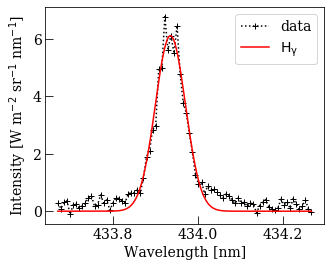

In [ ]:
a = 434.07 - 0.4
b = 434.07 + 0.2
index = np.where((a<xc) & (xc<b))[0]

xx = xc[index[0]:index[-1]+1] 
yy = yc[index[0]:index[-1]+1]
print(yy.min())
#yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, '+', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label=r'$\rm{H_{\gamma}}$')

amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

-0.429744
Amplitude      = 0.10984375350503268
Standard error = 0.010759055502556965
Relative error = 9.794872406708151 %
fwhm           = 0.10240399832095377


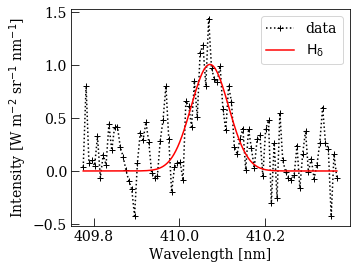

In [ ]:
a = 410.17 - 0.4
b = 410.17 + 0.2
index = np.where((a<xc) & (xc<b))[0]

xx = xc[index[0]:index[-1]+1] 
yy = yc[index[0]:index[-1]+1]
print(yy.min())
#yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, '+', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label=r'$\rm{H_{\delta}}$')

amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

21.372144109876164


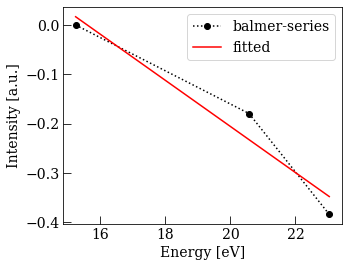

In [ ]:
balmer = np.array([3.71254/4.4101e+07/18, 1.052784/8.4193e+06/32, 0.4028337/2.5304e+06/50])
#plot(np.array([1.133, 1.700, 2.040, 2.267]), np.log(balmer/balmer[3]), 'o:', c='black', label=r'$\rm{H_{\alpha,\beta,\gamma,\delta}}$')
#plot(np.array([1.133, 1.700, 2.040, 2.267]), np.poly1d(np.polyfit(np.array([1.133, 1.700, 2.040, 2.267]), np.log(balmer/balmer[3]), 1))(np.array([1.133, 1.700, 2.040, 2.267])), '-', c='r', label='fitted')
#print(-1/np.polyfit(np.array([1.133, 1.700, 2.040, 2.267]), np.log(balmer/balmer[3]), 1)[0] ,'[eV]')

#plot(np.array([1.888, 2.5496, 2.8556, 3.0218]), np.log(balmer/balmer[0]), 'o:', c='black', label='balmer-series')
plot(np.array([15.238, 20.571, 23.039]), np.log(balmer/balmer[0]), 'o:', c='black', label='balmer-series')
plot(np.array([15.238, 20.571, 23.039]), np.poly1d(np.polyfit(np.array([15.238, 20.571, 23.039]), np.log(balmer/balmer[0]), 1))(np.array([15.238, 20.571, 23.039])), '-', c='r', label='fitted')
print(-1/np.polyfit((np.array([15.238, 20.571, 23.039])), np.log(balmer/balmer[0]), 1)[0])

#yscale('log')

ylabel("Intensity [a.u.]")
xlabel("Energy ($\mathrm{13.6[\dfrac{1}{n_1^2}-\dfrac{1}{n_2^2}]}$) [eV]")
xlabel("Energy [eV]")
#xlim(1,2.5)
#ylim(-5.2,0.2)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])


Text(0,0.5,'Intensity [W m$^{-2}$ nm$^{-1}$]')

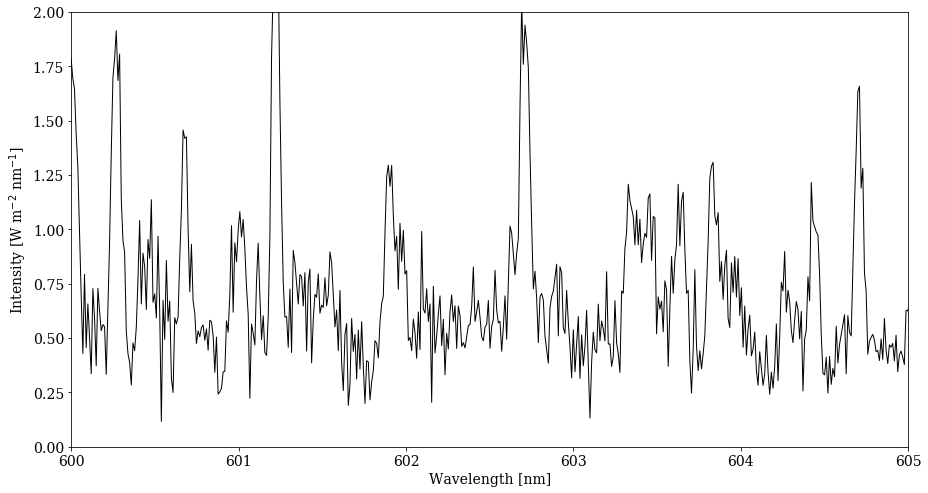

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
gcf().set_size_inches([15,8])

x = data[0]
y = np.sum(data[10:20],axis=0)
f = interpolate.interp1d(x, y, 'cubic')
plot(x, f(x), color="black", linewidth=1)

xlim(600, 605)
ylim(0, 2)
xlabel("Wavelength [nm]")
ylabel("Intensity [W m$^{-2}$ nm$^{-1}$]")

Intensity_min  = 0.08118202
Amplitude      = 0.08294278069615503
Standard error = 0.002022709848632148
Relative error = 2.438681017992341 %
fwhm           = 0.09958708209422996


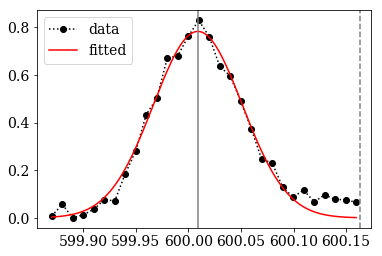

In [ ]:
vv = 0
NN = 0

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
axvline(wl[vv,NN], c='gray', ls='--') 
axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

#plot(wl_s,int_s*1e-7,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)

Intensity_min  = 0.139869
Amplitude      = 0.044291221170050396
Standard error = 0.0037588185224924813
Relative error = 8.486599428046892 %
fwhm           = 0.07378250262901836
Wl shift       = 0.16777648360664443


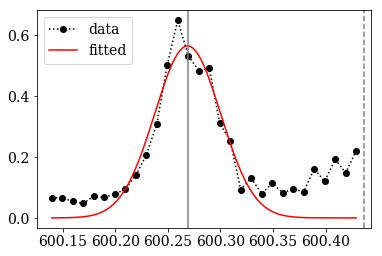

In [ ]:
vv = 0
NN = 1

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
#yy = yy - abs(yy.min())
yy = yy - 0.092326

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
axvline(wl[vv,NN], c='gray', ls='--') 
axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr

print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
print('Wl shift       =',wl[vv,NN]-v['center'])

legend()

#plot(wl_s+0.0137,int_s*1e-8,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)

Intensity_min  = 0.139869
Amplitude      = 0.03629913406242456
Standard error = 0.002462258222948627
Relative error = 6.783242318437177 %
fwhm           = 0.06320595298071183
Wl shift       = 0.16811654690650357


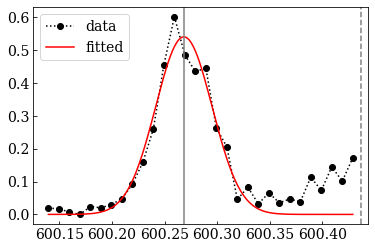

In [ ]:
vv = 0
NN = 1

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())
#yy = yy - 0.092326

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
axvline(wl[vv,NN], c='gray', ls='--') 
axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr

print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
print('Wl shift       =',wl[vv,NN]-v['center'])

legend()

#plot(wl_s+0.0137,int_s*1e-8,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)

Intensity_min  = 0.09959522
Amplitude      = 0.021676183319584093
Standard error = 0.0015624602566623213
Relative error = 7.208188976934251 %
fwhm           = 0.05962174460551633
Wl shift       = 0.16908083066380186


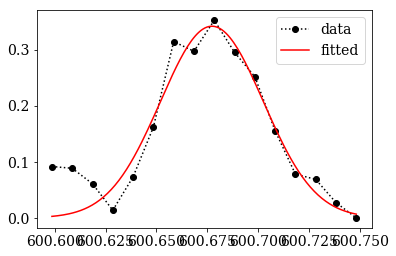

In [ ]:
vv = 0
NN = 2

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.09
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
print('Wl shift       =',wl[vv,NN]-v['center'])
legend()

#plot(wl_s+0.0137,int_s*1e-8,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)

0.0992998
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 822
    # data points      = 25
    # variables        = 6
    chi-square         = 0.02903384
    reduced chi-square = 0.00152810
    Akaike info crit   = -156.954223
    Bayesian info crit = -149.640968
[[Variables]]
    p1_sigma:      0.05000000 +/- 8.9780e-08 (0.00%) (init = 0.02)
    p1_center:     600.666765 +/- 0.01827233 (0.00%) (init = 600.66)
    p1_amplitude:  0.01207821 +/- 0.00424876 (35.18%) (init = 0.01)
    p2_sigma:      0.01977121 +/- 0.00286419 (14.49%) (init = 0.02)
    p2_center:     600.680000 +/- 0.00310242 (0.00%) (init = 600.68)
    p2_amplitude:  0.01231055 +/- 0.00330053 (26.81%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 2.1142e-07 (0.00%) == '2.3548200*p1_sigma'
    p1_height:     0.09637020 +/- 0.03390019 (35.18%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.0

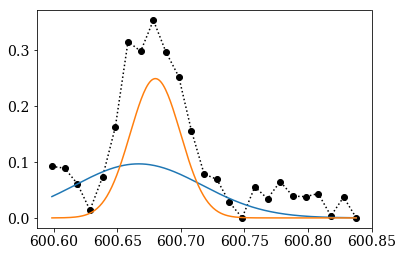

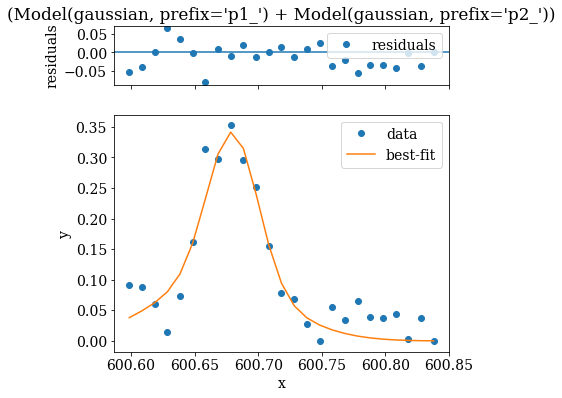

In [ ]:
vv = 0
NN = 2

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=600.66, min=600.65, max=600.67)
model.set_param_hint('p2_center', value=600.68, min=600.67, max=600.69)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=0.5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.09232684
Amplitude      = 0.053029144065265904
Standard error = 0.005741118508268529
Relative error = 10.826345794310042 %
fwhm           = 0.06264748658674833
Wl shift       = 0.16948277237065668


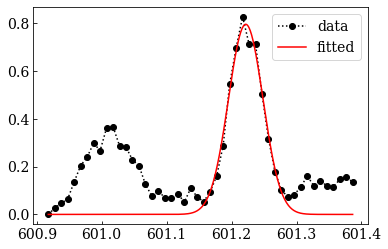

In [ ]:
vv = 0
NN = 3

a = wl[vv,NN] - 0.48
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

#plot(wl_s+0.0137,int_s*1e-7,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)
print('Wl shift       =',wl[vv,NN]-v['center'])

Intensity_min  = 0.07989489
Amplitude      = 0.03910995043943739
Standard error = 0.0023948639280990426
Relative error = 6.123413354377786 %
fwhm           = 0.10064969559920037
Wl shift       = 0.16802380820945473


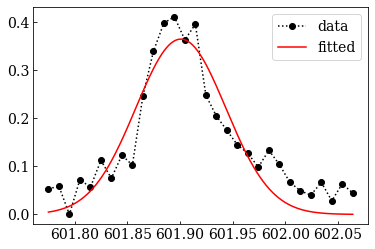

In [ ]:
vv = 0
NN = 4

a = wl[vv,NN] - 0.3
b = wl[vv,NN] - 0.
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

#plot(wl_s+0.0137,int_s*1e-7,'-',c='b')
#xlim(a, b)
#\ylim(-0.5, yyy.max()+0.5)
print('Wl shift       =',wl[vv,NN]-v['center'])

0.07989489
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 942
    # data points      = 37
    # variables        = 6
    chi-square         = 0.09636641
    reduced chi-square = 0.00310859
    Akaike info crit   = -208.169075
    Bayesian info crit = -198.503567
[[Variables]]
    p1_sigma:      0.03341624 +/- 0.00417255 (12.49%) (init = 0.02)
    p1_center:     601.900000 +/- 3.7484e-05 (0.00%) (init = 601.905)
    p1_amplitude:  0.03130634 +/- 0.00489603 (15.64%) (init = 0.01)
    p2_sigma:      0.04999598 +/- 3.2130e-04 (0.64%) (init = 0.02)
    p2_center:     601.980274 +/- 0.05585348 (0.01%) (init = 601.98)
    p2_amplitude:  0.00894706 +/- 0.00320988 (35.88%) (init = 0.01)
    p1_fwhm:       0.07868924 +/- 0.00982561 (12.49%) == '2.3548200*p1_sigma'
    p1_height:     0.37375312 +/- 0.04751178 (12.71%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       

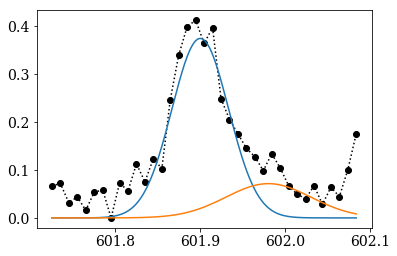

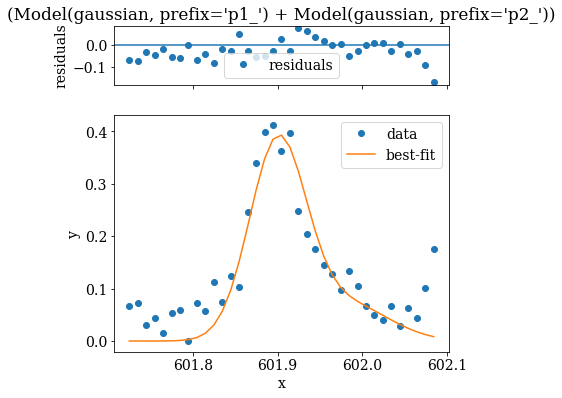

In [ ]:
vv = 0
NN = 4

a = wl[vv,NN] - 0.35
b = wl[vv,NN] + 0.02
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=601.905, min=601.9, max=601.92)
model.set_param_hint('p2_center', value=601.98, min=601.96, max=602.0)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=0.5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())



Intensity_min  = 0.07495819
Amplitude      = 0.07166862783501163
Standard error = 0.004176708756367901
Relative error = 5.82780622782831 %
fwhm           = 0.0868665092922603


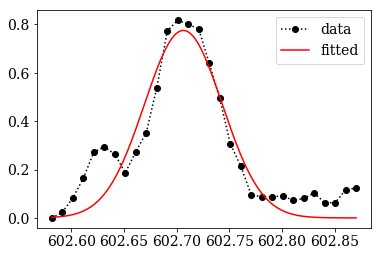

In [ ]:
vv = 0
NN = 5

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

#plot(wl_s+0.0137,int_s*1e-7,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)
#print('Wl shift       =',wl[vv,NN]-v['center'])

0.09792505
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 852
    # data points      = 29
    # variables        = 6
    chi-square         = 0.05231872
    reduced chi-square = 0.00227473
    Akaike info crit   = -171.213211
    Bayesian info crit = -163.009436
[[Variables]]
    p1_sigma:      0.02929436 +/- 0.00125237 (4.28%) (init = 0.02)
    p1_center:     602.709119 +/- 0.00112139 (0.00%) (init = 602.71)
    p1_amplitude:  0.06035610 +/- 0.00209642 (3.47%) (init = 0.01)
    p2_sigma:      0.01436690 +/- 0.00254186 (17.69%) (init = 0.02)
    p2_center:     602.629937 +/- 0.00256366 (0.00%) (init = 602.63)
    p2_amplitude:  0.00901359 +/- 0.00150472 (16.69%) (init = 0.01)
    p1_fwhm:       0.06898295 +/- 0.00294911 (4.28%) == '2.3548200*p1_sigma'
    p1_height:     0.82195351 +/- 0.02639354 (3.21%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.06

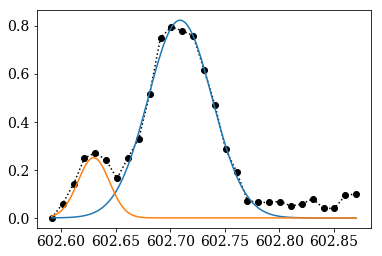

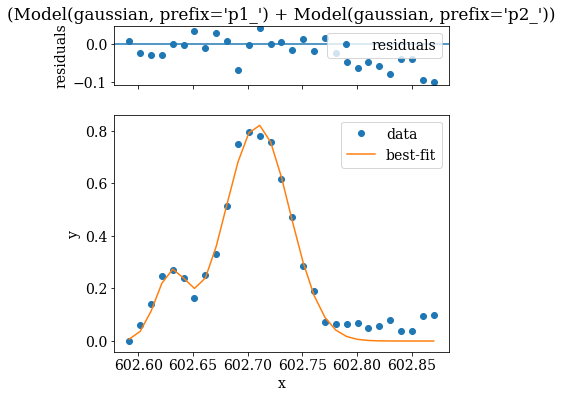

In [ ]:
vv = 0
NN = 5

a = wl[vv,NN] - 0.29
b = wl[vv,NN] + 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=602.71, min=602.69, max=602.73)
model.set_param_hint('p2_center', value=602.63, min=602.62, max=602.64)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=0.5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.08, min=0.06, max=0.09)
model.set_param_hint('p2_fwhm', value=0.08, min=0.06, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.3845137600000001
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 2771
    # data points      = 30
    # variables        = 9
    chi-square         = 0.39586882
    reduced chi-square = 0.01885090
    Akaike info crit   = -111.836093
    Bayesian info crit = -99.2253169
[[Variables]]
    p1_sigma:      0.49926225 +/- 0.09732784 (19.49%) (init = 0.02)
    p1_center:     602.810000 +/- 0.54022653 (0.09%) (init = 602.81)
    p1_amplitude:  0.25272007 +/- 0.07130059 (28.21%) (init = 0.01)
    p2_sigma:      0.02762578 +/- 0.00199303 (7.21%) (init = 0.02)
    p2_center:     602.708967 +/- 0.00177854 (0.00%) (init = 602.72)
    p2_amplitude:  0.09958911 +/- 0.00859509 (8.63%) (init = 0.01)
    p3_sigma:      0.01180883 +/- 0.00360560 (30.53%) (init = 0.02)
    p3_center:     602.630391 +/- 0.00428118 (0.00%) (init = 602.63)
    p3_amplitude:  0.01

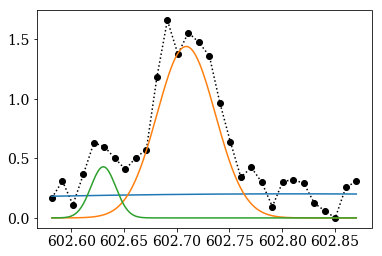

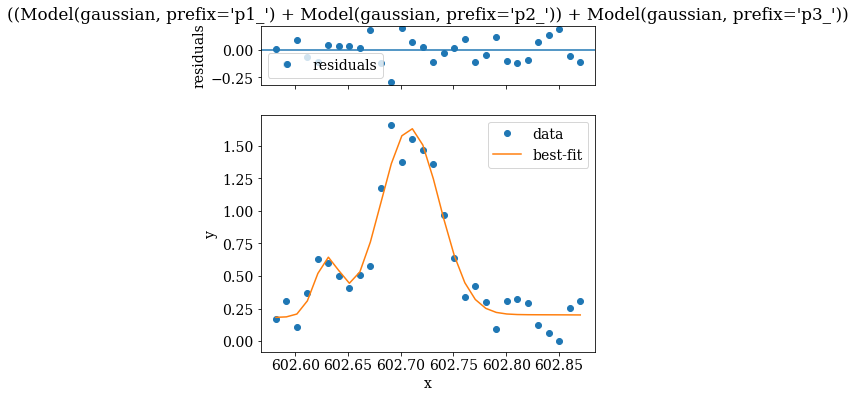

In [ ]:
vv = 0
NN = 5

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=602.81, min=602.8, max=602.82)
model.set_param_hint('p2_center', value=602.72, min=602.7, max=602.74)
model.set_param_hint('p3_center', value=602.63, min=602.62, max=602.64)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=0.5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.08, min=0.06, max=0.09)
model.set_param_hint('p2_fwhm', value=0.08, min=0.06, max=0.09)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.09945576
Amplitude      = 0.028162506627175406
Standard error = 0.003380482526208936
Relative error = 12.003485950170855 %
fwhm           = 0.07443240251646839
Wl shift       = 0.1797549187358527


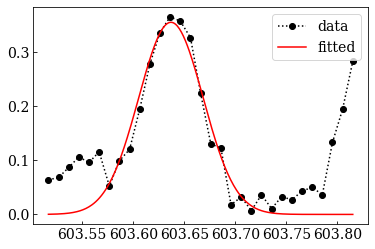

In [ ]:
vv = 0
NN = 6

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
#yy = yy - abs(yy.min())
yy = yy - 0.092326

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

#plot(wl_s+0.0137,int_s*1e-7,'-',c='b')
#xlim(a, b)
#ylim(-0.5, yyy.max()+0.5)
print('Wl shift       =',wl[vv,NN]-v['center'])

0.09945576
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 803
    # data points      = 25
    # variables        = 6
    chi-square         = 0.13699196
    reduced chi-square = 0.00721010
    Akaike info crit   = -118.167722
    Bayesian info crit = -110.854467
[[Variables]]
    p1_sigma:      0.02454872 +/- 0.01701275 (69.30%) (init = 0.02)
    p1_center:     603.619939 +/- 0.02690691 (0.00%) (init = 603.62)
    p1_amplitude:  0.01130519 +/- 0.01185593 (104.87%) (init = 0.01)
    p2_sigma:      0.02263633 +/- 0.00762175 (33.67%) (init = 0.02)
    p2_center:     603.650000 +/- 5.5938e-05 (0.00%) (init = 603.68)
    p2_amplitude:  0.01392265 +/- 0.01141114 (81.96%) (init = 0.01)
    p1_fwhm:       0.05780782 +/- 0.04006197 (69.30%) == '2.3548200*p1_sigma'
    p1_height:     0.18372115 +/- 0.09372730 (51.02%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:      

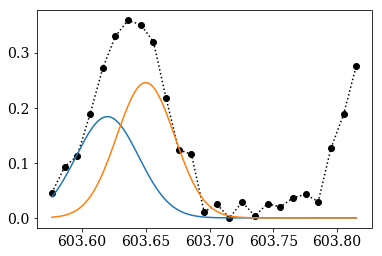

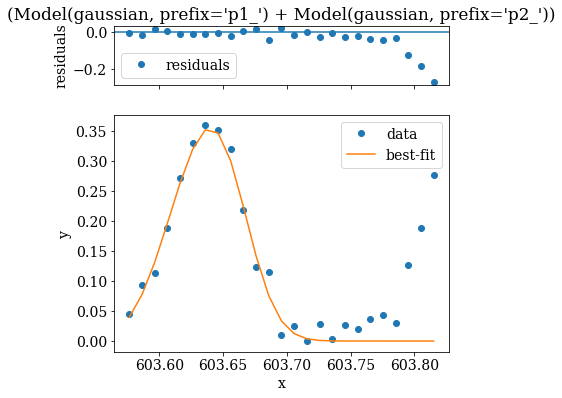

In [ ]:
vv = 0
NN = 6

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=603.62, min=603.60, max=603.64)
model.set_param_hint('p2_center', value=603.68, min=603.65, max=603.69)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=0.5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.08223678
Amplitude      = 0.052043512689690936
Standard error = 0.0017415777059708222
Relative error = 3.3463876974541793 %
fwhm           = 0.06704318379970317


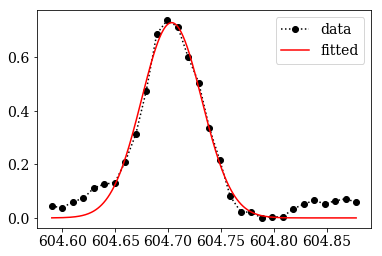

In [ ]:
vv = 0
NN = 7

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1784105
Amplitude      = 6.160431934512114e+24
Standard error = None


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

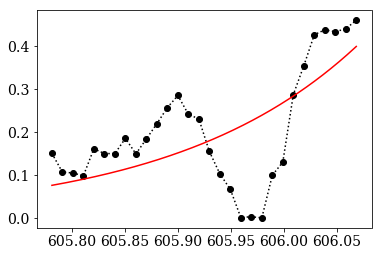

In [ ]:
vv = 0
NN = 8

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.1098104
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1409
    # data points      = 63
    # variables        = 9
    chi-square         = 0.05720110
    reduced chi-square = 0.00105928
    Akaike info crit   = -423.271962
    Bayesian info crit = -403.983749
[[Variables]]
    p1_sigma:      0.03054787 +/- 0.00269479 (8.82%) (init = 0.02)
    p1_center:     605.899591 +/- 0.00295239 (0.00%) (init = 605.9)
    p1_amplitude:  0.02380787 +/- 0.00229694 (9.65%) (init = 0.01)
    p2_sigma:      0.04999999 +/- 4.4258e-06 (0.01%) (init = 0.02)
    p2_center:     606.067758 +/- 0.00137678 (0.00%) (init = 606.09)
    p2_amplitude:  0.07235836 +/- 0.00136720 (1.89%) (init = 0.01)
    p3_sigma:      0.04977237 +/- 0.00145261 (2.92%) (init = 0.02)
    p3_center:     605.800000 +/- 0.00650969 (0.00%) (init = 605.8)
    p3_amplitude:  0.02450969 +/- 0.0

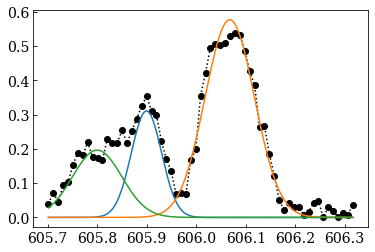

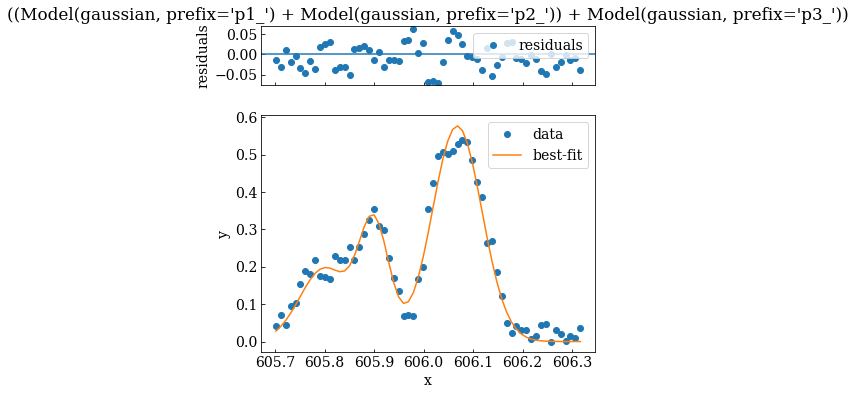

In [ ]:
vv = 0
NN = 8

a = wl[vv,NN] - 0.38
b = wl[vv,NN] + 0.25
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=605.9, min=605.88, max=605.92)
model.set_param_hint('p2_center', value=606.09, min=606.06, max=606.1)
model.set_param_hint('p3_center', value=605.8, min=605.78, max=605.82)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.09)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.0951853
Amplitude      = 0.052310235763035895
Standard error = 0.004334311193641877
Relative error = 8.28578026923106 %
fwhm           = 0.07774658519352531


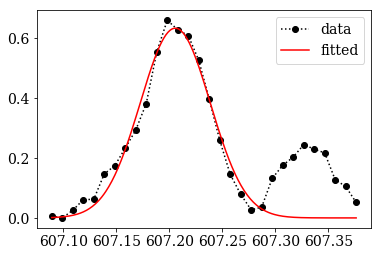

In [ ]:
vv = 0
NN = 9

a = wl[vv,NN] - 0.3
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.0951853
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 396
    # data points      = 21
    # variables        = 6
    chi-square         = 0.02126609
    reduced chi-square = 0.00141774
    Akaike info crit   = -132.798439
    Bayesian info crit = -126.531304
[[Variables]]
    p1_sigma:      0.01620780 +/- 0.00612360 (37.78%) (init = 0.02)
    p1_center:     607.140027 +/- 0.00706888 (0.00%) (init = 607.14)
    p1_amplitude:  0.00369142 +/- 0.00164519 (44.57%) (init = 0.01)
    p2_sigma:      0.02972088 +/- 0.00154015 (5.18%) (init = 0.02)
    p2_center:     607.207084 +/- 0.00136799 (0.00%) (init = 607.205)
    p2_amplitude:  0.04615283 +/- 0.00206907 (4.48%) (init = 0.01)
    p1_fwhm:       0.05000000 +/- 0.01441998 (28.84%) == '2.3548200*p1_sigma'
    p1_height:     0.09086144 +/- 0.03248620 (35.75%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.

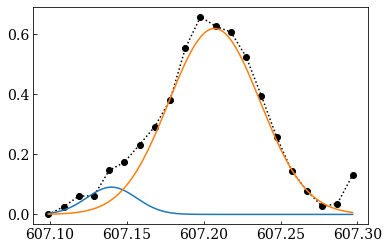

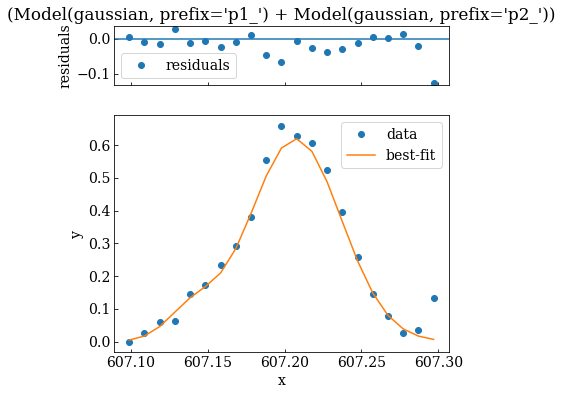

In [ ]:
vv = 0
NN = 9

a = wl[vv,NN] - 0.29
b = wl[vv,NN] - 0.08
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=607.14, min=607.13, max=607.15)
model.set_param_hint('p2_center', value=607.205, min=607.2, max=607.22)
#model.set_param_hint('p3_center', value=623.82, min=623.80, max=623.84)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.08)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

In [ ]:
vv = 0
NN = 10

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

IndexError: index 0 is out of bounds for axis 0 with size 0

Intensity_min  = 0.1288735
Amplitude      = 0.05245606772073108
Standard error = 0.0038649177975015
Relative error = 7.367913695090134 %
fwhm           = 0.12964301332149036


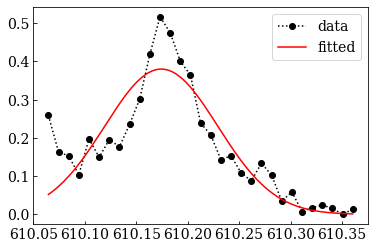

In [ ]:
vv = 0
NN = 11

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.1028271
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1005
    # data points      = 36
    # variables        = 6
    chi-square         = 0.08973823
    reduced chi-square = 0.00299127
    Akaike info crit   = -203.797585
    Bayesian info crit = -194.296471
[[Variables]]
    p1_sigma:      0.02566464 +/- 0.00261499 (10.19%) (init = 0.02)
    p1_center:     610.037551 +/- 0.00252453 (0.00%) (init = 610.04)
    p1_amplitude:  0.02705958 +/- 0.00239935 (8.87%) (init = 0.01)
    p2_sigma:      0.04893009 +/- 0.00436183 (8.91%) (init = 0.02)
    p2_center:     610.180000 +/- 0.00310421 (0.00%) (init = 610.18)
    p2_amplitude:  0.05008619 +/- 0.00341550 (6.82%) (init = 0.01)
    p1_fwhm:       0.06043560 +/- 0.00615782 (10.19%) == '2.3548200*p1_sigma'
    p1_height:     0.42062583 +/- 0.03158034 (7.51%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.09

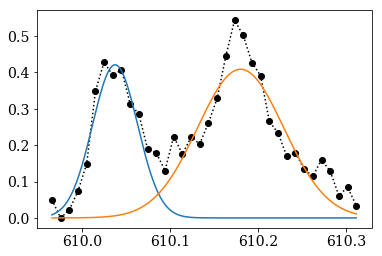

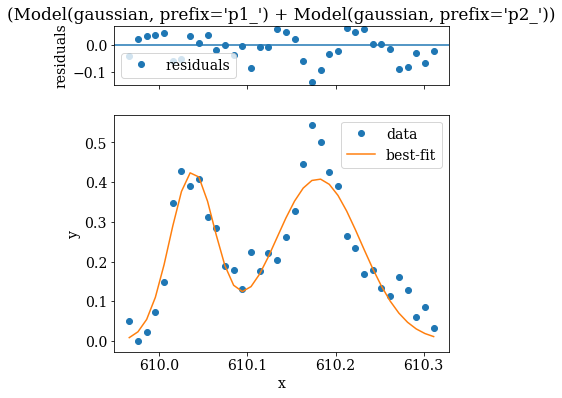

In [ ]:
vv = 0
NN = 11

a = wl[vv,NN] - 0.4
b = wl[vv,NN] - 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=610.04, min=610.02, max=610.06)
model.set_param_hint('p2_center', value=610.18, min=610.16, max=610.2)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.092453
[[Model]]
    (((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_')) + Model(gaussian, prefix='p4_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 2571
    # data points      = 46
    # variables        = 12
    chi-square         = 0.04088681
    reduced chi-square = 0.00120255
    Akaike info crit   = -299.177099
    Bayesian info crit = -277.233402
[[Variables]]
    p1_sigma:      0.02667112 +/- 0.00212452 (7.97%) (init = 0.02)
    p1_center:     610.039914 +/- 0.00200781 (0.00%) (init = 610.04)
    p1_amplitude:  0.02922172 +/- 0.00183814 (6.29%) (init = 0.01)
    p2_sigma:      0.03058755 +/- 0.00342714 (11.20%) (init = 0.02)
    p2_center:     610.180000 +/- 0.00198376 (0.00%) (init = 610.18)
    p2_amplitude:  0.03883029 +/- 0.00394555 (10.16%) (init = 0.01)
    p3_sigma:      0.04178115 +/- 0.00999857 (23.93%) (init = 0.02)
    p3_center:     610.280147 +/- 0.01187521 (0.00%) (init = 610.28

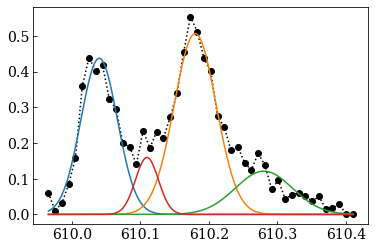

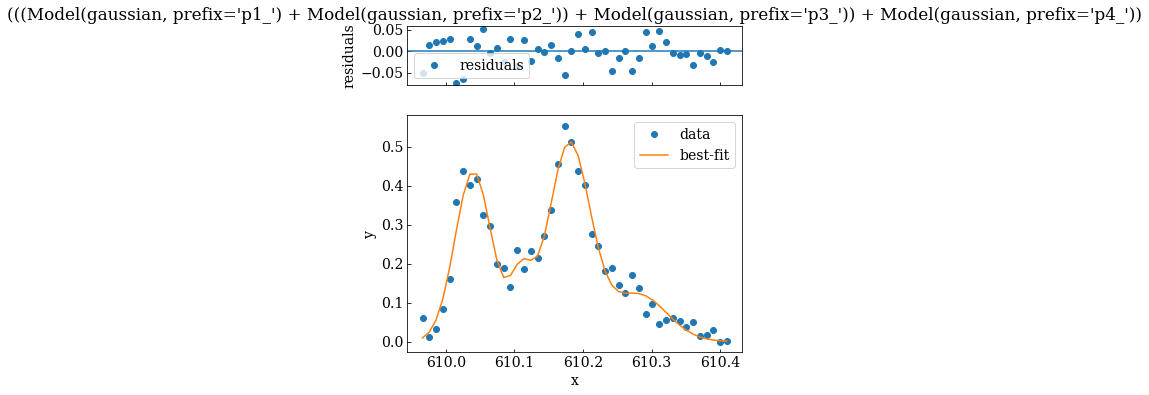

In [ ]:
vv = 0
NN = 11

a = wl[vv,NN] - 0.4
b = wl[vv,NN] + 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 + peak4

model.set_param_hint('p1_center', value=610.04, min=610.02, max=610.06)
model.set_param_hint('p2_center', value=610.18, min=610.16, max=610.2)
model.set_param_hint('p3_center', value=610.28, min=610.26, max=610.3)
model.set_param_hint('p4_center', value=610.115, min=610.09, max=610.13)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=5)
model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.1)
model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.1)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.05773846
Amplitude      = 2.0853063523183057e+23
Standard error = None


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

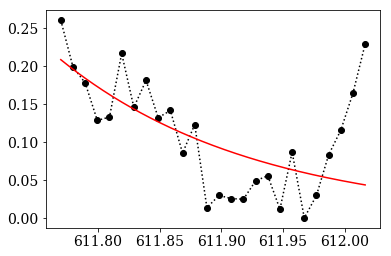

In [ ]:
vv = 0
NN = 12

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1055201
Amplitude      = 0.031209126118385815
Standard error = 0.003606103581520945
Relative error = 11.55464452238068 %
fwhm           = 0.17484273014680032


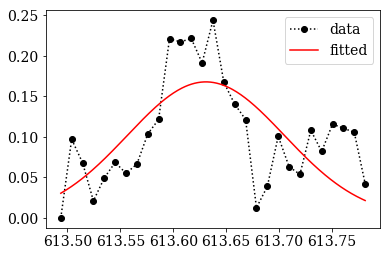

In [ ]:
vv = 0
NN = 13

a = wl[vv,NN] - 0.3
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.100054
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1860
    # data points      = 40
    # variables        = 9
    chi-square         = 0.03814837
    reduced chi-square = 0.00123059
    Akaike info crit   = -260.206065
    Bayesian info crit = -245.006150
[[Variables]]
    p1_sigma:      0.04999504 +/- 2.7085e-04 (0.54%) (init = 0.02)
    p1_center:     613.501901 +/- 0.02026395 (0.00%) (init = 613.5)
    p1_amplitude:  0.00965870 +/- 0.00158834 (16.44%) (init = 0.01)
    p2_sigma:      0.03176641 +/- 0.00380452 (11.98%) (init = 0.02)
    p2_center:     613.620528 +/- 0.00369086 (0.00%) (init = 613.62)
    p2_amplitude:  0.01892713 +/- 0.00220802 (11.67%) (init = 0.01)
    p3_sigma:      0.03701067 +/- 0.01086282 (29.35%) (init = 0.02)
    p3_center:     613.745942 +/- 0.00778934 (0.00%) (init = 613.74)
    p3_amplitude:  0.01162183 +/-

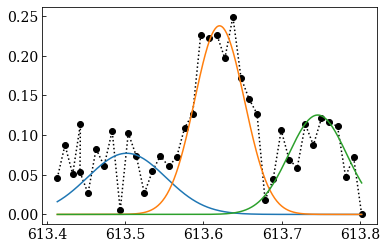

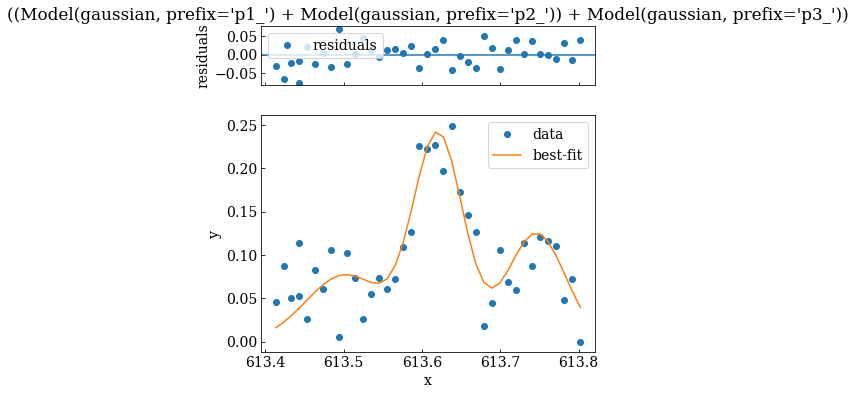

In [ ]:
vv = 0
NN = 13

a = wl[vv,NN] - 0.38
b = wl[vv,NN] + 0.02
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=613.5, min=613.48, max=613.52)
model.set_param_hint('p2_center', value=613.62, min=613.6, max=613.64)
model.set_param_hint('p3_center', value=613.74, min=613.73, max=613.77)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=5)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.09)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.05674913
Amplitude      = 1.701417542098874e+18
Standard error = None


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

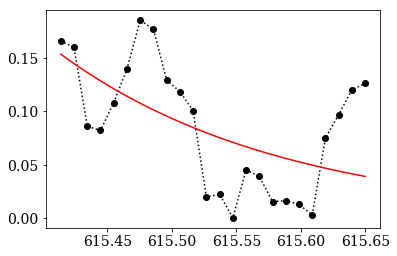

In [ ]:
vv = 0
NN = 14

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.09524905
Amplitude      = 0.0175529940274741
Standard error = 0.0023090426322891727
Relative error = 13.154693886837986 %
fwhm           = 0.07246952512159609


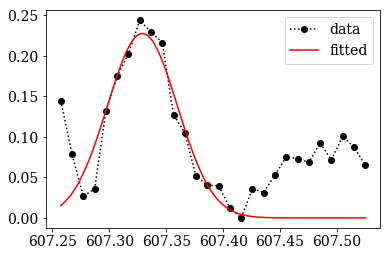

In [ ]:
vv = 1
NN = 0

a = wl[vv,NN] - 0.28
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1040718
Amplitude      = 0.031551927048806036
Standard error = 0.0023023495099936757
Relative error = 7.297017093226321 %
fwhm           = 0.07673355327949302


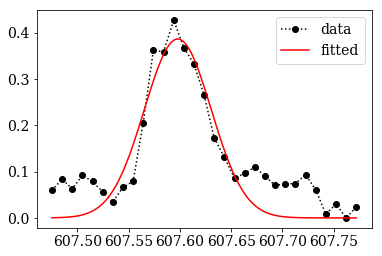

In [ ]:
vv = 1
NN = 1

a = wl[vv,NN] - 0.3
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.09524905
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 253
    # data points      = 27
    # variables        = 6
    chi-square         = 0.03429607
    reduced chi-square = 0.00163315
    Akaike info crit   = -168.051154
    Bayesian info crit = -160.276133
[[Variables]]
    p1_sigma:      0.02910488 +/- 0.00650345 (22.34%) (init = 0.02)
    p1_center:     607.480701 +/- 0.00850160 (0.00%) (init = 607.48)
    p1_amplitude:  0.00679471 +/- 0.00155222 (22.84%) (init = 0.01)
    p2_sigma:      0.03035089 +/- 0.00225089 (7.42%) (init = 0.02)
    p2_center:     607.595005 +/- 0.00187008 (0.00%) (init = 607.595)
    p2_amplitude:  0.02898277 +/- 0.00179611 (6.20%) (init = 0.01)
    p1_fwhm:       0.06853675 +/- 0.01531445 (22.34%) == '2.3548200*p1_sigma'
    p1_height:     0.09313546 +/- 0.02029209 (21.79%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0

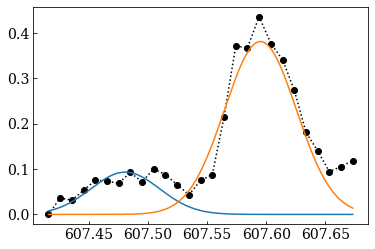

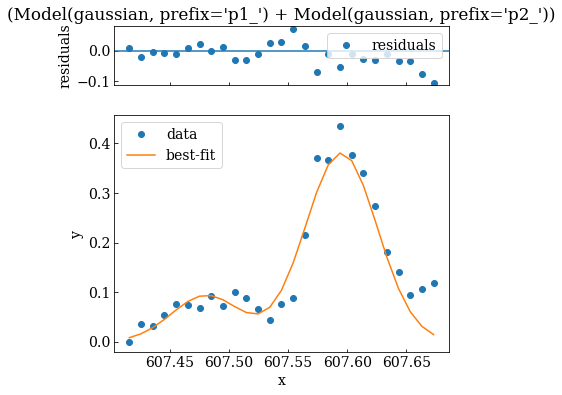

In [ ]:
vv = 1
NN = 1

a = wl[vv,NN] - 0.36
b = wl[vv,NN] - 0.1
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=607.48, min=607.47, max=607.51)
model.set_param_hint('p2_center', value=607.595, min=607.58, max=607.61)
#model.set_param_hint('p3_center', value=607.71, min=607.7, max=607.73)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=5)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.9)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.9)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.09)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.09353574
Amplitude      = 0.01930368361061117
Standard error = 0.0012427069097787147
Relative error = 6.437667208219279 %
fwhm           = 0.06447656800285198


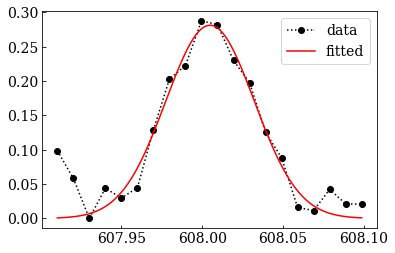

In [ ]:
vv = 1
NN = 2

a = wl[vv,NN] - 0.28
b = wl[vv,NN] - 0.08
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.09235138
Amplitude      = 0.049010927252584005
Standard error = 0.003908135851309565
Relative error = 7.974009206494896 %
fwhm           = 0.1081383691503632


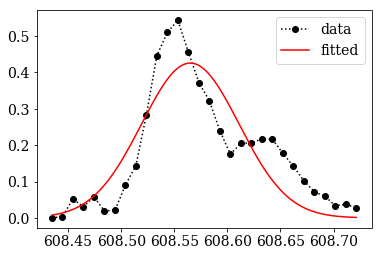

In [ ]:
vv = 1
NN = 3

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.09235138
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 434
    # data points      = 30
    # variables        = 6
    chi-square         = 0.05350752
    reduced chi-square = 0.00222948
    Akaike info crit   = -177.873914
    Bayesian info crit = -169.466730
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p2_center:     at initial value
[[Variables]]
    p1_sigma:      0.02944066 +/- 0.00196250 (6.67%) (init = 0.02)
    p1_center:     608.554404 +/- 0.00208852 (0.00%) (init = 608.56)
    p1_amplitude:  0.03746241 +/- 0.00245727 (6.56%) (init = 0.01)
    p2_sigma:      0.03646676 +/-        nan (nan%) (init = 0.02)
    p2_center:     608.659995 +/-        nan (nan%) (init = 608.66)
    p2_amplitude:  0.01344447 +/- 0.00280581 (20.87%) (init = 0.01)
    p1_fwhm:       0.06932745 +/- 0.00628288 (9.06%) == '2.3548200*p1_sigma'
    p1

C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


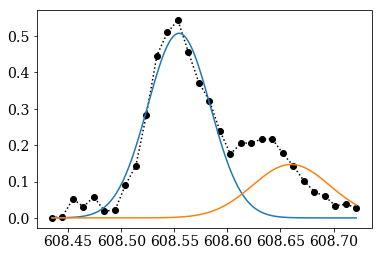

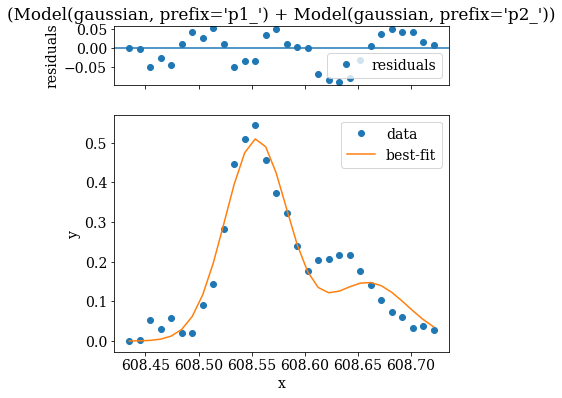

In [ ]:
vv = 1
NN = 3

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=608.56, min=608.54, max=608.57)
model.set_param_hint('p2_center', value=608.66, min=608.65, max=608.67)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.09235138
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1038
    # data points      = 30
    # variables        = 6
    chi-square         = 0.01867877
    reduced chi-square = 7.7828e-04
    Akaike info crit   = -209.446949
    Bayesian info crit = -201.039764
[[Variables]]
    p1_sigma:      0.02641102 +/- 0.00111860 (4.24%) (init = 0.02)
    p1_center:     608.552649 +/- 0.00102637 (0.00%) (init = 608.56)
    p1_amplitude:  0.03507751 +/- 0.00122135 (3.48%) (init = 0.01)
    p2_sigma:      0.02547965 +/- 2.9559e-08 (0.00%) (init = 0.02)
    p2_center:     608.637301 +/- 0.00281182 (0.00%) (init = 608.63)
    p2_amplitude:  0.01308422 +/- 9.1364e-04 (6.98%) (init = 0.01)
    p1_fwhm:       0.06219321 +/- 0.00263410 (4.24%) == '2.3548200*p1_sigma'
    p1_height:     0.52985078 +/- 0.01612554 (3.04%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.060

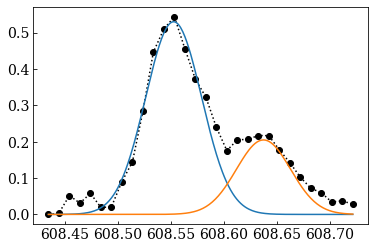

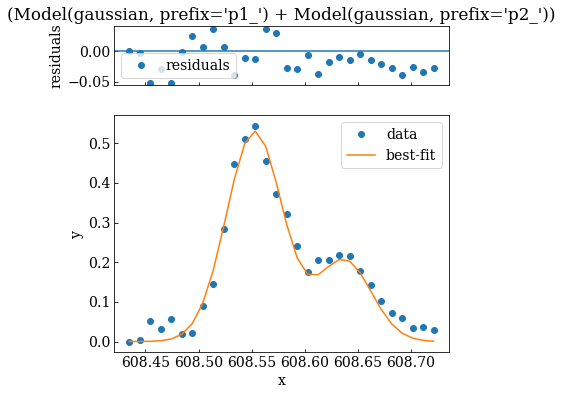

In [ ]:
vv = 1
NN = 3

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=608.56, min=608.54, max=608.57)
model.set_param_hint('p2_center', value=608.63, min=608.63, max=608.65)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.06/2.3548200)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.08677455
Amplitude      = 0.03607310233546807
Standard error = 0.0068491695780792256
Relative error = 18.98691583103717 %
fwhm           = 0.2731325321103061


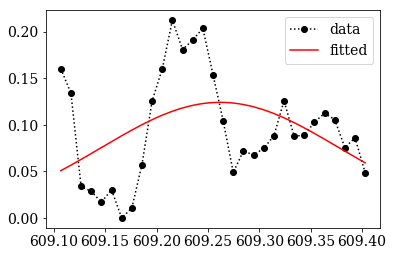

In [ ]:
vv = 1
NN = 4

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.08677455
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 888
    # data points      = 26
    # variables        = 6
    chi-square         = 0.01011994
    reduced chi-square = 5.0600e-04
    Akaike info crit   = -192.134948
    Bayesian info crit = -184.586369
[[Variables]]
    p1_sigma:      0.02833576 +/- 0.00215178 (7.59%) (init = 0.02)
    p1_center:     609.227758 +/- 0.00205814 (0.00%) (init = 609.22)
    p1_amplitude:  0.01486366 +/- 9.8315e-04 (6.61%) (init = 0.01)
    p2_sigma:      0.04999949 +/- 8.0479e-05 (0.16%) (init = 0.02)
    p2_center:     609.364418 +/- 0.00847566 (0.00%) (init = 609.36)
    p2_amplitude:  0.01211393 +/- 0.00101310 (8.36%) (init = 0.01)
    p1_fwhm:       0.06672562 +/- 0.00506705 (7.59%) == '2.3548200*p1_sigma'
    p1_height:     0.20926716 +/- 0.01226878 (5.86%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.0700

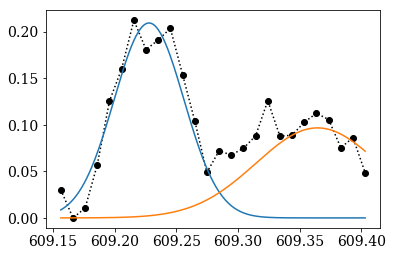

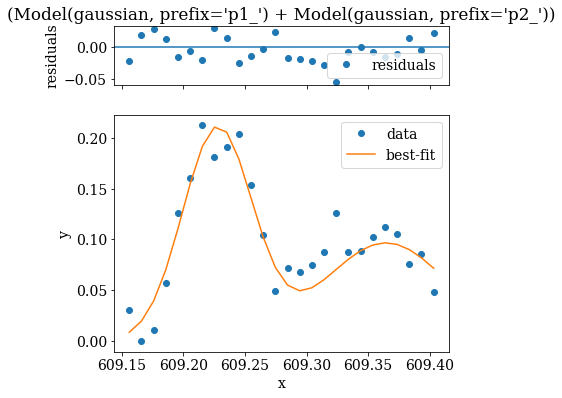

In [ ]:
vv = 1
NN = 4

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=609.22, min=609.2, max=609.24)
model.set_param_hint('p2_center', value=609.36, min=609.34, max=609.38)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.06, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.07)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.1028271
Amplitude      = 0.2393070915856723
Standard error = 0.4106668068193728
Relative error = 171.60661813164592 %
fwhm           = 0.5193774381535812


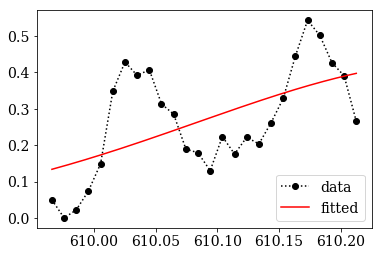

In [ ]:
vv = 1
NN = 5

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.1028271
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 231
    # data points      = 31
    # variables        = 6
    chi-square         = 0.06459309
    reduced chi-square = 0.00258372
    Akaike info crit   = -179.382685
    Bayesian info crit = -170.778761
[[Variables]]
    p1_sigma:      0.02781778 +/- 0.00274116 (9.85%) (init = 0.02)
    p1_center:     610.039970 +/- 0.00252218 (0.00%) (init = 610.04)
    p1_amplitude:  0.02890669 +/- 0.00227897 (7.88%) (init = 0.01)
    p2_sigma:      0.04259774 +/- 0.00335620 (7.88%) (init = 0.02)
    p2_center:     610.180000 +/- 0.00256787 (0.00%) (init = 610.18)
    p2_amplitude:  0.04597961 +/- 0.00288265 (6.27%) (init = 0.01)
    p1_fwhm:       0.06550585 +/- 0.00645494 (9.85%) == '2.3548200*p1_sigma'
    p1_height:     0.41455876 +/- 0.02923824 (7.05%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.08000

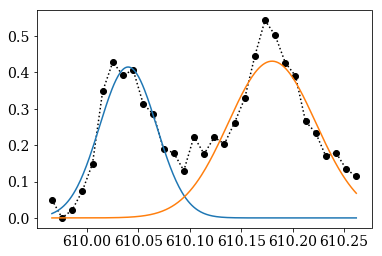

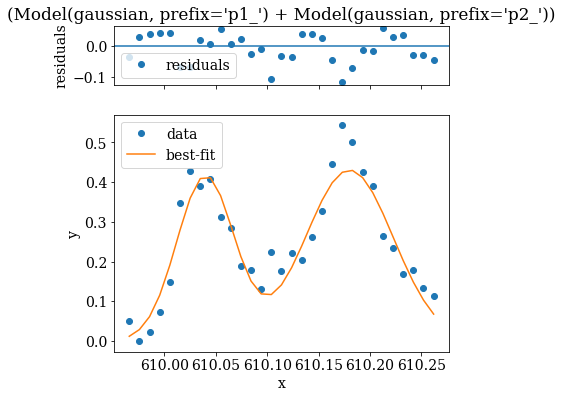

In [ ]:
vv = 1
NN = 5

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=610.04, min=610.02, max=610.06)
model.set_param_hint('p2_center', value=610.18, min=610.16, max=610.2)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.06, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.1176711
Amplitude      = 0.0312400475491067
Standard error = 0.0017529263473025172
Relative error = 5.611151342030021 %
fwhm           = 0.12057612101238009


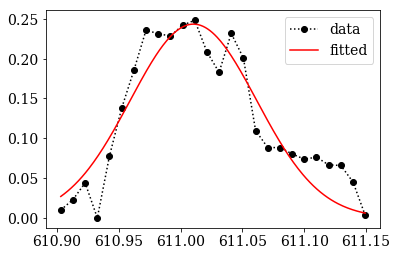

In [ ]:
vv = 1
NN = 6

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.05773846
Amplitude      = 0.04348219252948542
Standard error = 0.003202433686988559
Relative error = 7.364931482737395 %
fwhm           = 0.13187252413347747


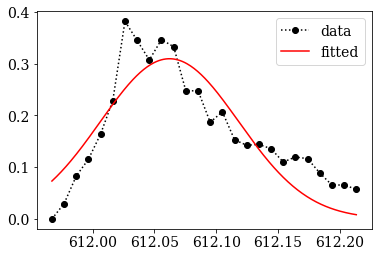

In [ ]:
vv = 1
NN = 7

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.05773846
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 602
    # data points      = 30
    # variables        = 6
    chi-square         = 0.01959366
    reduced chi-square = 8.1640e-04
    Akaike info crit   = -208.012398
    Bayesian info crit = -199.605214
[[Variables]]
    p1_sigma:      0.03119857 +/- 0.00320630 (10.28%) (init = 0.02)
    p1_center:     612.043194 +/- 0.00253837 (0.00%) (init = 612.04)
    p1_amplitude:  0.02239077 +/- 0.00411576 (18.38%) (init = 0.01)
    p2_sigma:      0.07747859 +/- 0.01102846 (14.23%) (init = 0.02)
    p2_center:     612.129002 +/- 0.01706899 (0.00%) (init = 612.13)
    p2_amplitude:  0.02392141 +/- 0.00479550 (20.05%) (init = 0.01)
    p1_fwhm:       0.07346701 +/- 0.00755026 (10.28%) == '2.3548200*p1_sigma'
    p1_height:     0.28631520 +/- 0.03124107 (10.91%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       

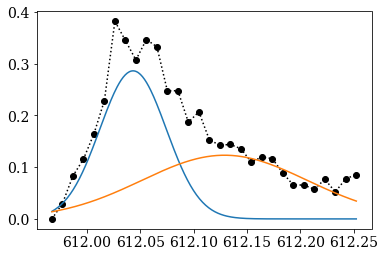

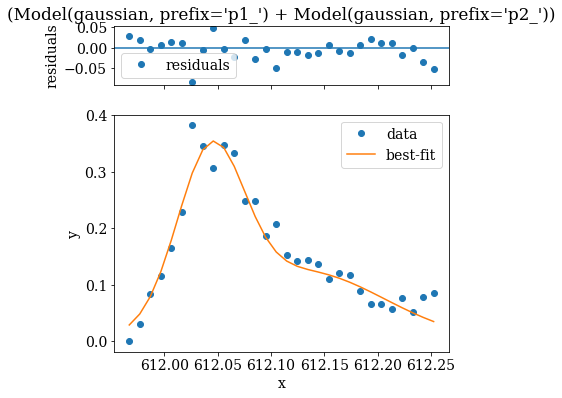

In [ ]:
vv = 1
NN = 7

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.04
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=612.04, min=612.02, max=612.06)
model.set_param_hint('p2_center', value=612.13, min=612.11, max=612.15)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.06, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.07)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.05344882
Amplitude      = 0.024720273944397377
Standard error = 0.004775190402020374
Relative error = 19.316899208969435 %
fwhm           = 0.21529360194759828


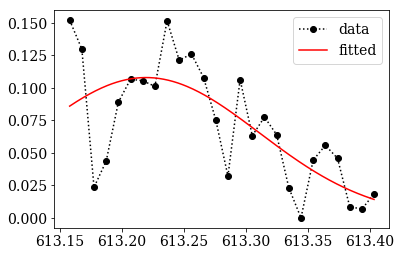

In [ ]:
vv = 1
NN = 8

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.06752983
Amplitude      = 0.030796377780615444
Standard error = 0.003566493649248753
Relative error = 11.580886799919881 %
fwhm           = 0.07945402608608297
Wl shift       = 0.1741348760863275


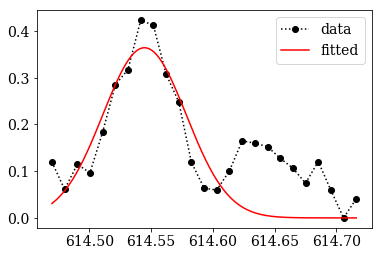

In [ ]:
vv = 1
NN = 9

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()
print('Wl shift       =',wl[vv,NN]-v['center'])

0.1264835
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 554
    # data points      = 23
    # variables        = 6
    chi-square         = 0.02711941
    reduced chi-square = 0.00159526
    Akaike info crit   = -143.088998
    Bayesian info crit = -136.276032
[[Variables]]
    p1_sigma:      0.02492556 +/- 0.00210633 (8.45%) (init = 0.02)
    p1_center:     614.542853 +/- 0.00188114 (0.00%) (init = 614.54)
    p1_amplitude:  0.02385751 +/- 0.00165124 (6.92%) (init = 0.01)
    p2_sigma:      0.03240242 +/- 0.01344237 (41.49%) (init = 0.02)
    p2_center:     614.653395 +/- 0.01312849 (0.00%) (init = 614.65)
    p2_amplitude:  0.00852480 +/- 0.00247037 (28.98%) (init = 0.01)
    p1_fwhm:       0.05869521 +/- 0.00496003 (8.45%) == '2.3548200*p1_sigma'
    p1_height:     0.38184781 +/- 0.02458538 (6.44%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.070

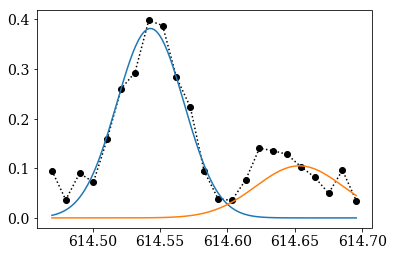

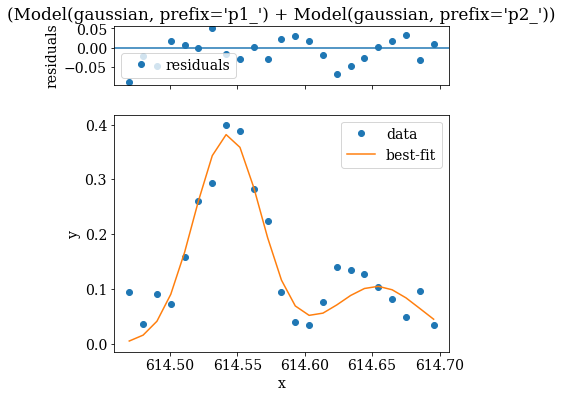

In [ ]:
vv = 1
NN = 9

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.02
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
#yy = yy - abs(yy.min())
yy = yy - 0.092

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=614.54, min=614.52, max=614.56)
model.set_param_hint('p2_center', value=614.65, min=614.63, max=614.67)
#model.set_param_hint('p3_center', value=614.66, min=614.65, max=614.68)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.07)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.03381608
Amplitude      = 0.041276342234104646
Standard error = 0.017432658475832186
Relative error = 42.234019615789556 %
fwhm           = 0.27624025735082086


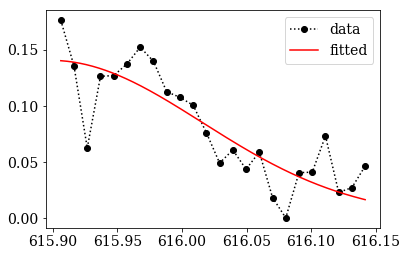

In [ ]:
vv = 1
NN = 10

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

In [ ]:
vv = 1
NN = 11

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

IndexError: index 0 is out of bounds for axis 0 with size 0

Intensity_min  = 0.06935142
Amplitude      = 735437116.8208872
Standard error = 38681801289055.21
Relative error = 5259702.074361853 %
fwhm           = 15.539367775323903


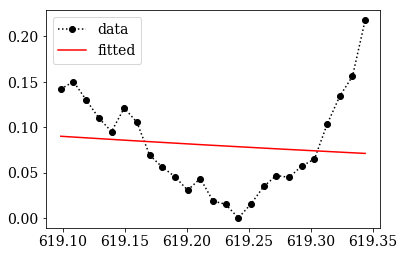

In [ ]:
vv = 1
NN = 12

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.07456014
Amplitude      = 0.009387472470825678
Standard error = None
fwhm           = 0.067


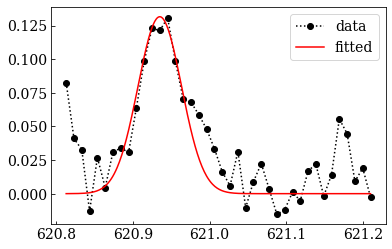

In [ ]:
vv = 1
NN = 13

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.1
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
#yy = yy - abs(yy.min())
yy = yy - 0.09

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
pars['amplitude'].set(value=0.007, min=0.0065, max=0.02)
pars['center'].set(value=620.935, min=620.93, max=620.94)
pars['sigma'].set(value=0.067/2.3548200, min=0.065/2.3548200, max=0.069/2.3548200)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
#print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.07693907
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1959
    # data points      = 22
    # variables        = 9
    chi-square         = 0.00256113
    reduced chi-square = 1.9701e-04
    Akaike info crit   = -181.283681
    Bayesian info crit = -171.464299
[[Variables]]
    p1_sigma:      0.02955602 +/- 0.00423345 (14.32%) (init = 0.02)
    p1_center:     620.935072 +/- 9.4248e-04 (0.00%) (init = 620.94)
    p1_amplitude:  0.01001049 +/- 0.00132935 (13.28%) (init = 0.01)
    p2_sigma:      0.03224500 +/- 0.01192269 (36.98%) (init = 0.02)
    p2_center:     621.004155 +/- 0.01031341 (0.00%) (init = 620.995)
    p2_amplitude:  0.00313386 +/- 0.00105061 (33.52%) (init = 0.01)
    p3_sigma:      0.01546451 +/- 0.00916976 (59.30%) (init = 0.02)
    p3_center:     620.859553 +/- 0.01189519 (0.00%) (init = 620.86)
    p3_amplitude:  8.9303e-0

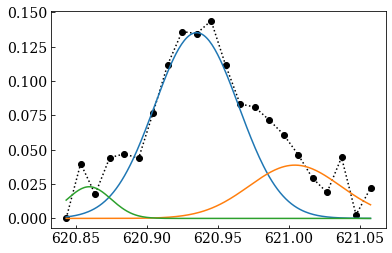

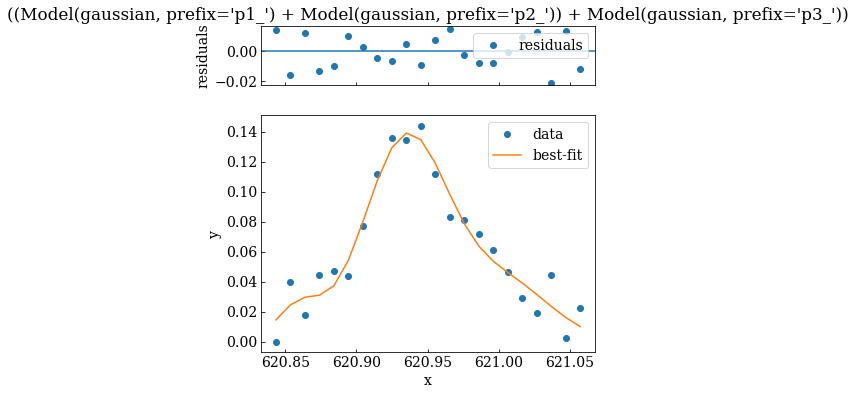

In [ ]:
vv = 1
NN = 13

a = wl[vv,NN] - 0.277
b = wl[vv,NN] - 0.048
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=620.94, min=620.935, max=620.95)
model.set_param_hint('p2_center', value=620.995, min=620.99, max=621.01)
model.set_param_hint('p3_center', value=620.86, min=620.84, max=620.88)
#model.set_param_hint('p4_center', value=610.16, min=610.15, max=610.17)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.03)
model.set_param_hint('p3_amplitude', value=0.01, min=0.0, max=0.2)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.1)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.1)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.07456014
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 2041
    # data points      = 28
    # variables        = 9
    chi-square         = 0.00397903
    reduced chi-square = 2.0942e-04
    Akaike info crit   = -230.049800
    Bayesian info crit = -218.059959
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p1_center:     at boundary
    p1_amplitude:  at initial value
    p2_center:     at initial value
    p2_center:     at boundary
[[Variables]]
    p1_sigma:      0.02755459 +/- 0.00224338 (8.14%) (init = 0.02)
    p1_center:     620.935000 +/- 1.0421e-06 (0.00%) (init = 620.94)
    p1_amplitude:  0.00700000 +/- 1.5627e-06 (0.02%) (init = 0.007)
    p2_sigma:      0.05767113 +/- 0.00856402 (14.85%) (init = 0.02)
    p2_center:     620.979255 +/- 0.00244839 (0.00%) (init = 620.98)
    p2_amplitu

C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


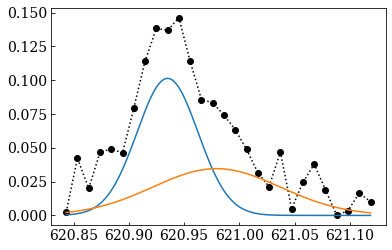

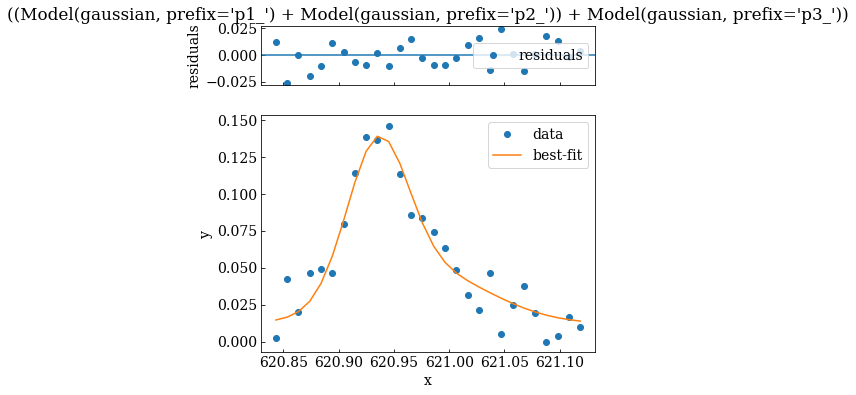

In [ ]:
vv = 1
NN = 13

a = wl[vv,NN] - 0.27
b = wl[vv,NN] + 0.01
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=620.94, min=620.935, max=620.95)
model.set_param_hint('p2_center', value=620.98, min=620.979, max=620.981)
#model.set_param_hint('p3_center', value=614.66, min=614.65, max=614.68)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=0.007)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=0.005)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.07)
model.set_param_hint('p2_fwhm', value=0.05, min=0.05, max=0.051)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.07693907
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 2777
    # data points      = 19
    # variables        = 9
    chi-square         = 0.00131250
    reduced chi-square = 1.3125e-04
    Akaike info crit   = -164.024901
    Bayesian info crit = -155.524950
[[Variables]]
    p1_sigma:      0.02878773 +/- 0.00399745 (13.89%) (init = 0.02)
    p1_center:     620.935290 +/- 0.00212068 (0.00%) (init = 620.94)
    p1_amplitude:  0.01018628 +/- 0.00117884 (11.57%) (init = 0.01)
    p2_sigma:      0.01867716 +/- 0.00484430 (25.94%) (init = 0.02)
    p2_center:     620.997310 +/- 0.00583017 (0.00%) (init = 620.995)
    p2_amplitude:  0.00220751 +/- 8.6291e-04 (39.09%) (init = 0.01)
    p3_sigma:      0.01628002 +/- 0.00992360 (60.96%) (init = 0.02)
    p3_center:     620.859156 +/- 0.01333132 (0.00%) (init = 620.86)
    p3_amplitude:  0.0014760

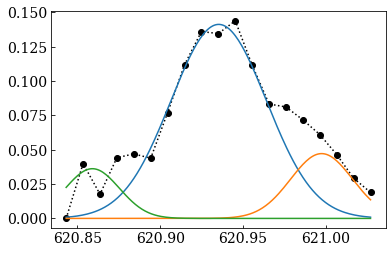

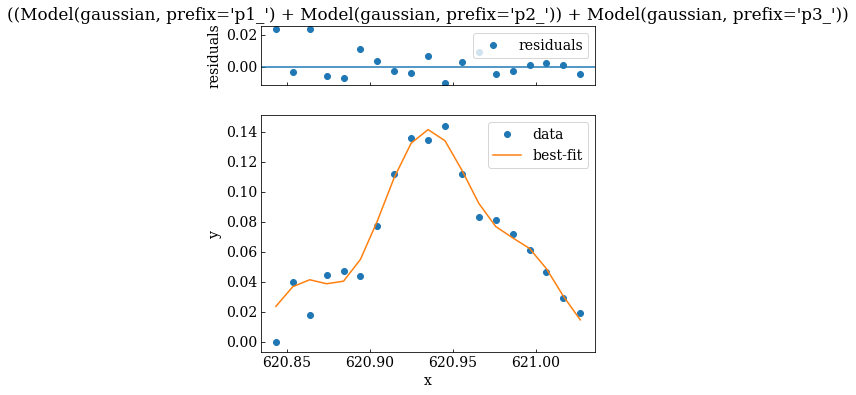

In [ ]:
vv = 1
NN = 13

a = wl[vv,NN] - 0.27
b = wl[vv,NN] - 0.08
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=620.94, min=620.935, max=620.95)
model.set_param_hint('p2_center', value=620.995, min=620.97, max=621.01)
model.set_param_hint('p3_center', value=620.86, min=620.84, max=620.88)
#model.set_param_hint('p4_center', value=610.16, min=610.15, max=610.17)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=5)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.1)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.1)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.09454211
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 3420
    # data points      = 19
    # variables        = 9
    chi-square         = 0.00113639
    reduced chi-square = 1.1364e-04
    Akaike info crit   = -166.762409
    Bayesian info crit = -158.262458
[[Variables]]
    p1_sigma:      0.02307896 +/- 0.00258620 (11.21%) (init = 0.02)
    p1_center:     620.935790 +/- 0.00210913 (0.00%) (init = 620.94)
    p1_amplitude:  0.00656303 +/- 7.7667e-04 (11.83%) (init = 0.01)
    p2_sigma:      0.01241572 +/- 0.00414326 (33.37%) (init = 0.02)
    p2_center:     620.987875 +/- 0.00536643 (0.00%) (init = 620.995)
    p2_amplitude:  0.00101198 +/- 4.7348e-04 (46.79%) (init = 0.01)
    p3_sigma:      0.50000000 +/- 3.2752e-04 (0.07%) (init = 0.02)
    p3_center:     620.879445 +/- 0.91813353 (0.15%) (init = 620.88)
    p3_amplitude:  0.01763048

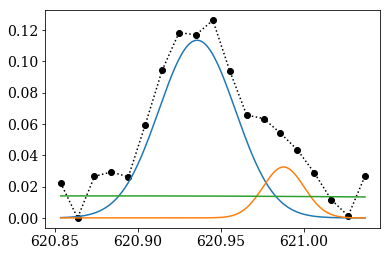

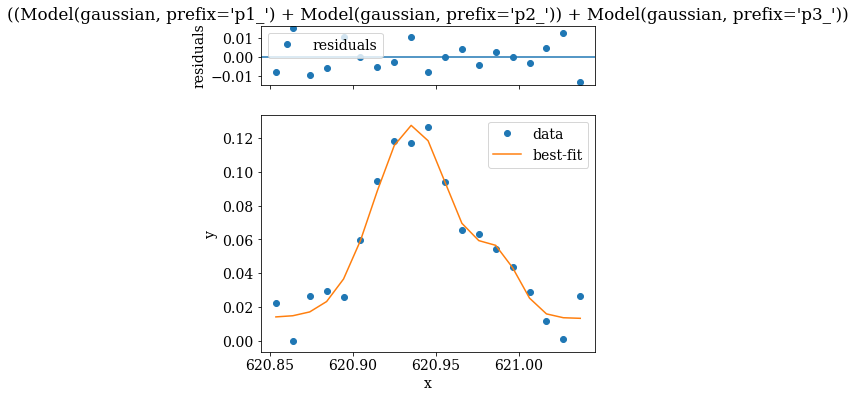

In [ ]:
vv = 1
NN = 13

a = wl[vv,NN] - 0.26
b = wl[vv,NN] - 0.07
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=620.94, min=620.935, max=620.95)
model.set_param_hint('p2_center', value=620.995, min=620.97, max=621.01)
model.set_param_hint('p3_center', value=620.88, min=620.87, max=620.89)
#model.set_param_hint('p4_center', value=610.16, min=610.15, max=610.17)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.05)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.1)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.1)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.1)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.06752983
Amplitude      = 1.3228022117495827e+17
Standard error = None


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

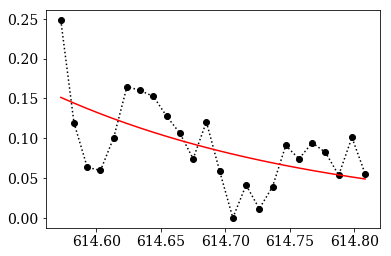

In [ ]:
vv = 2
NN = 0

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.07647869
Amplitude      = 0.02159179995215665
Standard error = 0.0018936067304705397
Relative error = 8.770027207858606 %
fwhm           = 0.06110737167240425
Wl shift       = 0.17247382751122586


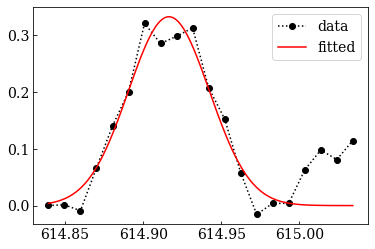

In [ ]:
vv = 2
NN = 1

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
#yy = yy - abs(yy.min())
yy = yy - 0.092

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()
print('Wl shift       =',wl[vv,NN]-v['center'])

0.07647869
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1382
    # data points      = 30
    # variables        = 6
    chi-square         = 0.37116642
    reduced chi-square = 0.01546527
    Akaike info crit   = -119.769064
    Bayesian info crit = -111.361880
[[Variables]]
    p1_sigma:      0.05000000 +/- 6.4374e-07 (0.00%) (init = 0.02)
    p1_center:     614.840000 +/- 2.0800e-06 (0.00%) (init = 614.83)
    p1_amplitude:  0.00837402 +/- 0.00590761 (70.55%) (init = 0.01)
    p2_sigma:      0.02785630 +/- 0.00816194 (29.30%) (init = 0.02)
    p2_center:     614.930000 +/- 2.1128e-08 (0.00%) (init = 614.945)
    p2_amplitude:  0.01908661 +/- 0.00537290 (28.15%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 1.5159e-06 (0.00%) == '2.3548200*p1_sigma'
    p1_height:     0.06681500 +/- 0.04713591 (70.55%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       

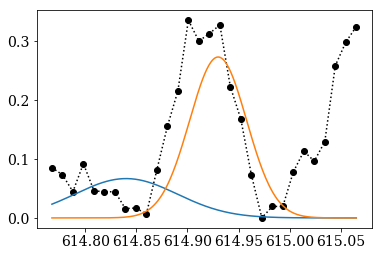

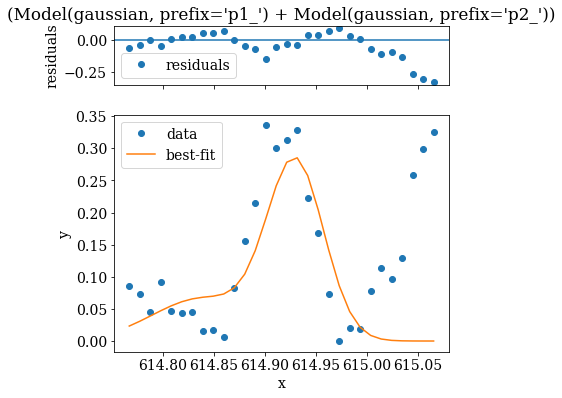

In [ ]:
vv = 2
NN = 1

a = wl[vv,NN] - 0.33
b = wl[vv,NN] - 0.02
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=614.83, min=614.80, max=614.84)
model.set_param_hint('p2_center', value=614.945, min=614.93, max=615.96)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.08529726
Amplitude      = 0.04353868241573754
Standard error = 0.00377837345679278
Relative error = 8.678198896131605 %
fwhm           = 0.11998313549141341


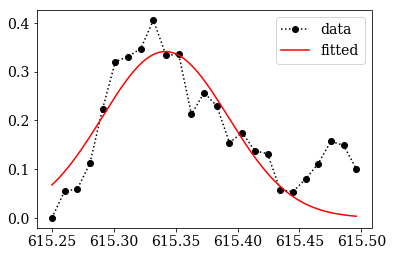

In [ ]:
vv = 2
NN = 2

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.05674913
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 200
    # data points      = 33
    # variables        = 6
    chi-square         = 0.14809142
    reduced chi-square = 0.00548487
    Akaike info crit   = -166.412290
    Bayesian info crit = -157.433244
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p2_center:     at initial value
[[Variables]]
    p1_sigma:      0.07027705 +/- 0.01183748 (16.84%) (init = 0.02)
    p1_center:     615.350018 +/- 0.00741633 (0.00%) (init = 615.35)
    p1_amplitude:  0.05777605 +/- 0.00643181 (11.13%) (init = 0.01)
    p2_sigma:      0.02662906 +/-        nan (nan%) (init = 0.02)
    p2_center:     615.420832 +/-        nan (nan%) (init = 615.42)
    p2_amplitude:  3.8275e-05 +/- 6.5863e-07 (1.72%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 0.02787515 (34.84%) == '2.3548200*p1_sigma'
    

C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


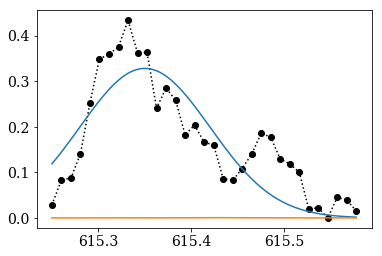

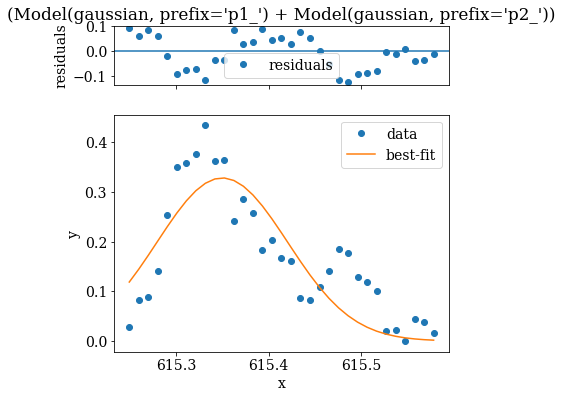

In [ ]:
vv = 2
NN = 2

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.08
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=615.35, min=615.33, max=615.37)
model.set_param_hint('p2_center', value=615.42, min=615.38, max=615.44)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.08032268
Amplitude      = 0.022795899566381114
Standard error = 0.0018866523851372664
Relative error = 8.276279598632991 %
fwhm           = 0.0646034109648642


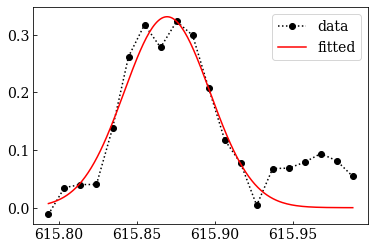

In [ ]:
vv = 2
NN = 3

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
#yy = yy - abs(yy.min())
yy = yy - 0.092

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.003859253
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 811
    # data points      = 28
    # variables        = 6
    chi-square         = 0.03820627
    reduced chi-square = 0.00173665
    Akaike info crit   = -172.714881
    Bayesian info crit = -164.721654
[[Variables]]
    p1_sigma:      0.03858459 +/- 0.00420612 (10.90%) (init = 0.02)
    p1_center:     615.890651 +/- 0.00347910 (0.00%) (init = 615.9)
    p1_amplitude:  0.02794479 +/- 0.00244039 (8.73%) (init = 0.01)
    p2_sigma:      0.03355232 +/- 0.00696656 (20.76%) (init = 0.02)
    p2_center:     616.012577 +/- 0.00623815 (0.00%) (init = 616)
    p2_amplitude:  0.01169911 +/- 0.00232694 (19.89%) (init = 0.01)
    p1_fwhm:       0.09000000 +/- 0.00990465 (11.01%) == '2.3548200*p1_sigma'
    p1_height:     0.28893292 +/- 0.02095727 (7.25%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.079

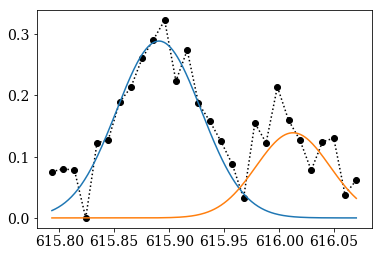

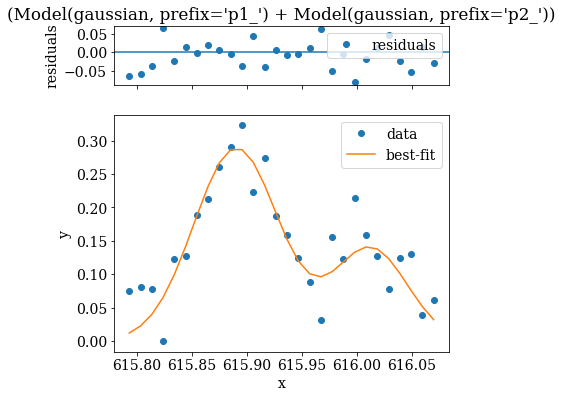

In [ ]:
vv = 2
NN = 3

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.03
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=615.9, min=615.88, max=615.91)
model.set_param_hint('p2_center', value=616.0, min=615.98, max=616.03)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

-0.01089966
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1182
    # data points      = 54
    # variables        = 9
    chi-square         = 0.08499044
    reduced chi-square = 0.00188868
    Akaike info crit   = -330.526827
    Bayesian info crit = -312.625971
[[Variables]]
    p1_sigma:      0.03051611 +/- 0.00426147 (13.96%) (init = 0.02)
    p1_center:     615.890000 +/- 8.0493e-06 (0.00%) (init = 615.9)
    p1_amplitude:  0.02148649 +/- 0.00537240 (25.00%) (init = 0.01)
    p2_sigma:      0.05228163 +/- 0.02634969 (50.40%) (init = 0.02)
    p2_center:     616.000129 +/- 0.01771203 (0.00%) (init = 616)
    p2_amplitude:  0.01704473 +/- 0.00573212 (33.63%) (init = 0.01)
    p3_sigma:      0.04952820 +/- 0.00545996 (11.02%) (init = 0.02)
    p3_center:     615.720320 +/- 0.00459608 (0.00%) (init = 615.72)
    p3_amplitude:  0.02887156 +/

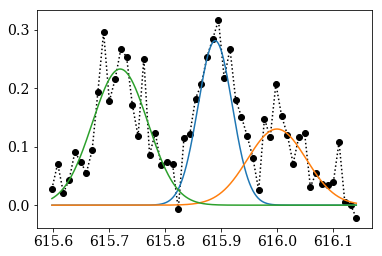

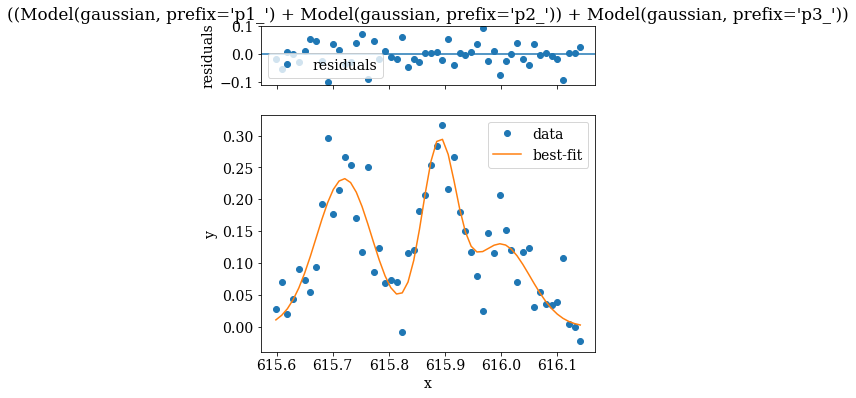

In [ ]:
vv = 2
NN = 3

a = wl[vv,NN] - 0.45
b = wl[vv,NN] + 0.1
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=615.90, min=615.89, max=615.92)
model.set_param_hint('p2_center', value=616.0, min=615.98, max=616.02)
model.set_param_hint('p3_center', value=615.72, min=615.7, max=615.74)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.09)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.07132798
Amplitude      = 0.032604613853967866
Standard error = 0.003459003712481554
Relative error = 10.608939360466021 %
fwhm           = 0.10593951800138988


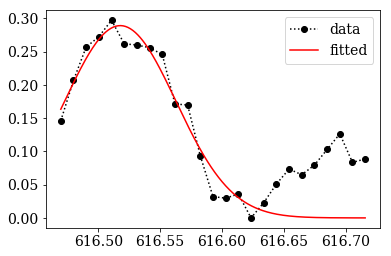

In [ ]:
vv = 2
NN = 4

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.09545112
Amplitude      = 0.061689445743494914
Standard error = 0.01921425985882603
Relative error = 31.146753917548615 %
fwhm           = 0.30932489353599907


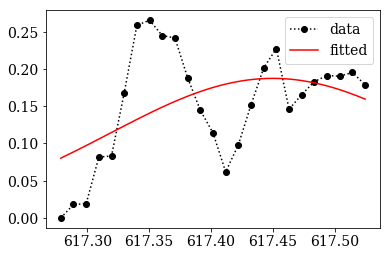

In [ ]:
vv = 2
NN = 5

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.09545112
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 816
    # data points      = 30
    # variables        = 6
    chi-square         = 0.03938991
    reduced chi-square = 0.00164125
    Akaike info crit   = -187.063290
    Bayesian info crit = -178.656106
[[Variables]]
    p1_sigma:      0.02777869 +/- 0.00315450 (11.36%) (init = 0.02)
    p1_center:     617.355877 +/- 0.00288285 (0.00%) (init = 617.36)
    p1_amplitude:  0.01839730 +/- 0.00172783 (9.39%) (init = 0.01)
    p2_sigma:      0.05000000 +/- 2.5064e-07 (0.00%) (init = 0.02)
    p2_center:     617.496116 +/- 0.00573507 (0.00%) (init = 617.506)
    p2_amplitude:  0.02583587 +/- 0.00175476 (6.79%) (init = 0.01)
    p1_fwhm:       0.06541382 +/- 0.00742829 (11.36%) == '2.3548200*p1_sigma'
    p1_height:     0.26421193 +/- 0.02325966 (8.80%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.0

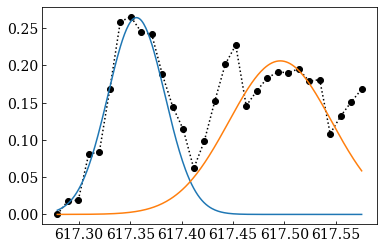

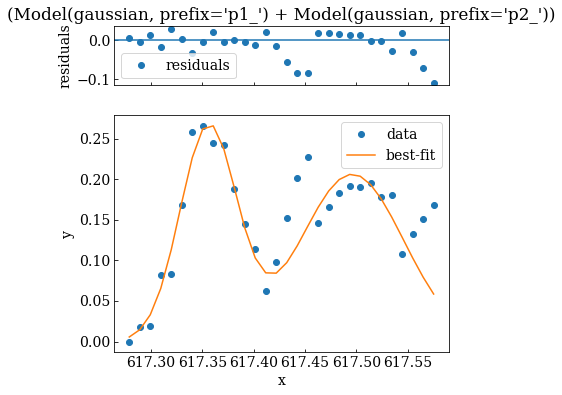

In [ ]:
vv = 2
NN = 5

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=617.36, min=617.33, max=617.37)
model.set_param_hint('p2_center', value=617.506, min=617.48, max=617.52)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.09545112
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 888
    # data points      = 39
    # variables        = 6
    chi-square         = 0.23344982
    reduced chi-square = 0.00707424
    Akaike info crit   = -187.615642
    Bayesian info crit = -177.634272
[[Variables]]
    p1_sigma:      0.03391192 +/- 0.01046345 (30.85%) (init = 0.02)
    p1_center:     617.359828 +/- 0.00765278 (0.00%) (init = 617.355)
    p1_amplitude:  0.02112751 +/- 0.00440966 (20.87%) (init = 0.01)
    p2_sigma:      0.05000000 +/- 2.2708e-07 (0.00%) (init = 0.02)
    p2_center:     617.520000 +/- 1.7266e-07 (0.00%) (init = 617.506)
    p2_amplitude:  0.02821424 +/- 0.00365091 (12.94%) (init = 0.01)
    p1_fwhm:       0.07985646 +/- 0.02463953 (30.85%) == '2.3548200*p1_sigma'
    p1_height:     0.24854561 +/- 0.05158061 (20.75%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:      

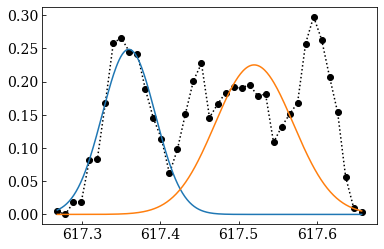

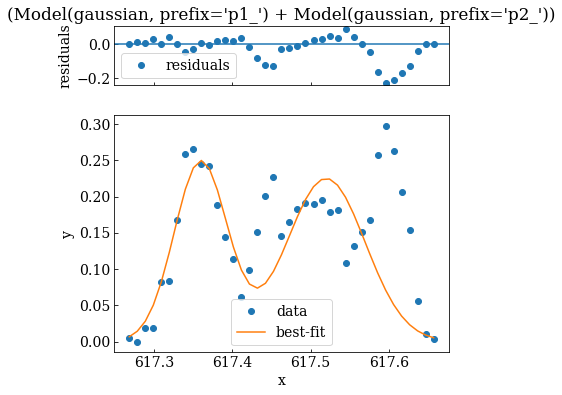

In [ ]:
vv = 2
NN = 5

a = wl[vv,NN] - 0.26
b = wl[vv,NN] + 0.13
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=617.355, min=617.33, max=617.37)
model.set_param_hint('p2_center', value=617.506, min=617.48, max=617.52)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.07423015
Amplitude      = 5.244978826054844e+26
Standard error = None


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

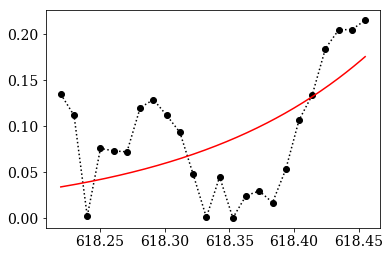

In [ ]:
vv = 2
NN = 6

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.06935142
Amplitude      = 0.018761482421499352
Standard error = 0.0017400966486621383
Relative error = 9.274835589047637 %
fwhm           = 0.08773356573572301


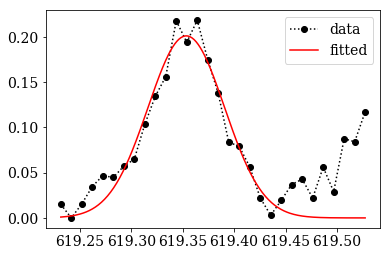

In [ ]:
vv = 2
NN = 7

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.06935142
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 793
    # data points      = 25
    # variables        = 6
    chi-square         = 0.00585227
    reduced chi-square = 3.0801e-04
    Akaike info crit   = -196.995023
    Bayesian info crit = -189.681768
[[Variables]]
    p1_sigma:      0.01443540 +/- 0.00841472 (58.29%) (init = 0.02)
    p1_center:     619.269543 +/- 0.00736271 (0.00%) (init = 619.27)
    p1_amplitude:  0.00122892 +/- 6.5091e-04 (52.97%) (init = 0.01)
    p2_sigma:      0.03440755 +/- 0.00226102 (6.57%) (init = 0.02)
    p2_center:     619.354642 +/- 0.00184668 (0.00%) (init = 619.35)
    p2_amplitude:  0.01626770 +/- 9.0872e-04 (5.59%) (init = 0.01)
    p1_fwhm:       0.05000000 +/- 0.01981515 (39.63%) == '2.3548200*p1_sigma'
    p1_height:     0.03396281 +/- 0.01454298 (42.82%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.

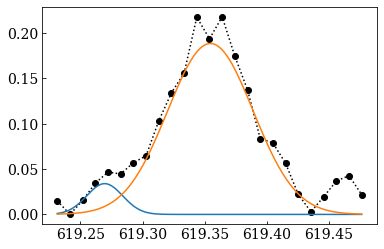

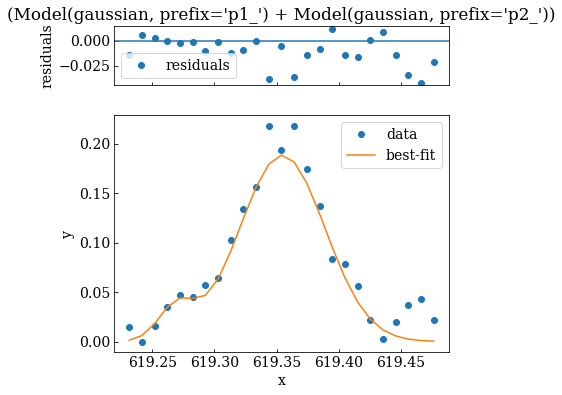

In [ ]:
vv = 2
NN = 7

a = wl[vv,NN] - 0.3
b = wl[vv,NN] - 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=619.27, min=619.25, max=619.29)
model.set_param_hint('p2_center', value=619.35, min=619.33, max=619.37)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.1083059
Amplitude      = 0.10367515100889127
Standard error = 0.0015061936959716797
Relative error = 1.452801063045963 %
fwhm           = 0.11306538554063664


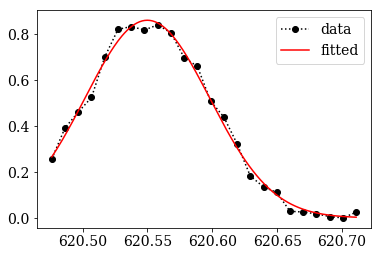

In [ ]:
vv = 2
NN = 8

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

In [ ]:
vv = 2
NN = 9

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
vv = 2
NN = 10

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

IndexError: index 0 is out of bounds for axis 0 with size 0

Intensity_min  = 0.07495911
Amplitude      = 2.45725708119056e+25
Standard error = None


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

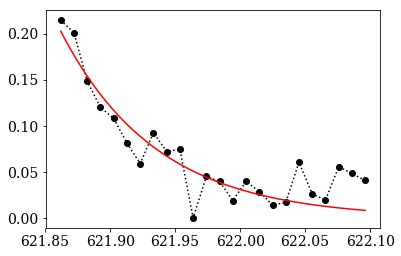

In [ ]:
vv = 3
NN = 0

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.08339983
Amplitude      = 0.013414908091084003
Standard error = 0.0012655324257200107
Relative error = 9.433776341420677 %
fwhm           = 0.06078313933917469


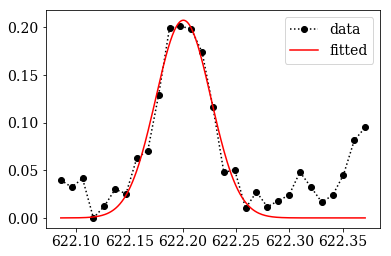

In [ ]:
vv = 3
NN = 1

a = wl[vv,NN] - 0.3
b = wl[vv,NN] - 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.07105691
Amplitude      = 0.07305517063769314
Standard error = 0.16896197592516465
Relative error = 231.27996889242496 %
fwhm           = 0.5389369131405201


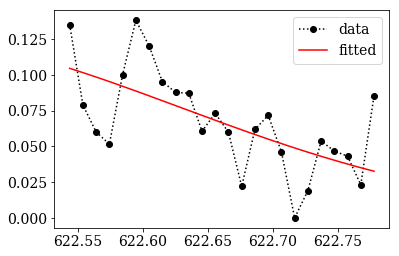

In [ ]:
vv = 3
NN = 2

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.08791389
Amplitude      = 0.015081924311314639
Standard error = 0.002158911672594665
Relative error = 14.314563765414364 %
fwhm           = 0.07462252993056363


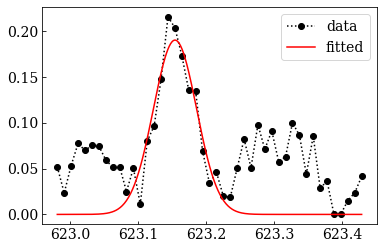

In [ ]:
vv = 3
NN = 3

a = wl[vv,NN] - 0.35
b = wl[vv,NN] + 0.1
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.09898274
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 546
    # data points      = 35
    # variables        = 6
    chi-square         = 0.08783363
    reduced chi-square = 0.00302875
    Akaike info crit   = -197.568060
    Bayesian info crit = -188.235972
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p2_center:     at initial value
[[Variables]]
    p1_sigma:      0.05000000 +/- 5.3100e-10 (0.00%) (init = 0.02)
    p1_center:     623.060000 +/-        nan (nan%) (init = 623.06)
    p1_amplitude:  0.00689719 +/- 0.00234221 (33.96%) (init = 0.01)
    p2_sigma:      0.05000000 +/- 2.0974e-07 (0.00%) (init = 0.02)
    p2_center:     623.190000 +/- 0.00526612 (0.00%) (init = 623.19)
    p2_amplitude:  0.01223337 +/- 0.00160058 (13.08%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 1.2504e-09 (0.00%) == '2.3548200*p1_sigma'
    

C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


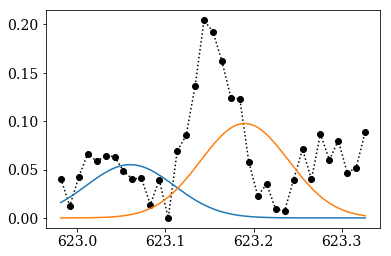

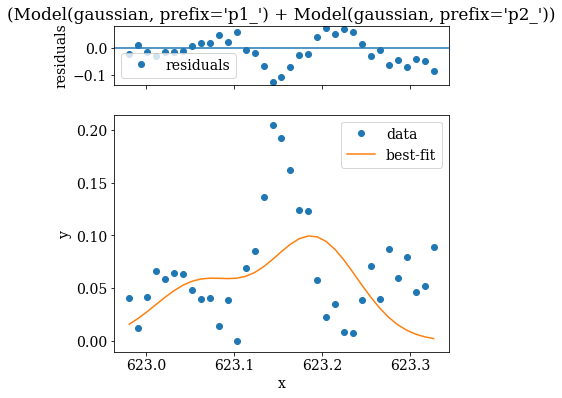

In [ ]:
vv = 3
NN = 3

a = wl[vv,NN] - 0.35
b = wl[vv,NN] - 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=623.06, min=623.04, max=623.08)
model.set_param_hint('p2_center', value=623.19, min=623.17, max=623.21)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

0.09898274
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1767
    # data points      = 35
    # variables        = 9
    chi-square         = 0.08236669
    reduced chi-square = 0.00316795
    Akaike info crit   = -193.817277
    Bayesian info crit = -179.819144
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p2_center:     at initial value
    p3_center:     at initial value
[[Variables]]
    p1_sigma:      0.04999895 +/- 3.1935e-04 (0.64%) (init = 0.02)
    p1_center:     623.060000 +/-        nan (nan%) (init = 623.06)
    p1_amplitude:  0.00237320 +/- 0.00282978 (119.24%) (init = 0.01)
    p2_sigma:      0.04999990 +/- 5.8539e-05 (0.12%) (init = 0.02)
    p2_center:     623.190000 +/- 0.00563622 (0.00%) (init = 623.19)
    p2_amplitude:  0.01107119 +/-        nan (nan%) (init = 0.01)
    p3_sigm

C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


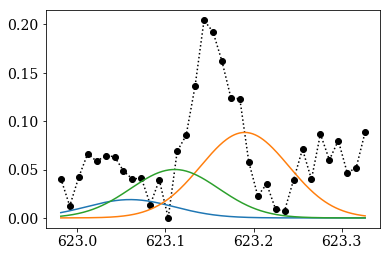

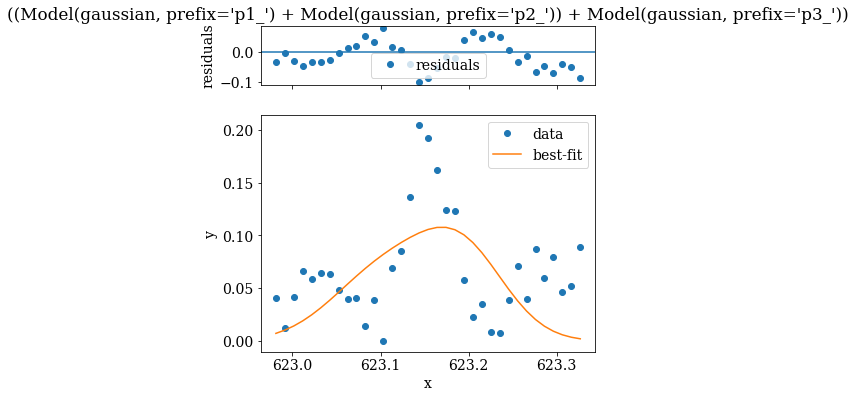

In [ ]:
vv = 3
NN = 3

a = wl[vv,NN] - 0.35
b = wl[vv,NN] - 0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=623.06, min=623.04, max=623.08)
model.set_param_hint('p2_center', value=623.19, min=623.17, max=623.21)
model.set_param_hint('p3_center', value=623.11, min=623.10, max=623.12)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.09733704
Amplitude      = 0.023435004603761675
Standard error = 0.009245825821918113
Relative error = 39.45305741665618 %
fwhm           = 0.3128034934833393


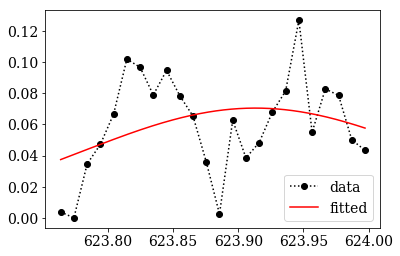

In [ ]:
vv = 3
NN = 4

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.07874596
[[Model]]
    ((Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_')) + Model(gaussian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1717
    # data points      = 44
    # variables        = 9
    chi-square         = 0.03114842
    reduced chi-square = 8.8995e-04
    Akaike info crit   = -301.139976
    Bayesian info crit = -285.082270
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p2_center:     at initial value
    p3_center:     at initial value
[[Variables]]
    p1_sigma:      0.04999774 +/- 1.4776e-04 (0.30%) (init = 0.02)
    p1_center:     623.871107 +/-        nan (nan%) (init = 623.87)
    p1_amplitude:  0.00809670 +/- 0.00281267 (34.74%) (init = 0.01)
    p2_sigma:      0.04964324 +/- 0.00460078 (9.27%) (init = 0.02)
    p2_center:     623.990505 +/- 0.01047082 (0.00%) (init = 623.99)
    p2_amplitude:  0.00836387 +/- 0.00107490 (12.85%) (init = 0.01)
    p3_sig

C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


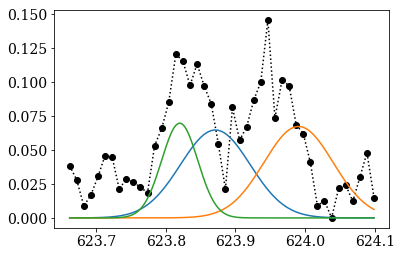

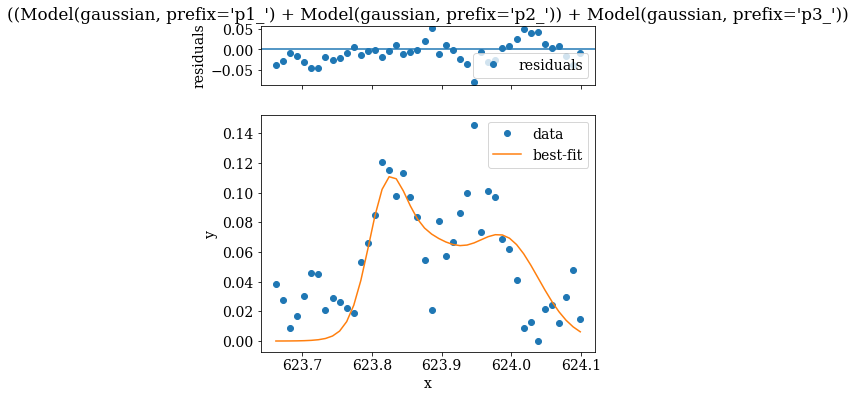

In [ ]:
vv = 3
NN = 4

a = wl[vv,NN] - 0.35
b = wl[vv,NN] + 0.1
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 + peak3 #+ peak4 

model.set_param_hint('p1_center', value=623.87, min=623.85, max=623.89)
model.set_param_hint('p2_center', value=623.99, min=623.97, max=624.01)
model.set_param_hint('p3_center', value=623.82, min=623.80, max=623.84)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.08)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
#plot(xxx, yy1, xxx, yy2, label='fitting')
plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.07819714
Amplitude      = 0.04353250426068513
Standard error = 0.004021335890121638
Relative error = 9.237547801157325 %
fwhm           = 0.13473621832944152


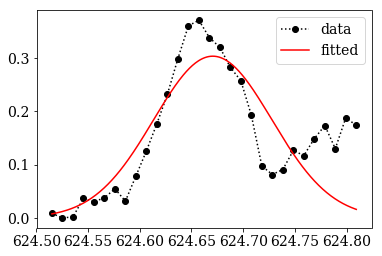

In [ ]:
vv = 3
NN = 5

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.08005291
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 450
    # data points      = 33
    # variables        = 6
    chi-square         = 0.01164212
    reduced chi-square = 4.3119e-04
    Akaike info crit   = -250.337906
    Bayesian info crit = -241.358860
[[Variables]]
    p1_sigma:      0.03641722 +/- 0.00145621 (4.00%) (init = 0.02)
    p1_center:     624.660128 +/- 0.00134460 (0.00%) (init = 624.655)
    p1_amplitude:  0.03332988 +/- 0.00112624 (3.38%) (init = 0.01)
    p2_sigma:      0.03662560 +/- 0.00333438 (9.10%) (init = 0.02)
    p2_center:     624.789952 +/- 0.00295739 (0.00%) (init = 624.79)
    p2_amplitude:  0.01417287 +/- 0.00114677 (8.09%) (init = 0.01)
    p1_fwhm:       0.08575600 +/- 0.00342911 (4.00%) == '2.3548200*p1_sigma'
    p1_height:     0.36512116 +/- 0.01025281 (2.81%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.086

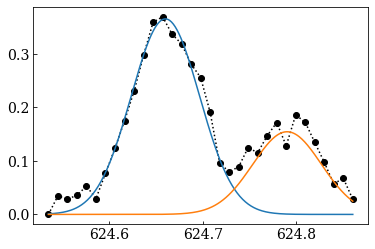

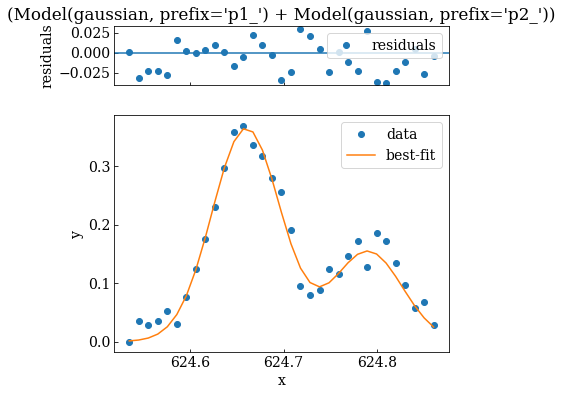

In [ ]:
vv = 3
NN = 5

a = wl[vv,NN] - 0.28
b = wl[vv,NN] + 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=624.655, min=624.63, max=624.67)
model.set_param_hint('p2_center', value=624.79, min=624.78, max=624.8)
#model.set_param_hint('p3_center', value=621.65, min=621.64, max=621.66)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.5)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=0.1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.09)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.9)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, xxx, yy4, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.07405936
Amplitude      = 0.034203567144388484
Standard error = 0.004883322155332315
Relative error = 14.277230602052818 %
fwhm           = 0.2169161562120925


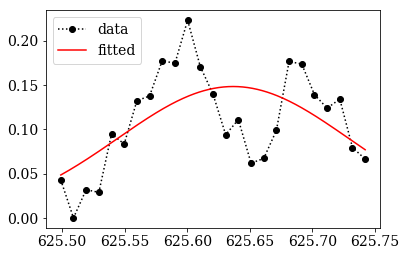

In [ ]:
vv = 3
NN = 6

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.06065078
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 831
    # data points      = 39
    # variables        = 6
    chi-square         = 0.08241475
    reduced chi-square = 0.00249742
    Akaike info crit   = -228.222548
    Bayesian info crit = -218.241178
[[Variables]]
    p1_sigma:      0.04999999 +/- 1.6222e-05 (0.03%) (init = 0.02)
    p1_center:     625.610114 +/- 9.3667e-04 (0.00%) (init = 625.625)
    p1_amplitude:  0.02264227 +/- 0.00227513 (10.05%) (init = 0.01)
    p2_sigma:      0.03571115 +/- 0.01017668 (28.50%) (init = 0.02)
    p2_center:     625.722243 +/- 0.01153203 (0.00%) (init = 625.72)
    p2_amplitude:  0.00975762 +/- 0.00242541 (24.86%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 3.8201e-05 (0.05%) == '2.3548200*p1_sigma'
    p1_height:     0.18065925 +/- 0.01815291 (10.05%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0

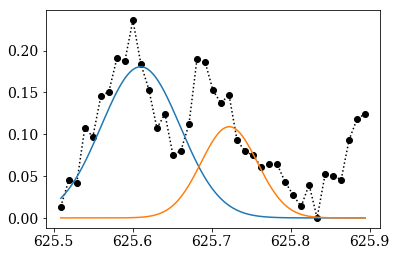

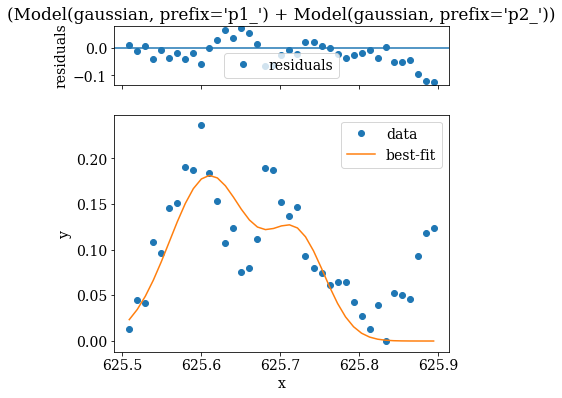

In [ ]:
vv = 3
NN = 6

a = wl[vv,NN] - 0.24
b = wl[vv,NN] + 0.15
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=625.625, min=625.61, max=625.64)
model.set_param_hint('p2_center', value=625.72, min=625.7, max=625.74)
#model.set_param_hint('p3_center', value=623.82, min=623.80, max=623.84)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.08)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.06037505
Amplitude      = 0.014510686378153769
Standard error = 0.0012217699498796887
Relative error = 8.419794336669673 %
fwhm           = 0.09776634712574148


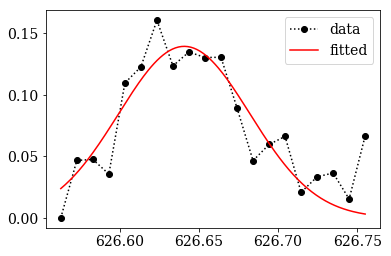

In [ ]:
vv = 3
NN = 7

a = wl[vv,NN] - 0.25
b = wl[vv,NN] - 0.05
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.06037505


C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\Users\Ishihara\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 547
    # data points      = 30
    # variables        = 6
    chi-square         = 0.04519057
    reduced chi-square = 0.00188294
    Akaike info crit   = -182.941929
    Bayesian info crit = -174.534744
##  Warning: uncertainties could not be estimated:
    p1_center:     at initial value
    p2_center:     at initial value
[[Variables]]
    p1_sigma:      0.04999998 +/- 1.7966e-05 (0.04%) (init = 0.02)
    p1_center:     626.539724 +/-        nan (nan%) (init = 626.54)
    p1_amplitude:  0.00796588 +/- 0.00224963 (28.24%) (init = 0.01)
    p2_sigma:      0.04999999 +/- 1.1244e-05 (0.02%) (init = 0.02)
    p2_center:     626.680000 +/- 0.00727543 (0.00%) (init = 626.68)
    p2_amplitude:  0.01153582 +/- 0.00148820 (12.90%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 4.2306e-05 (0.05%) == '2.3548200*p1_sigma'
    p1_height: 

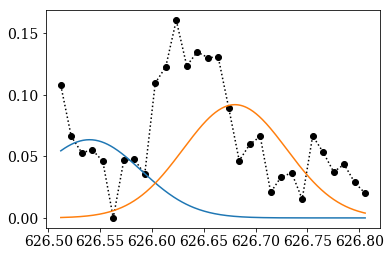

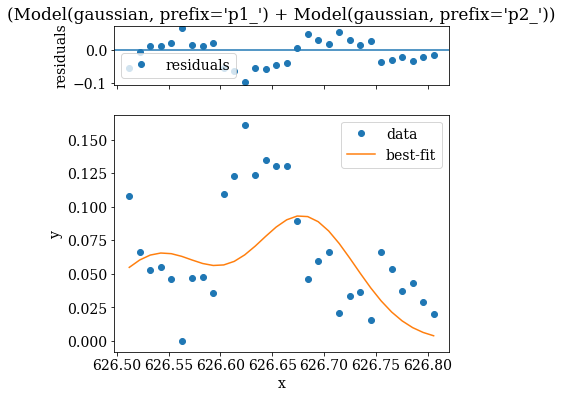

In [ ]:
vv = 3
NN = 7

a = wl[vv,NN] - 0.3
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=626.54, min=626.52, max=626.56)
model.set_param_hint('p2_center', value=626.68, min=626.66, max=626.70)
#model.set_param_hint('p3_center', value=623.82, min=623.80, max=623.84)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.08)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.03173231
Amplitude      = 0.017117859341307766
Standard error = 0.0029313947674089232
Relative error = 17.124774242857935 %
fwhm           = 0.1841284438011946


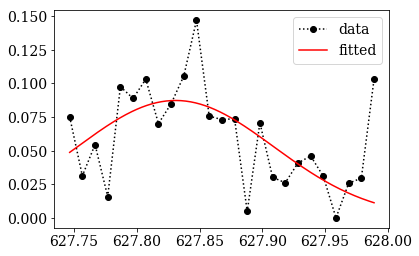

In [ ]:
vv = 3
NN = 8

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.05072167
Amplitude      = 0.013308395442959142
Standard error = 0.0016791076815771957
Relative error = 12.616905537365394 %
fwhm           = 0.11680362625615241


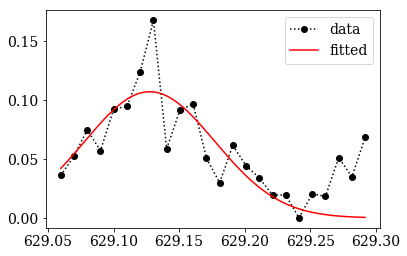

In [ ]:
vv = 3
NN = 9

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

0.2378845
[[Model]]
    (Model(gaussian, prefix='p1_') + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1018
    # data points      = 20
    # variables        = 6
    chi-square         = 0.03085324
    reduced chi-square = 0.00220380
    Akaike info crit   = -117.484914
    Bayesian info crit = -111.510520
[[Variables]]
    p1_sigma:      0.05000000 +/- 2.6799e-07 (0.00%) (init = 0.02)
    p1_center:     629.060000 +/- 0.01473306 (0.00%) (init = 629.06)
    p1_amplitude:  0.01989058 +/- 0.00306491 (15.41%) (init = 0.01)
    p2_sigma:      0.03687271 +/- 0.01138241 (30.87%) (init = 0.02)
    p2_center:     629.170000 +/- 2.7558e-07 (0.00%) (init = 629.15)
    p2_amplitude:  0.01056403 +/- 0.00374444 (35.45%) (init = 0.01)
    p1_fwhm:       0.08000000 +/- 6.3107e-07 (0.00%) == '2.3548200*p1_sigma'
    p1_height:     0.15870384 +/- 0.02445443 (15.41%) == '0.3989423*p1_amplitude/max(1.e-15, p1_sigma)'
    p2_fwhm:       0.

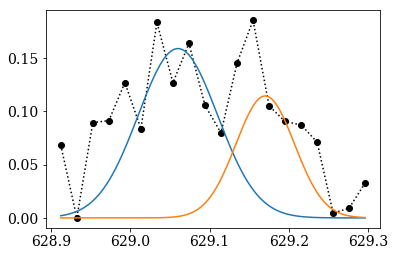

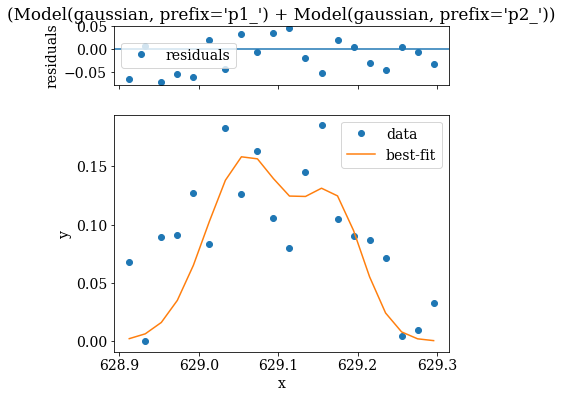

In [ ]:
vv = 3
NN = 9

a = wl[vv,NN] - 0.4
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print(yy.min())
yy = yy - abs(yy.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
peak3 = GaussianModel(prefix='p3_')
peak4 = GaussianModel(prefix='p4_')
model = peak1 + peak2 #+ peak3 #+ peak4 

model.set_param_hint('p1_center', value=629.06, min=629.04, max=629.08)
model.set_param_hint('p2_center', value=629.15, min=629.13, max=629.17)
#model.set_param_hint('p3_center', value=623.82, min=623.80, max=623.84)
#model.set_param_hint('p4_center', value=621.72, min=621.70, max=621.74)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.05)
#model.set_param_hint('p4_sigma', value=0.02, min=0.01, max=0.05)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p3_amplitude', value=0.001, min=0.0, max=1)
#model.set_param_hint('p4_amplitude', value=0.01, min=0.0, max=0.1)
model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.08)
model.set_param_hint('p2_fwhm', value=0.06, min=0.05, max=0.08)
#model.set_param_hint('p3_fwhm', value=0.07, min=0.05, max=0.08)
#model.set_param_hint('p4_fwhm', value=0.07, min=0.05, max=0.15)

fit_res = model.fit(yy, x=xx, method='nelder')
v = fit_res.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yy1 = gaussian(xxx,v['p1_amplitude'],v['p1_center'],v['p1_sigma'])
yy2 = gaussian(xxx,v['p2_amplitude'],v['p2_center'],v['p2_sigma'])
#yy3 = gaussian(xxx,v['p3_amplitude'],v['p3_center'],v['p3_sigma'])
#yy4 = gaussian(xxx,v['p4_amplitude'],v['p4_center'],v['p4_sigma'])
plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yy1, xxx, yy2, label='fitting')
#plot(xxx, yy1, xxx, yy2, xxx, yy3, label='fitting')
fig, gridspec = fit_res.plot()
legend()
print(fit_res.fit_report())

Intensity_min  = 0.1631258
Amplitude      = 70768591.00066352
Standard error = 3058238022548.1055
Relative error = 4321462.359649681 %
fwhm           = 12.079522970271832


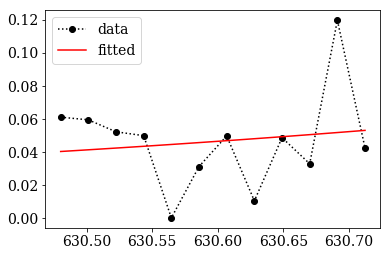

In [ ]:
vv = 3
NN = 10

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.187183
Amplitude      = 0.14144515372673233
Standard error = 0.45267931737418676
Relative error = 320.03876092407467 %
fwhm           = 0.5575981265804377


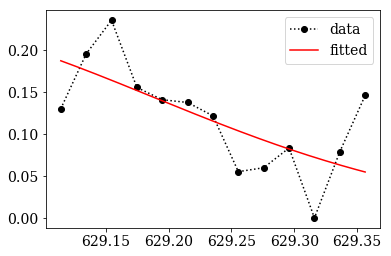

In [ ]:
vv = 4
NN = 0

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.2352497
Amplitude      = 0.03196985688301408
Standard error = 0.006105538696521527
Relative error = 19.09779802538141 %
fwhm           = 0.15047543748934308


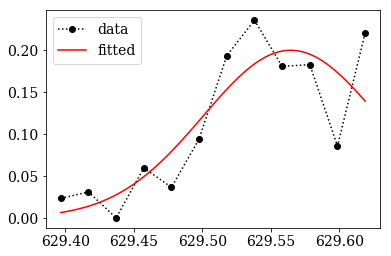

In [ ]:
vv = 4
NN = 1

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.2347625
Amplitude      = 0.013177288459419385
Standard error = 0.005583874880166312
Relative error = 42.374991618058175 %
fwhm           = 0.21182684455933137


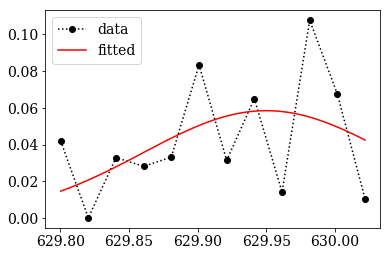

In [ ]:
vv = 4
NN = 2

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1631258
Amplitude      = 0.01573616849831634
Standard error = 0.0017570108485318833
Relative error = 11.165429810438741 %
fwhm           = 0.06324182003717412


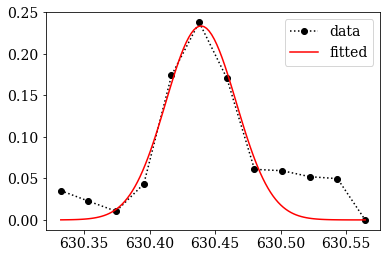

In [ ]:
vv = 4
NN = 3

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1624774
Amplitude      = 0.018484620797909832
Standard error = 0.0029883818211050447
Relative error = 16.166854888594518 %
fwhm           = 0.17831968685867927


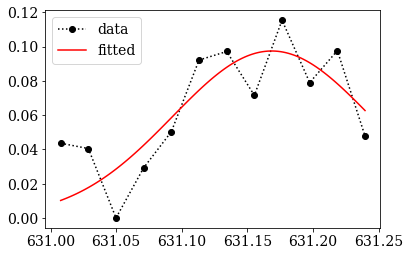

In [ ]:
vv = 4
NN = 4

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.189637
Amplitude      = 0.024931646078326743
Standard error = 0.002143532900447636
Relative error = 8.597638895215283 %
fwhm           = 0.1077402032285974


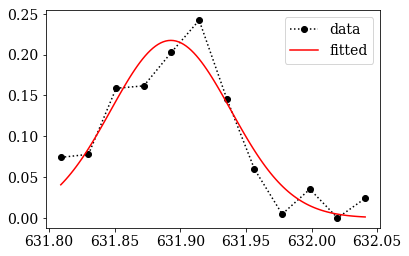

In [ ]:
vv = 4
NN = 5

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1880804
Amplitude      = 0.011347817275028111
Standard error = 0.0026770360241394967
Relative error = 23.590757228974372 %
fwhm           = 0.18926699023816404


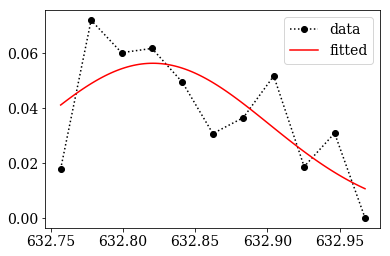

In [ ]:
vv = 4
NN = 6

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

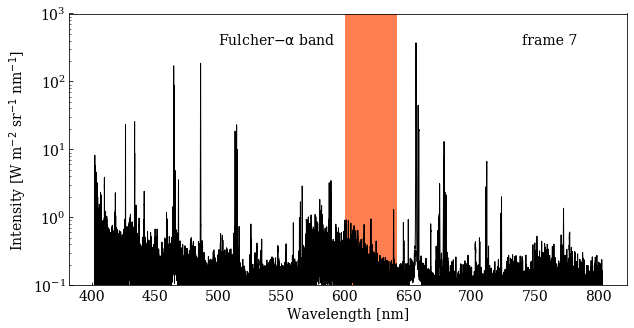

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
#plt.rcParams['axes.linewidth'] = 0.5 # axis line width
plt.rcParams['axes.grid'] = False # make grid
gcf().set_size_inches([10,5])

text(740, 350, 'frame 7')
text(500, 350, r'Fulcher$-\mathrm{\alpha}$ band')
#text(656.28, 300, 'frame 6-10' ,fontsize=14)
#text(486.13, 300, 'frame 6-10' ,fontsize=14)
#text(434.05, 300, 'frame 6-10' ,fontsize=14)
#text(410.17, 300, r'$\mathrm{H_{\alpha}}$' ,fontsize=14)

yscale('log')
ylim(0.1, 1000)
plot(x, f(x), '-', color="black", linewidth=1)
axvspan(600, 640, color = "coral")


xlabel('Wavelength [nm]')
ylabel('Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

pylab.savefig('./figure/CMOS/allspec_150482.pdf', bbox_inches="tight", dpi=300)

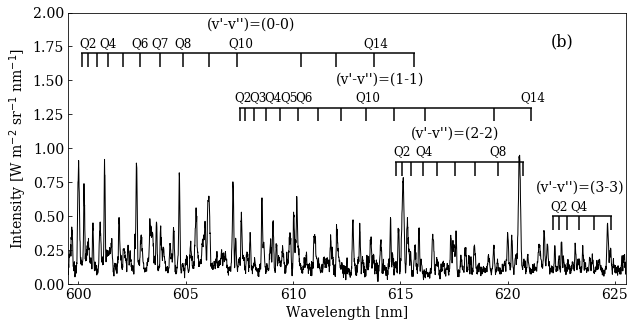

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
gcf().set_size_inches([10,5])

text(wl[0,1]-0.4, 1.75, 'Q2', fontsize=12)
text(wl[0,3]-0.4, 1.75, 'Q4', fontsize=12)
text(wl[0,5]-0.4, 1.75, 'Q6', fontsize=12)
text(wl[0,6]-0.4, 1.75, 'Q7', fontsize=12)
text(wl[0,7]-0.4, 1.75, 'Q8', fontsize=12)
text(wl[0,9]-0.4, 1.75, 'Q10', fontsize=12)
text(wl[0,13]-0.5, 1.75, 'Q14', fontsize=12)

text(wl[1,1]-0.5, 1.35, 'Q2', fontsize=12)
text(wl[1,2]-0.2, 1.35, 'Q3', fontsize=12)
text(wl[1,3]-0.08, 1.35, 'Q4', fontsize=12)
text(wl[1,4]-0, 1.35, 'Q5', fontsize=12)
text(wl[1,5]-0.1, 1.35, 'Q6', fontsize=12)
text(wl[1,9]-1.8, 1.35, 'Q10', fontsize=12)
text(wl[1,13]-0.5, 1.35, 'Q14', fontsize=12)

text(wl[2,1]-0.4, 0.95, 'Q2', fontsize=12)
text(wl[2,2]+0.2, 0.95, 'Q4', fontsize=12)
text(wl[2,7]-0.4, 0.95, 'Q8', fontsize=12)

text(wl[3,1]-0.4, 0.55, 'Q2', fontsize=12)
text(wl[3,3]-0.4, 0.55, 'Q4', fontsize=12)
#text(wl[2,9]-1.8, 1.35, 'Q10', fontsize=12)
#text(wl[2,13]-0.5, 1.35, 'Q14', fontsize=12)


text(606, 1.88, "(v'-v'')=(0-0)", fontsize=14)
text(612, 1.48, "(v'-v'')=(1-1)", fontsize=14)
text(615.5, 1.08, "(v'-v'')=(2-2)", fontsize=14)
text(621.3, 0.68, "(v'-v'')=(3-3)", fontsize=14)

text(622, 1.75, '(b)' ,fontsize=16)

plot(x, f(x), '-', color="black", linewidth=1)
xlim([599.5,625.5])
ylim([0,2])
xlabel('Wavelength [nm]')
ylabel('Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')


position = {0:1.7, 1:1.3, 2:0.9, 3:0.5}
hlines(position[0], wl[0,0]-0.05, wl[0,-1]+0.04, colors='black')
for NN in range(wl.shape[1]):
    vlines(wl[0,NN], position[0], position[0]-0.1, colors='black' ,linestyles='-')
    #vlines(wl[0,NN], position[0], 0, colors='black' ,linestyles=':')

hlines(position[1], wl[1,0]-0.05, wl[1,-2]+0.04, colors='black')
for NN in range(wl.shape[1]):
    vlines(wl[1,NN], position[1], position[1]-0.1, colors='black' ,linestyles='-')
    #vlines(wl[1,NN], position[1], 0, colors='black' ,linestyles=':')

hlines(position[2], wl[2,0]-0.05, wl[2,-7]+0.04, colors='black')  
for NN in range(wl.shape[1]):
    vlines(wl[2,NN], position[2], position[2]-0.1, colors='black' ,linestyles='-')
    
hlines(position[3], wl[3,0]-0.05, wl[3,-10]+0.04, colors='black')  
for NN in range(wl.shape[1]):
    vlines(wl[3,NN], position[3], position[3]-0.1, colors='black' ,linestyles='-')
    #vlines(wl[2,NN], position[2], 0, colors='black' ,linestyles=':')

pylab.savefig(r'C:\Users\Ishihara\Dropbox\paper\paper\fulcherspec_150482.png', bbox_inches="tight", dpi=300)

In [ ]:
inte

array([[0.       , 0.       , 0.       , 0.       ],
       [0.0442912, 0.0286894, 0.0215917, 0.0134149],
       [0.       , 0.0193036, 0.       , 0.       ],
       [0.0530291, 0.0374624, 0.0227958, 0.0150819],
       [0.       , 0.0148636, 0.       , 0.       ],
       [0.0603561, 0.0295525, 0.       , 0.       ],
       [0.0281625, 0.       , 0.       , 0.       ],
       [0.0520435, 0.       , 0.0162677, 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.0461528, 0.0238575, 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.0189271, 0.0075107, 0.       , 0.       ]])

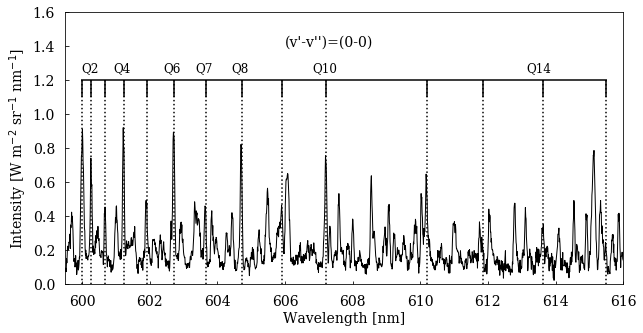

In [ ]:
# font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
#rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(pad = 10)
gcf().set_size_inches([10,5])

wlc = wl - 0.16

text(wlc[0,1]-0.3, 1.25, 'Q2', fontsize=12)
text(wlc[0,3]-0.3, 1.25, 'Q4', fontsize=12)
text(wlc[0,5]-0.3, 1.25, 'Q6', fontsize=12)
text(wlc[0,6]-0.3, 1.25, 'Q7', fontsize=12)
text(wlc[0,7]-0.3, 1.25, 'Q8', fontsize=12)
text(wlc[0,9]-0.4, 1.25, 'Q10', fontsize=12)
text(wlc[0,13]-0.5, 1.25, 'Q14', fontsize=12)

text(606, 1.4, "(v'-v'')=(0-0)", fontsize=14)

plot(x, f(x), '-', color="black", linewidth=1)
xlim([599.5,616])
ylim([0,1.6])
#yticks(np.arange(0, 5, 1)*0.1)
xlabel('Wavelength [nm]')
ylabel('Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

position = {0:1.2, 1:1.3, 2:0.9, 3:0.5}
hlines(position[0], wlc[0,0]-0.03, wlc[0,-1]+0.03, colors='black')
for NN in range(wl.shape[1]):
    vlines(wlc[0,NN], position[0], position[0]-0.1, colors='black' ,linestyles='-')
    vlines(wlc[0,NN], position[0], position[0]-10, colors='black' ,linestyles=':')
    
pylab.savefig('./figure/CMOS/150482_vv=0.pdf', bbox_inches="tight", dpi=300)

Intensity_min  = 0.05686677
Intensity_min  = 0.07456014


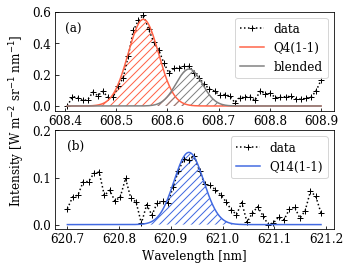

In [ ]:
font = {'family':'serif','weight':'normal','size': 12}
plt.rc('font',**font)
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
#plt.rcParams['axes.linewidth'] = 0.5 # axis line width
plt.rcParams['axes.grid'] = False # make grid
gcf().set_size_inches([5,4])

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

#a1 = 608.726829 - 0.3
#b1 = 608.726829 + 0.12
a1 = 608.4
b1 = 608.9
index1 = np.where((a1<x) & (x<b1))[0]

xx1 = x[index1[0]:index1[-1]+1] 
yy1 = y[index1[0]:index1[-1]+1]
print('Intensity_min  =',yy1.min())
yy1 = yy1 - abs(yy1.min())

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
model = peak1 + peak2

model.set_param_hint('p1_center', value=608.56, min=608.54, max=608.57)
model.set_param_hint('p2_center', value=608.63, min=608.63, max=608.65)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.06/2.3548200)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)

fit_res = model.fit(yy1, x=xx1, method='nelder')
v1 = fit_res.best_values
xxx1 = np.linspace(xx1[0],xx1[-1], len(xx1)*10)
yyy1 = gaussian(xxx1,v1['p1_amplitude'],v1['p1_center'],v1['p1_sigma'])
yyy2 = gaussian(xxx1,v1['p2_amplitude'],v1['p2_center'],v1['p2_sigma'])

ax1.plot(xx1, yy1, '+:', c='black', label='data')
ax1.plot(xxx1, yyy1, c="tomato", label='Q4(1-1)')
ax1.fill_between(xxx1, yyy1, facecolor='None', hatch='///', edgecolor="tomato", linewidth=0.0)
ax1.plot(xxx1, yyy2, c="gray", label='blended')
ax1.fill_between(xxx1, yyy2, facecolor='None', hatch='///', edgecolor="gray", linewidth=0.0)
#axL.set_xticks(np.arange(623.65, 623.95, 0.1))

#a2 = 621.110682 - 0.32
#b2 = 621.110682 + 0.1
a2 = 620.7
b2 = 621.2
index2 = np.where((a2<x) & (x<b2))[0]

xx2 = x[index2[0]:index2[-1]+1] 
yy2 = y[index2[0]:index2[-1]+1]
print('Intensity_min  =',yy2.min())
yy2 = yy2 - abs(yy2.min())

mod2 = GaussianModel()
pars2 = mod.guess(yy2, x=xx2)
pars2['amplitude'].set(value=0.007, min=0.0065, max=0.02)
pars2['center'].set(value=620.935, min=620.93, max=620.94)
pars2['sigma'].set(value=0.067/2.3548200, min=0.065/2.3548200, max=0.069/2.3548200)
out2 = mod.fit(yy2, pars2, x=xx2)
v2 = out2.best_values
xxx2 = np.linspace(xx2[0],xx2[-1], len(xx2)*10)
yyy2 = gaussian(xxx2,v2['amplitude'],v2['center'],v2['sigma'])

ax2.plot(xx2, yy2, '+:', c='black', label='data')
ax2.plot(xxx2, yyy2, '-', c='royalblue', label='Q14(1-1)')
ax2.fill_between(xxx2, yyy2, facecolor='None', hatch='///', edgecolor="royalblue", linewidth=0.0)

ax1.text(608.4, 0.47, '(a)')
ax2.text(620.7, 0.16, '(b)')

ax1.set_ylim(-0.03, 0.6)
ax2.set_ylim(-0.01, 0.2)

ax2.set_xlabel("Wavelength [nm]")
ax1.set_ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")
ax1.yaxis.set_label_coords(-0.1,-0.1)

ax1.legend()
ax2.legend()

pylab.savefig('./figure/CMOS/SN-ratio_150482_ppt.png', bbox_inches="tight", dpi=300)

Intensity_min  = 0.05686677
Intensity_min  = 0.07456014


<Figure size 360x288 with 0 Axes>

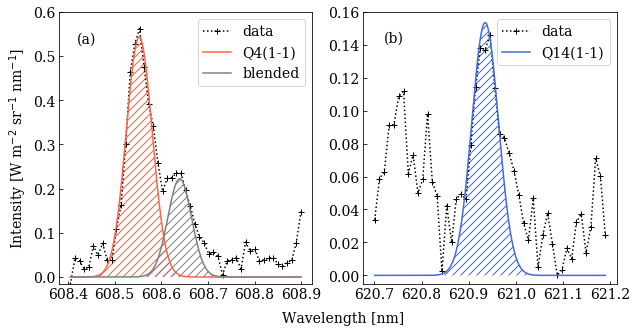

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
#plt.rcParams['axes.linewidth'] = 0.5 # axis line width
plt.rcParams['axes.grid'] = False # make grid
gcf().set_size_inches([5,4])

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,5))

#a1 = 608.726829 - 0.32
#b1 = 608.726829 + 0.1
a1 = 608.4
b1 = 608.9
index1 = np.where((a1<x) & (x<b1))[0]

xx1 = x[index1[0]:index1[-1]+1] 
yy1 = y[index1[0]:index1[-1]+1]
print('Intensity_min  =',yy1.min())
#yy1 = yy1 - abs(yy1.min())
yy1 = yy1 - 0.074

peak1 = GaussianModel(prefix='p1_')
peak2 = GaussianModel(prefix='p2_')
model = peak1 + peak2

model.set_param_hint('p1_center', value=608.56, min=608.54, max=608.57)
model.set_param_hint('p2_center', value=608.63, min=608.63, max=608.65)
model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.5)
model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.06/2.3548200)
model.set_param_hint('p1_amplitude', value=0.01, min=0.0, max=5)
model.set_param_hint('p2_amplitude', value=0.01, min=0.0, max=5)
#model.set_param_hint('p1_fwhm', value=0.06, min=0.05, max=0.09)

fit_res = model.fit(yy1, x=xx1, method='nelder')
v1 = fit_res.best_values
xxx1 = np.linspace(xx1[0],xx1[-1], len(xx1)*10)
yyy1 = gaussian(xxx1,v1['p1_amplitude'],v1['p1_center'],v1['p1_sigma'])
yyy2 = gaussian(xxx1,v1['p2_amplitude'],v1['p2_center'],v1['p2_sigma'])

axL.plot(xx1, yy1, '+:', c='black', label='data')
axL.plot(xxx1, yyy1, c="tomato", label='Q4(1-1)')
axL.fill_between(xxx1, yyy1, facecolor='None', hatch='///', edgecolor="tomato", linewidth=0.0)
axL.plot(xxx1, yyy2, c="gray", label='blended')
axL.fill_between(xxx1, yyy2, facecolor='None', hatch='///', edgecolor="gray", linewidth=0.0)
#axL.set_xticks(np.arange(623.65, 623.95, 0.1))

#a2 = 621.110682 - 0.32
#b2 = 621.110682 + 0.1
a2 = 620.7
b2 = 621.2
index2 = np.where((a2<x) & (x<b2))[0]

xx2 = x[index2[0]:index2[-1]+1] 
yy2 = y[index2[0]:index2[-1]+1]
print('Intensity_min  =',yy2.min())
yy2 = yy2 - abs(yy2.min())

mod2 = GaussianModel()
pars2 = mod.guess(yy2, x=xx2)
pars2['amplitude'].set(value=0.007, min=0.0065, max=0.02)
pars2['center'].set(value=620.935, min=620.93, max=620.94)
pars2['sigma'].set(value=0.067/2.3548200, min=0.065/2.3548200, max=0.069/2.3548200)
out2 = mod.fit(yy2, pars2, x=xx2)
v2 = out2.best_values
xxx2 = np.linspace(xx2[0],xx2[-1], len(xx2)*10)
yyy2 = gaussian(xxx2,v2['amplitude'],v2['center'],v2['sigma'])

axR.plot(xx2, yy2, '+:', c='black', label='data')
axR.plot(xxx2, yyy2, '-', c='royalblue', label='Q14(1-1)')
axR.fill_between(xxx2, yyy2, facecolor='None', hatch='///', edgecolor="royalblue", linewidth=0.0)

axL.text(608.42, 0.53, '(a)')
axR.text(620.72, 0.142, '(b)')

axL.set_ylim(-0.015, 0.6)
axR.set_ylim(-0.005, 0.16)

axR.set_xlabel("Wavelength [nm]")
axL.set_ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")
axR.xaxis.set_label_coords(-0.08,-0.1)

axL.legend()
axR.legend()

pylab.savefig('./figure/CMOS/SN-ratio_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
vv = 1
NN = 7

a = wl[vv,NN] - 0.25
b = wl[vv,NN] + 0.0
index = np.where((a<x) & (x<b))[0]

xx = x[index[0]:index[-1]+1] 
yy = y[index[0]:index[-1]+1]
print('Intensity_min  =',yy.min())
yy = yy - abs(yy.min())

mod = GaussianModel()
pars = mod.guess(yy, x=xx)
out = mod.fit(yy, pars, x=xx)
v = out.best_values
xxx = np.linspace(xx[0],xx[-1], len(xx)*10)
yyy = gaussian(xxx,v['amplitude'],v['center'],v['sigma'])

plot(xx, yy, 'o', linestyle='dotted', c='black', label='data')
plot(xxx, yyy, c='r', label='fitted')
#out.plot()
#axvline(wl[vv,NN], c='gray', ls='--') 
#axvline(v['center'], c='gray')
amp = out.params['amplitude'].value
stderr = out.params['amplitude'].stderr
print('Amplitude      =',amp)
print('Standard error =',stderr)
print('Relative error =',stderr/amp*100,'%')
print('fwhm           =',out.params['fwhm'].value)
legend()

Intensity_min  = 0.1435236
Intensity_min  = 0.05773846


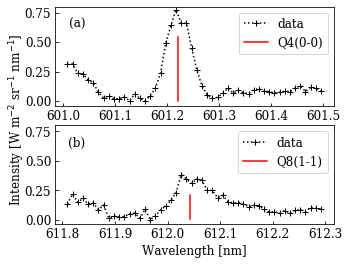

In [ ]:
font = {'family':'serif','weight':'normal','size': 12}
plt.rc('font',**font)
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
#plt.rcParams['axes.linewidth'] = 0.5 # axis line width
plt.rcParams['axes.grid'] = False # make grid
gcf().set_size_inches([5,4])

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

a1 = 601
b1 = 601.5
index1 = np.where((a1<x) & (x<b1))[0]

xx1 = x[index1[0]:index1[-1]+1] 
yy1 = y[index1[0]:index1[-1]+1]
print('Intensity_min  =',yy1.min())
yy1 = yy1 - abs(yy1.min())

ax1.plot(xx1, yy1, '+:', c='black', label='data')

a2 = 611.8
b2 = 612.3
index2 = np.where((a2<x) & (x<b2))[0]

xx2 = x[index2[0]:index2[-1]+1] 
yy2 = y[index2[0]:index2[-1]+1]
print('Intensity_min  =',yy2.min())
yy2 = yy2 - abs(yy2.min())

ax2.plot(xx2, yy2, '+:', c='black', label='data')

ax1.axvline(x=601.22, ymin=0.05, ymax=0.7, c='r', label='Q4(0-0)')
ax2.axvline(x=612.043, ymin=0.05, ymax=0.3, c='r', label='Q8(1-1)')
#axR.axvline(x=603.134, ymin=0.05, ymax=0.12, c='b', label='blended')
#ax1.text(623.6 , 0.6, '(a)')
#ax2.text(624.73, 0.2, '(b)')
ax1.set_ylim(-0.04,0.8)
ax2.set_ylim(-0.04,0.8)

ax1.text(601.01, 0.62, '(a)')
ax2.text(611.81, 0.62, '(b)')

ax2.set_xlabel("Wavelength [nm]")
ax1.set_ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")
ax1.yaxis.set_label_coords(-0.1,-0.14)

ax1.legend()
ax2.legend()

pylab.savefig('./figure/CMOS/check_Qline_150482_ppt.png', bbox_inches="tight", dpi=300)

Intensity_min  = 0.1435236
Intensity_min  = 0.05773846


<Figure size 720x360 with 0 Axes>

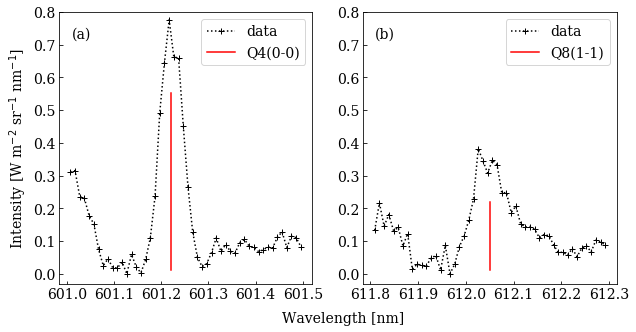

In [ ]:
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
#plt.rcParams['axes.linewidth'] = 0.5 # axis line width
plt.rcParams['axes.grid'] = False # make grid
gcf().set_size_inches([10,5])

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,5))

#a1 = 601.391 - 0.3
#b1 = 601.391 - 0
a1 = 601
b1 = 601.5
index1 = np.where((a1<x) & (x<b1))[0]

xx1 = x[index1[0]:index1[-1]+1] 
yy1 = y[index1[0]:index1[-1]+1]
print('Intensity_min  =',yy1.min())
yy1 = yy1 - abs(yy1.min())

axL.plot(xx1, yy1, '+:', c='black', label='data')

#a2 = 612.216 - 0.3
#b2 = 612.216 - 0
a2 = 611.8
b2 = 612.3
index2 = np.where((a2<x) & (x<b2))[0]

xx2 = x[index2[0]:index2[-1]+1] 
yy2 = y[index2[0]:index2[-1]+1]
print('Intensity_min  =',yy2.min())
yy2 = yy2 - abs(yy2.min())

axR.plot(xx2, yy2, '+:', c='black', label='data')

axL.axvline(x=601.22, ymin=0.05, ymax=0.7, c='r', label='Q4(0-0)')
axR.axvline(x=612.05, ymin=0.05, ymax=0.3, c='r', label='Q8(1-1)')
#axR.axvline(x=603.134, ymin=0.05, ymax=0.12, c='b', label='blended')
#ax1.text(623.6 , 0.6, '(a)')
#ax2.text(624.73, 0.2, '(b)')
axL.set_ylim(-0.03,0.8)
axR.set_ylim(-0.03,0.8)

axL.text(601.01, 0.72, '(a)')
axR.text(611.81, 0.72, '(b)')

axR.set_xlabel("Wavelength [nm]")
axL.set_ylabel("Intensity [W m$^{-2}$ sr$^{-1}$ nm$^{-1}$]")
axR.xaxis.set_label_coords(-0.08,-0.1)

axL.legend()
axR.legend()

pylab.savefig('./figure/CMOS/check_Qline_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
inte = np.loadtxt('./data_files/CMOS_D2/int_150482_f7.txt') # intensity of experiment inte[NN-1][vv] 1<=NN<=11, 0<=vv<=3
inte_error = np.loadtxt('./data_files/CMOS_D2/err_150482_f7.txt')
# nomarized einstein's A coefficient aeinm[vv] 0<=vv<=3
aeinm = np.array([2.3387E+7/(2.3387E+7+2.3479E+6+3.9083E+4+6.9282E+1+6.7372E-2+1.9986E-2+2.9027E-4+7.7599E-3),    
                  1.8841E+7/(2.1551E+6+1.8841E+7+4.4730E+6+1.2747E+5+2.7294E+2+4.3313E-1+3.4305E-2+3.5382E-2),
                  1.4795E+7/(1.8763E+5+3.8098E+6+1.4795E+7+6.3500E+6+2.4539E+5+6.9366E+2+2.0363E+0+2.0664E-3),
                  1.1276E+7/(1.7678E+4+5.2206E+5+4.9835E+6+1.1276E+7+7.9698E+6+4.1361E+5+1.3613E+3+6.0937E+0)
                 ])

wl = np.loadtxt('./data_files/fulcher-α_band_wavenumber_D2.txt')
wl = 1/(wl.T*1e-7) # wavenumber [cm-1] -> wavelength [nm]
wl.shape

(5, 15)

In [ ]:
Nda = inte*wl.T[0:14,0:4]/aeinm         # Nda[NN,vv] [a.u.] 0<=NN-1<=14, 0<=vv<=3
Nda_error = inte_error*wl.T[0:14,0:4]/aeinm
print(Nda)
print(Nda_error)
Ndafit_error = Nda_error.T[Nda_error.T != 0]
Ndafit = Nda.T[Nda.T != 0]
Ndafit_error = Ndafit_error/sum(Ndafit)
Ndafit = Ndafit/sum(Ndafit) 

[[ 0.          0.          0.          0.        ]
 [29.30844219 23.68894026 22.79014747 18.64714224]
 [ 0.         15.94978271  0.          0.        ]
 [35.14629571 30.98136176 24.09838967 20.99638091]
 [ 0.         12.30585102  0.          0.        ]
 [40.10129281 24.49956755  0.          0.        ]
 [18.74064125  0.          0.          0.        ]
 [34.69330008  0.         17.29458942  0.        ]
 [ 0.          0.          0.          0.        ]
 [30.89369343 19.92433843  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.80292112  6.3377029   0.          0.        ]]
[[0.         0.         0.         0.        ]
 [2.48727902 1.75627151 1.99870428 1.75908568]
 [0.         1.02679267 0.         0.        ]
 [3.8050504  2.03210158 1.99440344 3.00552893]
 [0.         0.81392678 0.         0.        ]
 [1.39287247 1.48609846 0.         0.        ]
 [2

In [ ]:
[[ 0.          0.          0.          0.        ]
 [24.01989727 26.05251676 25.03024574 18.64714224]
 [ 0.         18.24884974  0.          0.        ]
 [30.46671533 30.98136176 26.05653315 17.96523628]
 [ 0.          0.          0.          0.        ]
 [42.11519081  0.         19.49545128  0.        ]
 [17.79996587  0.          0.          0.        ]
 [34.69330008  0.         17.23516077  0.        ]
 [15.90200681  0.          0.          0.        ]
 [35.01532479 22.56747115  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [26.8043964   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [15.52725632  0.          0.          0.        ]]

SyntaxError: invalid syntax (<ipython-input-8-f05a7d389ecb>, line 1)

In [ ]:
E_vib = np.loadtxt('./data_files/vibrational_energy_D2.txt')             # use reference data
Ee_vib = np.loadtxt('./data_files/excitation_vibrational_energy_D2.txt') # use reference data
fcf = np.loadtxt('./data_files/franck_condon_factor_D2.txt') 

In [ ]:
# check rotational-transition-probability

Qr = np.array([0.76,0.122,0.1,0.014]) 
rtp_check = np.zeros([30,15]) # rtp[N,NN-1]
print(rtp_check.shape)
for N in range(30): 
    for NN in range(1,15,1):
        for r in range(1,5,1):   
            rtp_check[N,NN-1] += Qr[r-1]*(2*NN+1)*(wigner_3j(NN,r,N,1,-1,0))**2
            if( (2*np.mod(N,2)+1)!=(2*np.mod(NN,2)+1) ): 
                rtp_check[N,NN-1] = 0 # forbidden transition is zero
#print(rtp_check)
print(rtp_check[rtp_check!=0].shape)

#np.savetxt('check_mat/rtp_check.txt', rtp_check)

(30, 15)
(66,)


In [ ]:
Te = input("Please enter electronic temperature [eV] : ")
Te = float(Te)*1.16045E+4 # electronic temperature [K] [eV]→[K]
k = 8.6173303E-5  # boltzmann constant [eV/K] 

# colisional cross-section ccs[v][vv] 0<=v<=14(max=14) 0<=vv<=14
# ccs is used Franck-Condon principle
# ccs depends on Te 
ccs_new = np.zeros([len(fcf[:,0])])  
ccs = np.zeros([len(fcf[:,0]),len(fcf[0,:])])  
for v in range(len(fcf[:,0])):
    ccs_new[v] = np.exp(-(E_vib[v]-E_vib[0])/(k*Te))
    for vv in range(len(fcf[0,:])):
        ccs[v,vv] = np.exp(-((Ee_vib[vv]-Ee_vib[0])-(E_vib[v]-E_vib[0]))/(k*Te))

Please enter electronic temperature [eV] :  15


Text(0,0.5,'Rotational Energy [eV]')

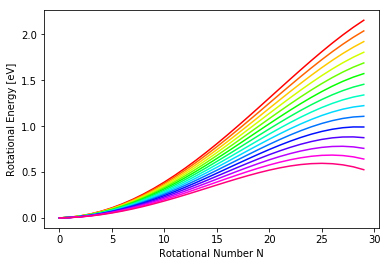

In [ ]:
Be = 30.443
ae = 1.07886
De = 0.01141

E_rot_cal = np.zeros( [len(fcf[:,0]), len(rtp_check[:,0])] )
for v in range(15):
    for N in range(30):
        E_rot_cal[v,N] = ( (Be-ae*(v+1/2))*N*(N+1) - De*(N**2)*((N+1)**2) )*1.23984e-4
        
for v in range(15):
    #for N in range(N_range):
    plot(E_rot_cal[v,:], color=cm.hsv(v/15), label=v)
    #legend()
    
xlabel('Rotational Number N')
ylabel('Rotational Energy [eV]')

In [ ]:
# coronal model fitting 
 
def fitfunc(x, T_rot, T_vib):
    NdvN = np.zeros([len(Nda[:,0]),len(Nda[0,:])]) 
    for vv in range(len(Nda[0,:])):
        for NN in range(len(Nda[:,0])):
            for v in range(4):
                nc = 0 # nomalizing constant  
                for N in range(20):
                    nc += (2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(T_rot*k))
                for N in range(20):
                    if(Nda[NN,vv] == 0):
                        NdvN[NN,vv] = 0 
                    else:
                        NdvN[NN,vv] += rtp_check[N,NN]*fcf[v,vv]*ccs[v,vv]/nc*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(T_rot*k)-(E_vib[v]-E_vib[0])/(T_vib*k))
    
    NdvNfit = NdvN.T[NdvN.T != 0]
    FITP = NdvNfit/sum(NdvNfit)  # fit-variable
    #print(FITP)
    return FITP

array_x = np.arange(len(Ndafit))
para_ini = np.array([3000, 10000])
para_opt, para_cov = sp.optimize.curve_fit(fitfunc, array_x, Ndafit, para_ini, sigma=Ndafit_error, absolute_sigma=False)
para_err = np.sqrt(np.diag(para_cov))

print('T_rot, T_vib =', para_opt)
#print('Covariance =', para_cov)
print('Standard error =', para_err)

T_rot, T_vib = [ 2603.49107148 12118.16705001]
Standard error = [ 161.26063574 2585.17594565]


In [ ]:
Be_d = 15.200
ae_d = 0.5520
De_d = 0.0049
Ed_rot = np.zeros([inte.shape[1],inte.shape[0]]) # Rotational Energy of d^3 state
for vv in range(inte.shape[1]):
    for NN in range(1,inte.shape[0]+1):
        Ed_rot[vv,NN-1] = ((Be_d-ae_d*(vv+0.5))*NN*(NN+1)-De_d*(NN**2)*((NN+1)**2))*1.23984*1e-4

In [ ]:
# make A-coefficient matrix
FC_factor = np.array([2.3387E+7, 1.8841E+7, 1.4795E+7, 1.1276E+7])
A = np.zeros([FC_factor.shape[0], inte.shape[0]])
for vv in range(FC_factor.shape[0]):
    for NN in range(1,inte.shape[0]+1,1):
        A[vv,NN-1] = FC_factor[vv]*(2*NN+1)/2 

In [ ]:
Boltz_plot = np.zeros([inte.shape[1],inte.shape[0]]) 
for vv in range(inte.shape[1]):
    for NN in range(1,inte.shape[0]+1):
        Boltz_plot[vv,NN-1] = ((inte[NN-1,vv]*(wl[vv,NN-1]**1))/(((2*NN+1)**2)*(6-3*np.mod(NN,2))))

print(Boltz_plot)

[[0.         0.17729369 0.         0.06561983 0.         0.03588494
  0.02519257 0.01815467 0.         0.01059429 0.         0.
  0.         0.00230226]
 [0.         0.11624437 0.07986472 0.04692257 0.02495299 0.01778435
  0.         0.         0.         0.00554258 0.         0.
  0.         0.00092449]
 [0.         0.08853878 0.         0.02889545 0.         0.
  0.         0.00581218 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.05566101 0.         0.01934364 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]


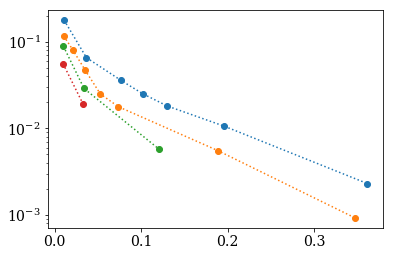

In [ ]:
for vv in range(inte.shape[1]):
    plot(Ed_rot[vv,:][Boltz_plot[vv,:]!=0], Boltz_plot[vv,:][Boltz_plot[vv,:]!=0], 'o:')

yscale('log')
#pylab.savefig('./figure/check_150482', bbox_inches="tight", dpi=300)

In [ ]:
ndN = inte*wl.T[0:14,0:4]/A.T
ndN = ndN[:,0]
ndN_err = inte_error*wl.T[0:14,0:4]/A.T
ndN_err = ndN_err[:,0] 

In [ ]:
print(ndN)
print(ndN_err)

[0.00000000e+00 4.54851907e-07 0.00000000e+00 3.03029102e-07
 0.00000000e+00 2.39365916e-07 9.69483623e-08 1.58359448e-07
 0.00000000e+00 1.14155759e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.42577125e-08]
[0.00000000e+00 3.86012876e-08 0.00000000e+00 3.28068999e-08
 0.00000000e+00 8.31410093e-09 1.16369017e-08 5.29908594e-09
 0.00000000e+00 5.11752842e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.99644051e-09]


In [ ]:
# two-Boltzmann fit
 
def fit_two_temperature(x, beta, T_rot1, T_rot2):
    nd = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
    #nd2 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot2
    nc = 0 # nomalizing constant  
    #nc2 = 0 
    for NN in range(1,Nda.shape[0]+1,1):
        if(ndN[NN-1] != 0):
            nc += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(T_rot2*k)))
            #nc2 += (2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[0,NN-1]/(T_rot2*k))
    for NN in range(1,Nda.shape[0]+1,1):
        if(ndN[NN-1] != 0):
            nd[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(T_rot2*k)) )/nc 
            #nd2[NN-1] = (2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[0,NN-1]/(T_rot2*k))/nc2 

    FITP = nd[nd != 0]/sum(nd)  # fit-variable
    #print(FITP)
    return FITP

array_x = np.arange(len(ndN[ndN!=0]))
para_ini = np.array([0.1, 200, 2000])
#para_opt, para_cov = sp.optimize.curve_fit(fitfunc, array_x, Ndafit, para_ini, sigma=Nda_error[:,0][Nda_error[:,0] != 0], absolute_sigma=False)
para_opt, para_cov = sp.optimize.curve_fit(fit_two_temperature, array_x, ndN[ndN!=0]/sum(ndN[ndN!=0]), para_ini, sigma=ndN_err[ndN_err!=0]/sum(ndN[ndN!=0]), absolute_sigma=False)
para_err = np.sqrt(np.diag(para_cov))

print('beta, T_rot1, T_rot2 =', para_opt)
#print('Covariance =', para_cov)
print('Standard error =', para_err)

beta, T_rot1, T_rot2 = [2.37180935e-01 2.47251338e+02 1.31014569e+03]
Standard error = [2.51938578e-02 4.22842376e+01 9.08736964e+01]


In [ ]:
# check 68-95-99.7% rule (uncertainty is assumed normal distribution)
nstd = 1 # N=nstd-sigma range

p1 = para_opt[1] + nstd*para_err[1], para_opt[2] + nstd*para_err[2]
p2 = para_opt[1] - nstd*para_err[1], para_opt[2] + nstd*para_err[2]
p3 = para_opt[1] + nstd*para_err[1], para_opt[2] - nstd*para_err[2]
p4 = para_opt[1] - nstd*para_err[1], para_opt[2] - nstd*para_err[2]
p5 = para_opt[0] + nstd*para_err[0]
p6 = para_opt[0] - nstd*para_err[0]

print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)

(289.5355760516145, 1401.0193886532502)
(204.96710081511188, 1401.0193886532502)
(289.5355760516145, 1219.2719958097691)
(204.96710081511188, 1219.2719958097691)
0.2623747928284765
0.21198707723413565


In [ ]:
# consider uncertainty of N-sigma 
nd = np.zeros(Nda.shape[0]) # Boltzmann distribution 

nd_p1p5 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
nd_p2p5 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
nd_p3p5 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
nd_p4p5 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1

nd_p1p6 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
nd_p2p6 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
nd_p3p6 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1
nd_p4p6 = np.zeros(Nda.shape[0]) # Boltzmann distribution of T_rot1

nc = 0 # nomalizing constant  

nc_p1p5 = 0
nc_p2p5 = 0
nc_p3p5 = 0
nc_p4p5 = 0

nc_p1p6 = 0
nc_p2p6 = 0
nc_p3p6 = 0
nc_p4p6 = 0

for NN in range(1,Nda.shape[0]+1,1):
    nc += (1-para_opt[0])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(para_opt[1]*k)) + para_opt[0]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(para_opt[2]*k))

    nc_p1p5 += (1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[1]*k))
    nc_p2p5 += (1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[1]*k)) 
    nc_p3p5 += (1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[1]*k)) 
    nc_p4p5 += (1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[1]*k)) 

    nc_p1p6 += (1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[1]*k)) 
    nc_p2p6 += (1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[1]*k)) 
    nc_p3p6 += (1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[1]*k))  
    nc_p4p6 += (1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[1]*k)) 

for NN in range(1,Nda.shape[0]+1,1):
    nd[NN-1] = ((1-para_opt[0])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(para_opt[1]*k)) + para_opt[0]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(para_opt[2]*k)))/nc

    nd_p1p5[NN-1] = ((1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[1]*k)))/nc_p1p5
    nd_p2p5[NN-1] = ((1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[1]*k)))/nc_p2p5
    nd_p3p5[NN-1] = ((1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[1]*k)))/nc_p3p5
    nd_p4p5[NN-1] = ((1-p5)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[0]*k)) + p5*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[1]*k)))/nc_p4p5

    nd_p1p6[NN-1] = ((1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p1[1]*k)))/nc_p1p6
    nd_p2p6[NN-1] = ((1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p2[1]*k)))/nc_p2p6
    nd_p3p6[NN-1] = ((1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p3[1]*k)))/nc_p3p6
    nd_p4p6[NN-1] = ((1-p6)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[0]*k)) + p6*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[0,NN-1]/(p4[1]*k)))/nc_p4p6

In [ ]:
# prepare boltzmann plot
ndN_ln = np.zeros(Nda.shape[0]) # experimental value
ndN_err_ln = np.zeros(Nda.shape[0]) # error value
nd_ln = np.zeros(Nda.shape[0]) # two-Boltzmann fit

nd_p1p5_ln = np.zeros(Nda.shape[0])
nd_p2p5_ln = np.zeros(Nda.shape[0]) 
nd_p3p5_ln = np.zeros(Nda.shape[0])
nd_p4p5_ln = np.zeros(Nda.shape[0])

nd_p1p6_ln = np.zeros(Nda.shape[0])
nd_p2p6_ln = np.zeros(Nda.shape[0])
nd_p3p6_ln = np.zeros(Nda.shape[0])
nd_p4p6_ln = np.zeros(Nda.shape[0])

for NN in range(1,Nda.shape[0]+1,1):
    ndN_ln[NN-1] = ndN[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    ndN_err_ln[NN-1] = ndN_err[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_ln[NN-1] = nd[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))

    nd_p1p5_ln[NN-1] = nd_p1p5[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_p2p5_ln[NN-1] = nd_p2p5[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_p3p5_ln[NN-1] = nd_p3p5[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_p4p5_ln[NN-1] = nd_p4p5[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))

    nd_p1p6_ln[NN-1] = nd_p1p6[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_p2p6_ln[NN-1] = nd_p2p6[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_p3p6_ln[NN-1] = nd_p3p6[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd_p4p6_ln[NN-1] = nd_p4p6[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))

# make error-bar
nd_err_max = np.zeros(Nda.shape[0])
nd_err_min = np.zeros(Nda.shape[0])
for NN in range(1,Nda.shape[0]+1,1):
    nd_err_max[NN-1] = np.max(np.array([nd_p1p5_ln[NN-1], nd_p2p5_ln[NN-1], nd_p3p5_ln[NN-1], nd_p4p5_ln[NN-1], nd_p1p6_ln[NN-1], nd_p2p6_ln[NN-1], nd_p3p6_ln[NN-1], nd_p4p6_ln[NN-1]]))
    nd_err_min[NN-1] = np.min(np.array([nd_p1p5_ln[NN-1], nd_p2p5_ln[NN-1], nd_p3p5_ln[NN-1], nd_p4p5_ln[NN-1], nd_p1p6_ln[NN-1], nd_p2p6_ln[NN-1], nd_p3p6_ln[NN-1], nd_p4p6_ln[NN-1]]))

nd_err_plus = nd_err_max - nd_ln
nd_err_minus = nd_ln - nd_err_min

In [ ]:
2.003723532564996
1.9314332618600913
1.8591429911551864
1.7868527204502815

1.7868527204502815

In [ ]:
v = 3
vv = 0

print(Be-ae*(v+0.5))
print(Be_d-ae_d*(vv+0.5))
print((Be-ae*(v+0.5))/(Be_d-ae_d*(vv+0.5)))

print(((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))/((Be-ae*(v+0.5))/(Be_d-ae_d*(vv+0.5))))

26.666990000000002
14.924
1.7868527204502815
1.1213702783853745


In [ ]:
ndN = inte*wl.T[0:14,0:4]/A.T
ndN_err = inte_error*wl.T[0:14,0:4]/A.T 

In [ ]:
# two-Boltzmann fit with v'=0-3 state
 
def fit_two_temperature(x, beta, T_rot1, T_rot2):
    v0 = 0
    v1 = 1
    v2 = 2
    v3 = 3
    
    nd0 = np.zeros(ndN.shape[0]) # Boltzmann distribution of T_rot1
    nd1 = np.zeros(ndN.shape[0])
    nd2 = np.zeros(ndN.shape[0])
    nd3 = np.zeros(ndN.shape[0])
    
    nc0 = 0 # nomalizing constant  
    nc1 = 0
    nc2 = 0
    nc3 = 0
   
    for NN in range(1,ndN.shape[0]+1,1):
        if(ndN[NN-1,v0] != 0):
            nc0 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot2*k)))
        if(ndN[NN-1,v1] != 0):
            nc1 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot2*k)))
        if(ndN[NN-1,v2] != 0):
            nc2 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot2*k)))     
        #if(Nda[NN-1,v3] != 0):
        #    nc3 += ((1-beta)*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot1*k)) + beta*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot2*k)))     

    for NN in range(1,ndN.shape[0]+1,1):
        if(ndN[NN-1,v0] != 0):
            nd0[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot2*k)))/nc0 
        if(ndN[NN-1,v1] != 0):
            nd1[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot2*k)))/nc1 
        if(ndN[NN-1,v2] != 0):
            nd2[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot2*k)))/nc2            
        #if(Nda[NN-1,v3] != 0):
        #    nd3[NN-1] = ((1-beta)*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot1*k)) + beta*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot2*k)))/nc3            

    
    fitarray = np.array([nd0, nd1, nd2]).flatten()
    FITP = fitarray[(ndN[:,0:3].T).flatten()!=0]
    #print(FITP)
    return FITP

fittedvec = np.array([ndN[:,0]/sum(ndN[:,0]), ndN[:,1]/sum(ndN[:,1]), ndN[:,2]/sum(ndN[:,2])]).flatten()
fittederr = np.array([ndN_err[:,0]/sum(ndN[:,0]), ndN_err[:,1]/sum(ndN[:,1]), ndN_err[:,2]/sum(ndN[:,2])]).flatten()

array_x = np.arange(len(ndN.T[ndN.T!=0]))
para_ini = np.array([0.1, 200, 1000])
pall, pallcov = sp.optimize.curve_fit(fit_two_temperature, array_x, fittedvec[(ndN[:,0:3].T).flatten()!=0], para_ini, sigma=fittederr[(ndN[:,0:3].T).flatten()!=0], absolute_sigma=False, maxfev=1000)
pallerr = np.sqrt(np.diag(pallcov))

print('beta =', pall)
#print('Covariance =', para_cov)
print('Standard error =', pallerr)

beta = [1.85134240e-01 1.93905223e+02 1.18370767e+03]
Standard error = [2.58556944e-02 3.58201180e+01 7.99023811e+01]


In [ ]:
# two-Boltzmann fit with v'=0-3 state
 
def fit_two_temperature(x, alpha, beta, T_rot1, T_rot2):
    v0 = 0
    v1 = 1
    v2 = 2
    v3 = 3
    
    nd0 = np.zeros(ndN.shape[0]) # Boltzmann distribution of T_rot1
    nd1 = np.zeros(ndN.shape[0])
    nd2 = np.zeros(ndN.shape[0])
    nd3 = np.zeros(ndN.shape[0])
    
    nc0 = 0 # nomalizing constant  
    nc1 = 0
    nc2 = 0
    nc3 = 0
   
    for NN in range(1,ndN.shape[0]+1,1):
        if(ndN[NN-1,v0] != 0):
            nc0 += ((1-alpha)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot1*k)) + alpha*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot2*k)))
        if(ndN[NN-1,v1] != 0):
            nc1 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot2*k)))
        if(ndN[NN-1,v2] != 0):
            nc2 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot2*k)))     
        #if(Nda[NN-1,v3] != 0):
        #    nc3 += ((1-beta)*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot1*k)) + beta*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot2*k)))     

    for NN in range(1,ndN.shape[0]+1,1):
        if(ndN[NN-1,v0] != 0):
            nd0[NN-1] = ((1-alpha)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot1*k)) + alpha*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot2*k)))/nc0 
        if(ndN[NN-1,v1] != 0):
            nd1[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot2*k)))/nc1 
        if(ndN[NN-1,v2] != 0):
            nd2[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot2*k)))/nc2            
        #if(Nda[NN-1,v3] != 0):
        #    nd3[NN-1] = ((1-beta)*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot1*k)) + beta*(2*NN+1)*(2*np.mod(NN,2)+1)*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot2*k)))/nc3            

    
    fitarray = np.array([nd0, nd1, nd2]).flatten()
    FITP = fitarray[(ndN[:,0:3].T).flatten()!=0]
    #print(FITP)
    return FITP

fittedvec = np.array([ndN[:,0]/sum(ndN[:,0]), ndN[:,1]/sum(ndN[:,1]), ndN[:,2]/sum(ndN[:,2])]).flatten()
fittederr = np.array([ndN_err[:,0]/sum(ndN[:,0]), ndN_err[:,1]/sum(ndN[:,1]), ndN_err[:,2]/sum(ndN[:,2])]).flatten()

array_x = np.arange(len(ndN.T[ndN.T!=0]))
para_ini = np.array([0.2, 0.1, 200, 1000])
pall, pallcov = sp.optimize.curve_fit(fit_two_temperature, array_x, fittedvec[(ndN[:,0:3].T).flatten()!=0], para_ini, sigma=fittederr[(ndN[:,0:3].T).flatten()!=0], absolute_sigma=False, maxfev=1000)
pallerr = np.sqrt(np.diag(pallcov))

print('beta =', pall)
#print('Covariance =', para_cov)
print('Standard error =', pallerr)

beta = [2.37765195e-01 1.41516400e-01 2.09501695e+02 1.23568635e+03]
Standard error = [1.95294793e-02 1.16612361e-02 1.76342205e+01 4.64862455e+01]


In [ ]:
# two-Boltzmann fit with v'=0-3 state
 
def fit_two_temperature(x, alpha, beta, T_rot1, T_rot2):
    v0 = 0
    v1 = 1
    v2 = 2
    v3 = 3
    
    nd0 = np.zeros(ndN.shape[0]) # Boltzmann distribution of T_rot1
    nd1 = np.zeros(ndN.shape[0])
    nd2 = np.zeros(ndN.shape[0])
    nd3 = np.zeros(ndN.shape[0])
    
    nc0 = 0 # nomalizing constant  
    nc1 = 0
    nc2 = 0
    nc3 = 0
   
    for NN in range(1,ndN.shape[0]+1,1):
        if(ndN[NN-1,v0] != 0):
            nc0 += ((1-alpha)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot1*k)) + alpha*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot2*k)))
        if(ndN[NN-1,v1] != 0):
            nc1 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot2*k)))
        if(ndN[NN-1,v2] != 0):
            nc2 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot2*k)))     
        if(Nda[NN-1,v3] != 0):
            nc3 += ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot2*k)))     

    for NN in range(1,ndN.shape[0]+1,1):
        if(ndN[NN-1,v0] != 0):
            nd0[NN-1] = ((1-alpha)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot1*k)) + alpha*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(T_rot2*k)))/nc0 
        if(ndN[NN-1,v1] != 0):
            nd1[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*T_rot2*k)))/nc1 
        if(ndN[NN-1,v2] != 0):
            nd2[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*T_rot2*k)))/nc2            
        if(Nda[NN-1,v3] != 0):
            nd3[NN-1] = ((1-beta)*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot1*k)) + beta*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*T_rot2*k)))/nc3            

    
    fitarray = np.array([nd0, nd1, nd2, nd3]).flatten()
    FITP = fitarray[(ndN[:,0:4].T).flatten()!=0]
    #print(FITP)
    return FITP

fittedvec = np.array([ndN[:,0]/sum(ndN[:,0]), ndN[:,1]/sum(ndN[:,1]), ndN[:,2]/sum(ndN[:,2]), ndN[:,3]/sum(ndN[:,3])]).flatten()
fittederr = np.array([ndN_err[:,0]/sum(ndN[:,0]), ndN_err[:,1]/sum(ndN[:,1]), ndN_err[:,2]/sum(ndN[:,2]), ndN_err[:,2]/sum(ndN[:,2])]).flatten()

array_x = np.arange(len(ndN.T[ndN.T!=0]))
para_ini = np.array([0.2, 0.1, 200, 1000])
pall, pallcov = sp.optimize.curve_fit(fit_two_temperature, array_x, fittedvec[(ndN[:,0:4].T).flatten()!=0], para_ini, sigma=fittederr[(ndN[:,0:4].T).flatten()!=0], absolute_sigma=False, maxfev=1000)
pallerr = np.sqrt(np.diag(pallcov))

print('beta =', pall)
#print('Covariance =', para_cov)
print('Standard error =', pallerr)

beta = [2.37941057e-01 1.41663140e-01 2.09948584e+02 1.23613171e+03]
Standard error = [1.79607336e-02 1.06044971e-02 1.48018671e+01 4.27729282e+01]


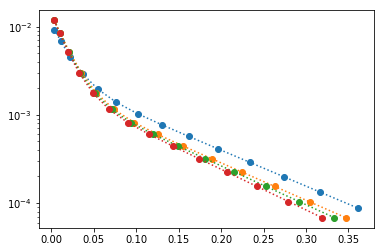

In [ ]:
v0 = 0
v1 = 1
v2 = 2
v3 = 3

nd0 = np.zeros(ndN.shape[0]) # Boltzmann distribution of T_rot1
nd1 = np.zeros(ndN.shape[0])
nd2 = np.zeros(ndN.shape[0])
nd3 = np.zeros(ndN.shape[0])

nc0 = 0 # nomalizing constant  
nc1 = 0
nc2 = 0
nc3 = 0    

for NN in range(1,ndN.shape[0]+1,1):
    nc0 += ((1-pall[0])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(pall[2]*k))          + pall[0]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(pall[3]*k)))
    nc1 += ((1-pall[1])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*pall[2]*k)) + pall[1]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*pall[3]*k)))
    nc2 += ((1-pall[1])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*pall[2]*k)) + pall[1]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*pall[3]*k)))     
    nc3 += ((1-pall[1])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*pall[2]*k)) + pall[1]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*pall[3]*k)))     

for NN in range(1,ndN.shape[0]+1,1):
    nd0[NN-1] = ((1-pall[0])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(pall[2]*k))          + pall[0]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v0,NN-1]/(pall[3]*k)) )/nc0 
    nd1[NN-1] = ((1-pall[1])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*pall[2]*k)) + pall[1]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v1,NN-1]/(0.963012*pall[3]*k)) )/nc1
    nd2[NN-1] = ((1-pall[1])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*pall[2]*k)) + pall[1]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v2,NN-1]/(0.926025*pall[3]*k)) )/nc2            
    nd3[NN-1] = ((1-pall[1])*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*pall[2]*k)) + pall[1]*(2*NN+1)*(6-3*np.mod(NN,2))*np.exp(-Ed_rot[v3,NN-1]/(0.843367*pall[3]*k)))/nc3       

# prepare boltzmann plot
nd0_g = np.zeros(ndN.shape[0]) # experimental value
nd1_g = np.zeros(ndN.shape[0]) # error value
nd2_g = np.zeros(ndN.shape[0]) # two-Boltzmann fit
nd3_g = np.zeros(ndN.shape[0]) 

for NN in range(1,ndN.shape[0]+1,1):
    nd0_g[NN-1] = nd0[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd1_g[NN-1] = nd1[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd2_g[NN-1] = nd2[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
    nd3_g[NN-1] = nd3[NN-1]/((2*NN+1)*(6-3*np.mod(NN,2))) 
    
plot(Ed_rot[0,:], nd0_g, 'o:')
plot(Ed_rot[1,:], nd1_g, 'o:')
plot(Ed_rot[2,:], nd2_g, 'o:')
plot(Ed_rot[3,:], nd2_g, 'o:')
yscale('log')

[2.11529811e-06 1.54823508e-06 1.38738287e-06]


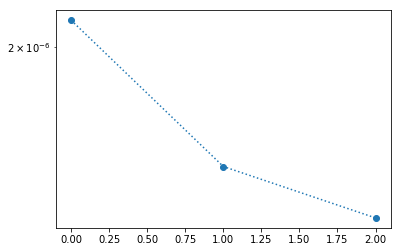

In [ ]:
# prepare for analysis

def fita(x, a):
    fita = a * nd0[ndN[:,0]!=0]  # fit-variable
    return fita

para_ini = np.array([0.1])
array_a = np.arange(len(ndN[:,0][ndN[:,0]!=0]))
a_opt, a_cov = sp.optimize.curve_fit(fita, array_a, ndN[:,0][ndN[:,0]!=0], para_ini)
a_err = np.sqrt(np.diag(a_cov))
               
    
def fitb(x, b):
    fitb = b * nd1[ndN[:,1]!=0]
    return fitb

array_b = np.arange(len(ndN[:,1][ndN[:,1]!=0]))
b_opt, b_cov = sp.optimize.curve_fit(fitb, array_b, ndN[:,1][ndN[:,1]!=0], para_ini)
b_err = np.sqrt(np.diag(b_cov))


def fitc(x, c):
    fitc = c * nd2[ndN[:,2]!=0]
    return fitc

array_c = np.arange(len(ndN[:,2][ndN[:,2]!=0]))
c_opt, c_cov = sp.optimize.curve_fit(fitc, array_c, ndN[:,2][ndN[:,2]!=0], para_ini)
c_err = np.sqrt(np.diag(c_cov))


fitv = np.array([sum(nd0*a_opt), sum(nd1*b_opt), sum(nd2*c_opt)])
print(fitv)
plot(fitv,'o:')
yscale('log')

[2.11529811e-06 1.54823508e-06 1.38738287e-06 1.14960241e-06]


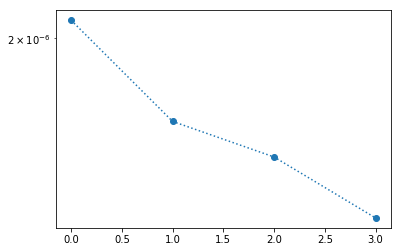

In [ ]:
# prepare for analysis

def fita(x, a):
    fita = a * nd0[ndN[:,0]!=0]  # fit-variable
    return fita

para_ini = np.array([0.1])
array_a = np.arange(len(ndN[:,0][ndN[:,0]!=0]))
a_opt, a_cov = sp.optimize.curve_fit(fita, array_a, ndN[:,0][ndN[:,0]!=0], para_ini)
a_err = np.sqrt(np.diag(a_cov))
               
    
def fitb(x, b):
    fitb = b * nd1[ndN[:,1]!=0]
    return fitb

array_b = np.arange(len(ndN[:,1][ndN[:,1]!=0]))
b_opt, b_cov = sp.optimize.curve_fit(fitb, array_b, ndN[:,1][ndN[:,1]!=0], para_ini)
b_err = np.sqrt(np.diag(b_cov))


def fitc(x, c):
    fitc = c * nd2[ndN[:,2]!=0]
    return fitc

array_c = np.arange(len(ndN[:,2][ndN[:,2]!=0]))
c_opt, c_cov = sp.optimize.curve_fit(fitc, array_c, ndN[:,2][ndN[:,2]!=0], para_ini)
c_err = np.sqrt(np.diag(c_cov))


def fitd(x, d):
    fitd = d * nd3[ndN[:,3]!=0]
    return fitd

array_d = np.arange(len(ndN[:,3][ndN[:,3]!=0]))
d_opt, d_cov = sp.optimize.curve_fit(fitd, array_d, ndN[:,3][ndN[:,3]!=0], para_ini)
d_err = np.sqrt(np.diag(d_cov))

fitv = np.array([sum(nd0*a_opt), sum(nd1*b_opt), sum(nd2*c_opt), sum(nd3*d_opt)])
print(fitv)
plot(fitv,'o:')
yscale('log')

In [ ]:
fitted = np.array([nd0*a_opt, nd1*b_opt, nd2*c_opt])
print(fitted)

# prepare boltzmann plot
ndN_g = np.zeros([ndN.shape[1],ndN.shape[0]]) # experimental value
ndNerr_g = np.zeros([ndN.shape[1],ndN.shape[0]]) # error value
fitted_g = np.zeros([ndN.shape[1],ndN.shape[0]]) # two-Boltzmann fit
for vv in range(ndN.shape[1]-1):
    for NN in range(1,ndN.shape[0]+1,1):
        ndN_g[vv,NN-1] = ndN.T[vv,NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
        ndNerr_g[vv,NN-1] = ndN_err.T[vv,NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
        fitted_g[vv,NN-1] = fitted[vv,NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))

[[1.76734192e-07 4.34391226e-07 2.02441095e-07 3.34413910e-07
  1.35968999e-07 2.28399399e-07 9.79535908e-08 1.66510318e-07
  6.87765788e-08 1.09723636e-07 4.22531115e-08 6.29710617e-08
  2.27591166e-08 3.20018751e-08]
 [1.64758771e-07 3.89292315e-07 1.69100050e-07 2.51582518e-07
  9.08289134e-08 1.39049656e-07 5.68008501e-08 9.48181225e-08
  3.89720730e-08 6.21430043e-08 2.39512786e-08 3.57474104e-08
  1.29446699e-08 1.82454466e-08]
 [1.47517096e-07 3.48566378e-07 1.51425867e-07 2.25330340e-07
  8.13685475e-08 1.24588642e-07 5.09042646e-08 8.50072379e-08
  3.49617032e-08 5.57997109e-08 2.15333697e-08 3.21911951e-08
  1.16811650e-08 1.65073478e-08]]


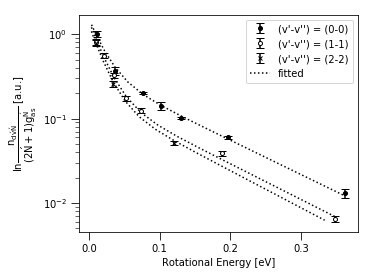

In [ ]:
fig, ax = subplots(facecolor="w")
#text(608, 4.6, "(v'-v'')=(0-0)", fontsize=12)

ax.errorbar(Ed_rot[0,:][ndN.T[0,:]!=0], ndN_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (0-0)")
ax.errorbar(Ed_rot[1,:][ndN.T[1,:]!=0], ndN_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='white',label="(v'-v'') = (1-1)")
ax.errorbar(Ed_rot[2,:][ndN.T[2,:]!=0], ndN_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='x',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (2-2)")

plot(Ed_rot[1,:],fitted_g[1,:]/ndN_g[0,1],':',c='black')
plot(Ed_rot[0,:],fitted_g[0,:]/ndN_g[0,1],':',c='black')
ax.plot(Ed_rot[2,:],fitted_g[2,:]/ndN_g[0,1],':',c='black',label='fitted')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2],handles[3], handles[0]]
labels = [labels[1], labels[2],labels[3], labels[0]]
ax.legend(handles, labels)

#xlim(-0.02,0.52)
#ylim(0.001,1.4)
yscale('log')

#xlabel('Rotational Energy of Excited State [eV]')
xlabel('Rotational Energy [eV]')
ylabel(r'$\mathrm{ln \dfrac{n_{d\acute{v}\acute{N}}}{(2\acute{N}+1)g^{\acute{N}}_{as}} }$ [a.u.]')

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#pylab.savefig('./figure/CCD/allfit_142289', bbox_inches="tight", dpi=300)

In [ ]:
fitted = np.array([nd0*a_opt, nd1*b_opt, nd2*c_opt, nd3*d_opt])
print(fitted)

# prepare boltzmann plot
ndN_g = np.zeros([ndN.shape[1],ndN.shape[0]]) # experimental value
ndNerr_g = np.zeros([ndN.shape[1],ndN.shape[0]]) # error value
fitted_g = np.zeros([ndN.shape[1],ndN.shape[0]]) # two-Boltzmann fit
for vv in range(ndN.shape[1]):
    for NN in range(1,ndN.shape[0]+1,1):
        ndN_g[vv,NN-1] = ndN.T[vv,NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
        ndNerr_g[vv,NN-1] = ndN_err.T[vv,NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))
        fitted_g[vv,NN-1] = fitted[vv,NN-1]/((2*NN+1)*(6-3*np.mod(NN,2)))

[[1.76734192e-07 4.34391226e-07 2.02441095e-07 3.34413910e-07
  1.35968999e-07 2.28399399e-07 9.79535908e-08 1.66510318e-07
  6.87765788e-08 1.09723636e-07 4.22531115e-08 6.29710617e-08
  2.27591166e-08 3.20018751e-08]
 [1.64758771e-07 3.89292315e-07 1.69100050e-07 2.51582518e-07
  9.08289134e-08 1.39049656e-07 5.68008501e-08 9.48181225e-08
  3.89720730e-08 6.21430043e-08 2.39512786e-08 3.57474104e-08
  1.29446699e-08 1.82454466e-08]
 [1.47517096e-07 3.48566378e-07 1.51425867e-07 2.25330340e-07
  8.13685475e-08 1.24588642e-07 5.09042646e-08 8.50072379e-08
  3.49617032e-08 5.57997109e-08 2.15333697e-08 3.21911951e-08
  1.16811650e-08 1.65073478e-08]
 [1.27763993e-07 2.96634973e-07 1.26139961e-07 1.84530172e-07
  6.63375875e-08 1.02085586e-07 4.18028468e-08 6.93901496e-08
  2.81932688e-08 4.43054517e-08 1.68052290e-08 2.46659626e-08
  8.78078155e-09 1.21664435e-08]]


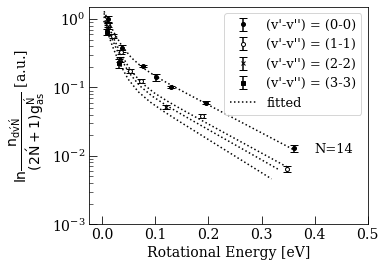

In [ ]:
fig, ax = subplots(facecolor="w")
#text(608, 4.6, "(v'-v'')=(0-0)", fontsize=12)

ax.errorbar(Ed_rot[0,:][ndN.T[0,:]!=0], ndN_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (0-0)")
ax.errorbar(Ed_rot[1,:][ndN.T[1,:]!=0], ndN_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='white',label="(v'-v'') = (1-1)")
ax.errorbar(Ed_rot[2,:][ndN.T[2,:]!=0], ndN_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='x',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (2-2)")
ax.errorbar(Ed_rot[3,:][ndN.T[3,:]!=0], ndN_g[3,:][ndN_g[3,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[3,:][ndN_g[3,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='s',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (3-3)")

plot(Ed_rot[1,:],fitted_g[1,:]/ndN_g[0,1],':',c='black')
plot(Ed_rot[0,:],fitted_g[0,:]/ndN_g[0,1],':',c='black')
plot(Ed_rot[2,:],fitted_g[2,:]/ndN_g[0,1],':',c='black')
ax.plot(Ed_rot[3,:],fitted_g[3,:]/ndN_g[0,1],':',c='black',label='fitted')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2],handles[3], handles[4], handles[0]]
labels = [labels[1], labels[2],labels[3], labels[4], labels[0]]
ax.legend(handles, labels, fontsize=13)

xlim(-0.025,0.5)
ylim(0.001,1.5)
yscale('log')

#text(0.06,0.6, '(b)')
text(0.4, 0.011, 'N=14', fontsize=13)

#xlabel('Rotational Energy of Excited State [eV]')
xlabel('Rotational Energy [eV]')
ylabel(r'$\mathrm{ln \dfrac{n_{d\acute{v}\acute{N}}}{(2\acute{N}+1)g^{\acute{N}}_{as}} }$ [a.u.]')

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

pylab.savefig(r'C:\Users\Ishihara\Dropbox\paper\paper\allfit_150482_new.png', bbox_inches="tight", dpi=300)

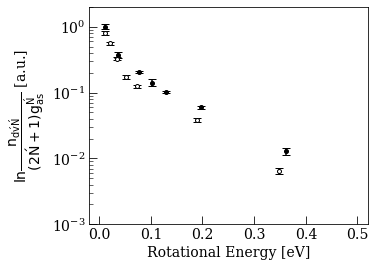

In [ ]:
fig, ax = subplots(facecolor="w")
#text(608, 4.6, "(v'-v'')=(0-0)", fontsize=12)

ax.errorbar(Ed_rot[0,:][ndN.T[0,:]!=0], ndN_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (0-0)")
ax.errorbar(Ed_rot[1,:][ndN.T[1,:]!=0], ndN_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='white',label="(v'-v'') = (1-1)")
#ax.errorbar(Ed_rot[2,:][ndN.T[2,:]!=0], ndN_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='x',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (2-2)")
#ax.errorbar(Ed_rot[3,:][ndN.T[3,:]!=0], ndN_g[3,:][ndN_g[3,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[3,:][ndN_g[3,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='s',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (3-3)")

#plot(Ed_rot[1,:],fitted_g[1,:]/ndN_g[0,1],':',c='black')
#plot(Ed_rot[0,:],fitted_g[0,:]/ndN_g[0,1],':',c='black')
#plot(Ed_rot[2,:],fitted_g[2,:]/ndN_g[0,1],':',c='black')
#ax.plot(Ed_rot[3,:],fitted_g[3,:]/ndN_g[0,1],':',c='black',label='fitted')

#handles,labels = ax.get_legend_handles_labels()
#handles = [handles[1], handles[2],handles[3], handles[4], handles[0]]
#labels = [labels[1], labels[2],labels[3], labels[4], labels[0]]
#ax.legend(handles, labels)

xlim(-0.02,0.52)
ylim(0.001,2)
yscale('log')

#xlabel('Rotational Energy of Excited State [eV]')
xlabel('Rotational Energy [eV]')
ylabel(r'$\mathrm{ln \dfrac{n_{d\acute{v}\acute{N}}}{(2\acute{N}+1)g^{\acute{N}}_{as}} }$ [a.u.]')

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#pylab.savefig('./figure/CCD/allfit_150482_ppt.png', bbox_inches="tight", dpi=300)

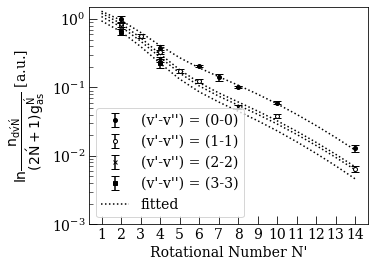

In [ ]:
fig, ax = subplots(facecolor="w")
#text(608, 4.6, "(v'-v'')=(0-0)", fontsize=12)

ax.errorbar(np.arange(1,15,1)[ndN.T[0,:]!=0], ndN_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[0,:][ndN_g[0,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (0-0)")
ax.errorbar(np.arange(1,15,1)[ndN.T[1,:]!=0], ndN_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[1,:][ndN_g[1,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='o',ecolor='black',markeredgecolor="black" ,color='white',label="(v'-v'') = (1-1)")
ax.errorbar(np.arange(1,15,1)[ndN.T[2,:]!=0], ndN_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[2,:][ndN_g[2,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='x',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (2-2)")
ax.errorbar(np.arange(1,15,1)[ndN.T[3,:]!=0], ndN_g[3,:][ndN_g[3,:]!=0]/ndN_g[0,1],yerr=ndNerr_g[3,:][ndN_g[3,:]!=0]/ndN_g[0,1],markersize=4,capsize=4,fmt='s',ecolor='black',markeredgecolor="black" ,color='black',label="(v'-v'') = (3-3)")

plot(np.arange(1,15,1),fitted_g[1,:]/ndN_g[0,1],':',c='black')
plot(np.arange(1,15,1),fitted_g[0,:]/ndN_g[0,1],':',c='black')
plot(np.arange(1,15,1),fitted_g[2,:]/ndN_g[0,1],':',c='black')
ax.plot(np.arange(1,15,1),fitted_g[3,:]/ndN_g[0,1],':',c='black',label='fitted')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2], handles[3], handles[4], handles[0]]
labels = [labels[1], labels[2],labels[3], labels[4], labels[0]]
ax.legend(handles, labels)

xticks(np.arange(1,15,1))
ylim(0.001,1.5)
yscale('log')

#xlabel('Rotational Energy of Excited State [eV]')
xlabel("Rotational Number N'")
ylabel(r'$\mathrm{ln \dfrac{n_{d\acute{v}\acute{N}}}{(2\acute{N}+1)g^{\acute{N}}_{as}} }$ [a.u.]')

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

pylab.savefig('./figure/CMOS/allfit(N)_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
A_sigma = np.array([(2.3387E+7+2.3479E+6+3.9083E+4+6.9282E+1+6.7372E-2+1.9986E-2+2.9027E-4+7.7599E-3),    
                    (2.1551E+6+1.8841E+7+4.4730E+6+1.2747E+5+2.7294E+2+4.3313E-1+3.4305E-2+3.5382E-2),
                    (1.8763E+5+3.8098E+6+1.4795E+7+6.3500E+6+2.4539E+5+6.9366E+2+2.0363E+0+2.0664E-3),
                    (1.7678E+4+5.2206E+5+4.9835E+6+1.1276E+7+7.9698E+6+4.1361E+5+1.3613E+3+6.0937E+0)
                   ])

In [ ]:
v_range = 5
vv_range = 4

def fitfunc(x, T_vib):
    nv = np.zeros(vv_range) 
    for v in range(v_range):
        for vv in range(vv_range): 
            nv[vv] += ccs[v,vv]*fcf[v,vv]*np.exp(-(E_vib[v]-E_vib[0])/(T_vib*k))/A_sigma[vv]
    print(nv)
    return nv[0:4]/sum(nv[0:4])

array_x = np.arange(len(fitv))
para_ini = np.array([10000])
para_opt_v, para_cov_v = sp.optimize.curve_fit(fitfunc, array_x, fitv/sum(fitv), para_ini)
para_err_v = np.sqrt(np.diag(para_cov_v))

print('T_vib =', para_opt_v)
#print('Covariance =', para_cov)
print('Standard error =', para_err_v)

[1.53455129e-08 1.12538629e-08 9.85351908e-09 8.14943612e-09]
[1.53455129e-08 1.12538629e-08 9.85351908e-09 8.14943612e-09]
[1.53455129e-08 1.12538629e-08 9.85351908e-09 8.14943612e-09]
[1.53455131e-08 1.12538630e-08 9.85351914e-09 8.14943615e-09]
[1.48706742e-08 1.10443206e-08 9.70498895e-09 8.06126528e-09]
[1.48706743e-08 1.10443207e-08 9.70498901e-09 8.06126531e-09]
[1.48871397e-08 1.10515962e-08 9.71013676e-09 8.06432539e-09]
[1.48871399e-08 1.10515963e-08 9.71013682e-09 8.06432543e-09]
[1.48871993e-08 1.10516226e-08 9.71015540e-09 8.06433647e-09]
[1.48871995e-08 1.10516226e-08 9.71015546e-09 8.06433650e-09]
[1.48871995e-08 1.10516226e-08 9.71015544e-09 8.06433649e-09]
T_vib = [9634.24925704]
Standard error = [181.83970263]


1.0 0.6395255290655362 0.41628408426027963 0.27570131047042645


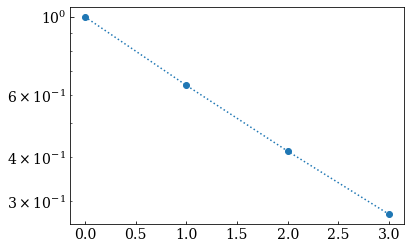

In [ ]:
v_range = 4
nv = np.zeros(v_range)
for v in range(v_range):
    nv[v] = np.exp(-(E_vib[v]-E_vib[0])/(para_opt_v*k))

plot(range(v_range), nv, ':o')

print(nv[0]/nv[0], nv[1]/nv[0], nv[2]/nv[0], nv[3]/nv[0])
yscale('log')

0.3850911869850538
0.2280721065376764
0.1279429800229116
0.07973860536702382
0.057000757926894866
0.03870560011010003
0.02606954448616203
0.019373470990208617
0.01400202128845563
0.01009144449045569
0.007891235928941597
0.006021045866115694


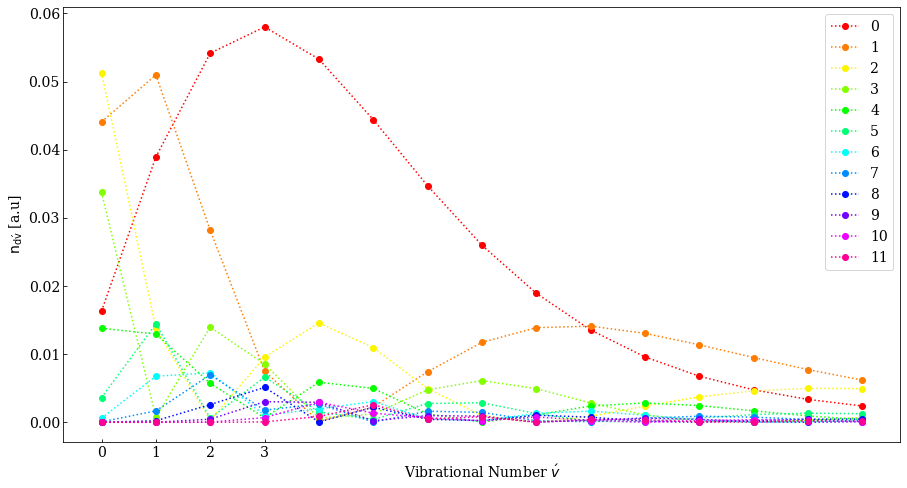

In [ ]:
v_range = 12
vv_range = 15
nvv = np.zeros([v_range,vv_range])
for v in range(v_range):
    for vv in range(vv_range):
        nvv[v,vv] = ccs[v,vv]*fcf[v,vv]*np.exp(-(E_vib[v]-E_vib[0])/(para_opt_v*k))

for v in range(v_range):
    plot(nvv[v,:]/sum(nvv), ':o', color=cm.hsv(v/v_range), label=v)
    print(sum(nvv[v,:]/sum(nvv)))

gcf().set_size_inches([15,8])
xticks(np.arange(0, 4, 1))
xlabel(r'Vibrational Number $\acute{v}$')
ylabel(r'$\mathrm{n_{d \acute{v}}}$ [a.u]')
legend()
#yscale('log')

0.31926257827231513
0.24751555779668122
0.14145215735877426
0.10791449962282382
0.06262699835506919
0.04802380881796929
0.029753198361201168
0.020002156225478074
0.015250343169905652
0.0067087988124058485
0.0013781452394094381
0.00011011911839027009
1.6094579461490388e-06
2.846359369088499e-08
9.280369539929076e-10


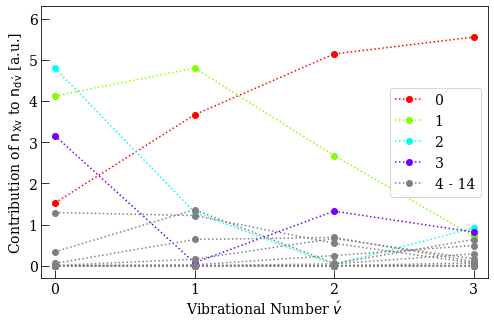

In [ ]:
v_range = 15
vv_range = 4
nvv = np.zeros([v_range,vv_range])
for v in range(v_range):
    for vv in range(vv_range):
        nvv[v,vv] = ccs[v,vv]*fcf[v,vv]*np.exp(-(E_vib[v]-E_vib[0])/(para_opt_v*k))/A_sigma[vv]*1000000000

for v in range(v_range):
    if(v<4):
        plot(nvv[v,:], ':o', color=cm.hsv(v/4), label=v)
        print(sum(nvv[v,:]/sum(nvv)))
    else:
        plot(nvv[v,:], ':o', c='gray')
        print(sum(nvv[v,:]/sum(nvv)))
plot(nvv[14,:], ':o', c='gray', label='4 - 14')

xticks(np.arange(0, 4, 1))
xlim(-0.1,3.1)
ylim(-0.3, 6.3)
xlabel(r'Vibrational Number $\acute{v}$')
ylabel(r'Contribution of $\mathrm{n_{Xv}}$ to $\mathrm{n_{d \acute{v}}}$ [a.u.]')
legend(loc='lower right',borderaxespad=1)
legend()
#yscale('log')

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([8,5])

pylab.savefig('./figure/CMOS/FCfactor_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
# construct X state population from two temperature of d state  
fact = np.array([2.003723532564996, 1.9314332618600913, 1.8591429911551864, 1.7868527204502815])
#fact = np.array([2.004, 2.004, 2.004, 2.004])

v_range = 4
N_range = 15

# make X state population
nX0 = np.zeros([v_range,N_range]) # Boltzmann distribution 
nX1 = np.zeros([v_range,N_range])
# make X state population / statistical weight
nX0_g = np.zeros([v_range,N_range]) # Boltzmann distribution
nX1_g = np.zeros([v_range,N_range])
for v in range(v_range):
    nc0 = 0 # nomalizing constant  
    nc1 = 0
    for N in range(N_range):
        nc0 += (1-pall[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + pall[0]*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k))
        nc1 += (1-pall[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + pall[1]*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k))
    for N in range(N_range):
        nX0[v,N] = ((1-pall[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + pall[0]*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc0
        nX1[v,N] = ((1-pall[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + pall[1]*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc1
    for N in range(N_range):
        nX0_g[v,N] = ((1-pall[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + pall[0]*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc0
        nX1_g[v,N] = ((1-pall[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + pall[1]*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc1

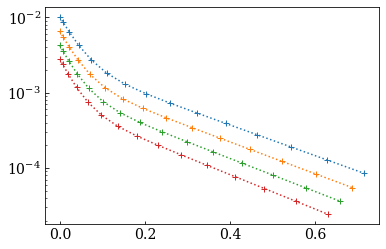

In [ ]:
nall = np.zeros([len(nv),N_range])
nall_g = np.zeros([len(nv),N_range])
for v in range(len(nv)):
    for N in range(N_range):
        nall[v,N] = nv[v]*nX0[v,N] 
        nall_g[v,N] = nv[v]*nX0_g[v,N]

for v in range(v_range):
    #plot(E_rot_cal[v,0:N_range], nall[v,:], 'o:')
    plot(E_rot_cal[v,0:N_range], nall_g[v,:], '+:')

#xlim(0,0.1)
yscale('log')

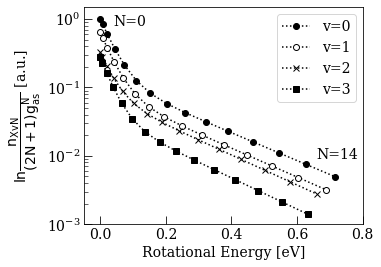

In [ ]:
nall = np.zeros([len(nv),N_range])
nall_g = np.zeros([len(nv),N_range])
for v in range(len(nv)):
    for N in range(N_range):
        if(v==2):
            nall[v,N] = nv[v]*nX0[v,N]
            nall_g[v,N] = nv[v]*nX0_g[v,N]
        else:
            nall[v,N] = nv[v]*nX1[v,N]
            nall_g[v,N] = nv[v]*nX1_g[v,N]

nall = nall/sum(nall)
nall_g = nall_g/sum(nall_g)
#for v in range(v_range):
    #plot(E_rot_cal[v,0:N_range], nall[v,:], 'o:')
    #plot(E_rot_cal[v,0:N_range], nall_g[v,:]/nall_g[0,0], '+:')

plot(E_rot_cal[0,0:N_range], nall_g[0,:]/nall_g[0,0], 'o:', c='black', label='v=0')
plot(E_rot_cal[1,0:N_range], nall_g[1,:]/nall_g[0,0], 'o:', c='black', markerfacecolor='w', label='v=1')
plot(E_rot_cal[2,0:N_range], nall_g[2,:]/nall_g[0,0], 'x:', c='black', label='v=2')
plot(E_rot_cal[3,0:N_range], nall_g[3,:]/nall_g[0,0], 's:', c='black', label='v=3')

xlim(-0.05,0.8)
yscale('log')
ylim(0.001,1.5)

xlabel('Rotational Energy [eV]')
ylabel(r'$\mathrm{ln \dfrac{n_{XvN}}{(2N+1)g^{N}_{as}} }$ [a.u.]')
text(0.04, 0.8, 'N=0', fontsize=14)
text(0.66, 0.009, 'N=14', fontsize=14)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#pylab.savefig('./figure/CMOS/X-state_150482', bbox_inches="tight", dpi=300)

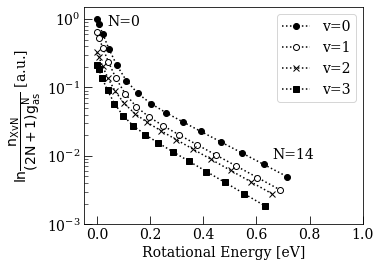

In [ ]:
nall = np.zeros([len(nv),N_range])
nall_g = np.zeros([len(nv),N_range])
for v in range(len(nv)):
    for N in range(N_range):
        if(v==2 or v==3):
            nall[v,N] = nv[v]*nX0[v,N]
            nall_g[v,N] = nv[v]*nX0_g[v,N]
        else:
            nall[v,N] = nv[v]*nX1[v,N]
            nall_g[v,N] = nv[v]*nX1_g[v,N]

nall = nall/sum(nall)
nall_g = nall_g/sum(nall_g)
#for v in range(v_range):
    #plot(E_rot_cal[v,0:N_range], nall[v,:], 'o:')
    #plot(E_rot_cal[v,0:N_range], nall_g[v,:]/nall_g[0,0], '+:')

plot(E_rot_cal[0,0:N_range], nall_g[0,:]/nall_g[0,0], 'o:', c='black', label='v=0')
plot(E_rot_cal[1,0:N_range], nall_g[1,:]/nall_g[0,0], 'o:', c='black', markerfacecolor='w', label='v=1')
plot(E_rot_cal[2,0:N_range], nall_g[2,:]/nall_g[0,0], 'x:', c='black', label='v=2')
plot(E_rot_cal[3,0:N_range], nall_g[3,:]/nall_g[0,0], 's:', c='black', label='v=3')

xlim(-0.05,1)
yscale('log')
ylim(0.001,1.5)

xlabel('Rotational Energy [eV]')
ylabel(r'$\mathrm{ln \dfrac{n_{XvN}}{(2N+1)g^{N}_{as}} }$ [a.u.]')
text(0.04, 0.8, 'N=0', fontsize=14)
text(0.66, 0.009, 'N=14', fontsize=14)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#pylab.savefig('./figure/CMOS/X-state_150482_ppt.png', bbox_inches="tight", dpi=300)

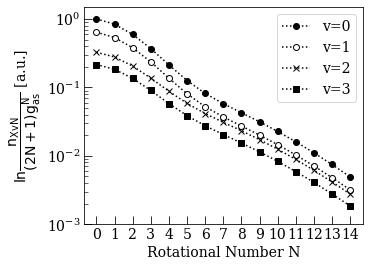

In [ ]:
nall = np.zeros([len(nv),N_range])
nall_g = np.zeros([len(nv),N_range])
for v in range(v_range):
    for N in range(N_range):
        if(v==2 or v==3):
            nall[v,N] = nv[v]*nX0[v,N]
            nall_g[v,N] = nv[v]*nX0_g[v,N]
        else:
            nall[v,N] = nv[v]*nX1[v,N]
            nall_g[v,N] = nv[v]*nX1_g[v,N]

nall = nall/sum(nall)
nall_g = nall_g/sum(nall_g)
#for v in range(v_range):
    #plot(E_rot_cal[v,0:N_range], nall[v,:], 'o:')
    #plot(E_rot_cal[v,0:N_range], nall_g[v,:]/nall_g[0,0], '+:')

plot(np.arange(0,15,1), nall_g[0,:]/nall_g[0,0], 'o:', c='black', label='v=0')
plot(np.arange(0,15,1), nall_g[1,:]/nall_g[0,0], 'o:', c='black', markerfacecolor='w', label='v=1')
plot(np.arange(0,15,1), nall_g[2,:]/nall_g[0,0], 'x:', c='black', label='v=2')
plot(np.arange(0,15,1), nall_g[3,:]/nall_g[0,0], 's:', c='black', label='v=3')

#xlim(-0.05,0.8)
xticks(np.arange(0,15,1))
yscale('log')
ylim(0.001,1.5)

xlabel('Rotational Number N')
ylabel(r'$\mathrm{ln \dfrac{n_{XvN}}{(2N+1)g^{N}_{as}} }$ [a.u.]')
#text(0.04, 0.8, 'N=0', fontsize=14)
#text(0.66, 0.011, 'N=14', fontsize=14)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#pylab.savefig('./figure/CMOS/X-state(N)_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
R_mat = np.zeros( [ndN.shape[1], ndN.shape[0], v_range, N_range] ) 
for vv in range(ndN.shape[1]):
    for NN in range(ndN.shape[0]):
        for v in range(v_range):
            for N in range(N_range):
                R_mat[vv,NN,v,N] = rtp_check[N,NN]*fcf[v,vv]*ccs[v,vv]
                #if(R_mat[vv,NN,v,N]<1e-2): # remove too small transition plobabilities

R_mat = R_mat.reshape(ndN.shape[1]*ndN.shape[0], v_range*N_range)
R_mat.shape

(56, 60)

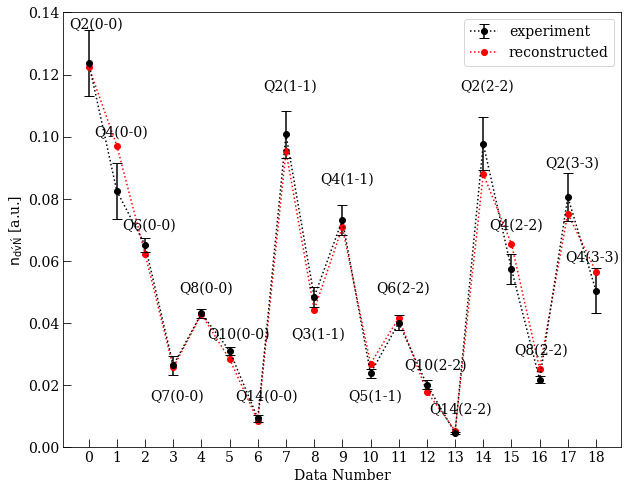

In [ ]:
fig, ax = subplots(facecolor="w")
ax.plot(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), (R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]) ,'o:', c='r', label='reconstructed')
ax.errorbar(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), ((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]),capsize=5,fmt='o:',ecolor='black',markeredgecolor="black",color='black',label='experiment')
#ax.errorbar(range(len(((inte*wl.T/A.T).T)[inte.T!=0])), ((inte*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]),capsize=5,fmt='o:',ecolor='black',markeredgecolor="black",color='black',label='experiment')

#ax.plot(range(len(((inte*wl.T/A.T).T)[inte.T!=0])), (R_mat @ nall.flatten())[((inte*wl.T/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T/A.T).T).flatten() != 0]) ,'o', c='r', label='reconstructed')
#ax.errorbar(range(len(((inte*wl.T/A.T).T)[inte.T!=0])), ((inte*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]),capsize=5,fmt='o',ecolor='black',markeredgecolor="black",color='black',label='experiment')

text(-0.7, 0.135, 'Q2(0-0)')
text(0.2, 0.10, 'Q4(0-0)')
text(1.2, 0.07, 'Q6(0-0)')
text(2.2, 0.015, 'Q7(0-0)')
text(3.2, 0.05, 'Q8(0-0)')
text(4.2, 0.035, 'Q10(0-0)')
text(5.2, 0.015, 'Q14(0-0)')

text(6.2, 0.115, 'Q2(1-1)')
text(7.2, 0.035, 'Q3(1-1)')
text(8.2, 0.085, 'Q4(1-1)')
text(9.2, 0.015, 'Q5(1-1)')
text(10.2, 0.05, 'Q6(2-2)')
text(11.2, 0.025, 'Q10(2-2)')
text(12.1, 0.011, 'Q14(2-2)')

text(13.2, 0.115, 'Q2(2-2)')
text(14.2, 0.07, 'Q4(2-2)')
text(15.1, 0.03, 'Q8(2-2)')

text(16.2, 0.09, 'Q2(3-3)')
text(16.9, 0.06, 'Q4(3-3)')

#ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}} / \Sigma_{\acute{v},\acute{N}} n_{d\acute{v}\acute{N}}}}$ [a.u.]')
ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}}}$ [a.u.]')
xlabel('Data Number')
xticks(np.arange(0, 19, 1))
ylim(0,0.14)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
ax.legend(handles, labels)

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([10,8])

#plot_as_emf(fig, filename="./figure/ndvJ_check.emf", bbox_inches="tight")
#pylab.savefig('./figure/CMOS/D2_ndvNcheck_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
pall

array([2.37941057e-01, 1.41663140e-01, 2.09948584e+02, 1.23613171e+03])

In [ ]:
v=0
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[3] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[3] )

420.6789182413817
2476.8661947240585
29.65884950947767
85.7051227672231


In [ ]:
v=1
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[3] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[3] )

405.5016782752541
2387.505898851693
28.588818527163685
82.61305620966338


In [ ]:
v=2
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[3] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[3] )

390.3244383091263
2298.145602979327
27.518787544849694
79.52098965210364


In [ ]:
v=3
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pall[3] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[2] )
print( ((Be-ae*(v+0.5))/(Be-ae*(0+0.5)))*((Be-ae*(0+0.5))/(Be_d-ae_d*(0+0.5)))*pallerr[3] )

375.1471983429987
2208.7853071069617
26.448756562535706
76.42892309454392


In [ ]:
# construct X state population from two temperature of d state  
fact = np.array([2.003723532564996, 1.9314332618600913, 1.8591429911551864, 1.7868527204502815])
#fact = np.array([2.004, 2.004, 2.004, 2.004])

v_range = 4
N_range = 15

# make X state population and evaluate parametor_error 
nX00 = np.zeros([v_range,N_range]) # Boltzmann distribution 
nX01 = np.zeros([v_range,N_range]) 
nX02 = np.zeros([v_range,N_range]) 
nX03 = np.zeros([v_range,N_range]) 
nX04 = np.zeros([v_range,N_range])
nX05 = np.zeros([v_range,N_range]) 
nX06 = np.zeros([v_range,N_range]) 
nX07 = np.zeros([v_range,N_range]) 

nX10 = np.zeros([v_range,N_range])
nX11 = np.zeros([v_range,N_range])
nX12 = np.zeros([v_range,N_range])
nX13 = np.zeros([v_range,N_range])
nX14 = np.zeros([v_range,N_range])
nX15 = np.zeros([v_range,N_range])
nX16 = np.zeros([v_range,N_range])
nX17 = np.zeros([v_range,N_range])

# make X state population / statistical weight
nX0_g0 = np.zeros([v_range,N_range]) # Boltzmann distribution
nX0_g1 = np.zeros([v_range,N_range]) 
nX0_g2 = np.zeros([v_range,N_range]) 
nX0_g3 = np.zeros([v_range,N_range]) 
nX0_g4 = np.zeros([v_range,N_range])
nX0_g5 = np.zeros([v_range,N_range]) 
nX0_g6 = np.zeros([v_range,N_range]) 
nX0_g7 = np.zeros([v_range,N_range])

nX1_g0 = np.zeros([v_range,N_range])
nX1_g1 = np.zeros([v_range,N_range])
nX1_g2 = np.zeros([v_range,N_range])
nX1_g3 = np.zeros([v_range,N_range])
nX1_g4 = np.zeros([v_range,N_range])
nX1_g5 = np.zeros([v_range,N_range])
nX1_g6 = np.zeros([v_range,N_range])
nX1_g7 = np.zeros([v_range,N_range])

for v in range(v_range):
    nc00 = 0 # nomalizing constant  
    nc01 = 0
    nc02 = 0
    nc03 = 0
    nc04 = 0   
    nc05 = 0
    nc06 = 0
    nc07 = 0
    
    nc10 = 0
    nc11 = 0
    nc12 = 0
    nc13 = 0
    nc14 = 0
    nc15 = 0
    nc16 = 0
    nc17 = 0
    
    for N in range(N_range):
        nc00 += (1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc01 += (1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
        nc02 += (1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc03 += (1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
        nc04 += (1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc05 += (1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
        nc06 += (1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc07 += (1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
         
        nc10 += (1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc11 += (1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
        nc12 += (1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc13 += (1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
        nc14 += (1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc15 += (1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
        nc16 += (1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k))
        nc17 += (1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k))
  
    for N in range(N_range):
        nX00[v,N] = ((1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc00
        nX01[v,N] = ((1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc01
        nX02[v,N] = ((1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc02
        nX03[v,N] = ((1-(pall[0]+pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]+pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc03
        nX04[v,N] = ((1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc04
        nX05[v,N] = ((1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc05
        nX06[v,N] = ((1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc06
        nX07[v,N] = ((1-(pall[0]-pallerr[0]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[0]-pallerr[0])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc07
        
        nX10[v,N] = ((1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc10
        nX11[v,N] = ((1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc11
        nX12[v,N] = ((1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc12
        nX13[v,N] = ((1-(pall[1]+pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]+pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc13
        nX14[v,N] = ((1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc14
        nX15[v,N] = ((1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]+pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc15
        nX16[v,N] = ((1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]+pallerr[3])*k)))/nc16
        nX17[v,N] = ((1-(pall[1]-pallerr[1]))*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[2]-pallerr[2])*k)) + (pall[1]-pallerr[1])*(2*N+1)*(6-3*np.mod(N,2))*np.exp(-E_rot_cal[v,N]/(fact[v]*(pall[3]-pallerr[3])*k)))/nc17        
        
    for N in range(N_range):
        nX0_g0[v,N] = ((1-(pall[0]+pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]+pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc00
        nX0_g1[v,N] = ((1-(pall[0]+pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]+pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc01
        nX0_g2[v,N] = ((1-(pall[0]+pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]+pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc02
        nX0_g3[v,N] = ((1-(pall[0]+pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]+pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc03
        nX0_g4[v,N] = ((1-(pall[0]-pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]-pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc04
        nX0_g5[v,N] = ((1-(pall[0]-pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]-pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc05
        nX0_g6[v,N] = ((1-(pall[0]-pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]-pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc06
        nX0_g7[v,N] = ((1-(pall[0]-pallerr[0]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[0]-pallerr[0])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc07
       
        nX1_g0[v,N] = ((1-(pall[1]+pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]+pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc10
        nX1_g1[v,N] = ((1-(pall[1]+pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]+pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc11
        nX1_g2[v,N] = ((1-(pall[1]+pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]+pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc12
        nX1_g3[v,N] = ((1-(pall[1]+pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]+pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc13
        nX1_g4[v,N] = ((1-(pall[1]-pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]-pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc14
        nX1_g5[v,N] = ((1-(pall[1]-pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]-pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc15
        nX1_g6[v,N] = ((1-(pall[1]-pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]-pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc16
        nX1_g7[v,N] = ((1-(pall[1]-pallerr[1]))*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[2]*k)) + (pall[1]-pallerr[1])*np.exp(-E_rot_cal[v,N]/(fact[v]*pall[3]*k)))/nc17
    

1.0 0.6395255290655362 0.41628408426027963


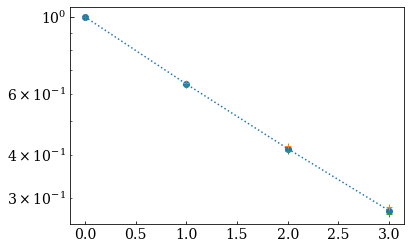

In [ ]:
nv = np.zeros(v_range)
nv_p = np.zeros(v_range)
nv_m = np.zeros(v_range)

for v in range(v_range):
    nv[v] = np.exp(-(E_vib[v]-E_vib[0])/(para_opt_v*k))
    nv_p[v] = np.exp(-(E_vib[v]-E_vib[0])/((para_opt_v+para_err_v)*k))
    nv_m[v] = np.exp(-(E_vib[v]-E_vib[0])/((para_opt_v-para_err_v)*k))
    
plot(range(v_range), nv , ':o')
plot(range(v_range), nv_p , '+')
plot(range(v_range), nv_m , '+')

print(nv[0]/nv[0], nv[1]/nv[0], nv[2]/nv[0])
yscale('log')

In [ ]:
nall0 = np.zeros([len(nv),N_range])
nall1 = np.zeros([len(nv),N_range])
nall2 = np.zeros([len(nv),N_range])
nall3 = np.zeros([len(nv),N_range])
nall4 = np.zeros([len(nv),N_range])
nall5 = np.zeros([len(nv),N_range])
nall6 = np.zeros([len(nv),N_range])
nall7 = np.zeros([len(nv),N_range])
nall8 = np.zeros([len(nv),N_range])
nall9 = np.zeros([len(nv),N_range])
nall10 = np.zeros([len(nv),N_range])
nall11 = np.zeros([len(nv),N_range])
nall12 = np.zeros([len(nv),N_range])
nall13 = np.zeros([len(nv),N_range])
nall14 = np.zeros([len(nv),N_range])
nall15 = np.zeros([len(nv),N_range])

nall_g0 = np.zeros([len(nv),N_range])
nall_g1 = np.zeros([len(nv),N_range])
nall_g2 = np.zeros([len(nv),N_range])
nall_g3 = np.zeros([len(nv),N_range])
nall_g4 = np.zeros([len(nv),N_range])
nall_g5 = np.zeros([len(nv),N_range])
nall_g6 = np.zeros([len(nv),N_range])
nall_g7 = np.zeros([len(nv),N_range])
nall_g8 = np.zeros([len(nv),N_range])
nall_g9 = np.zeros([len(nv),N_range])
nall_g10 = np.zeros([len(nv),N_range])
nall_g11 = np.zeros([len(nv),N_range])
nall_g12 = np.zeros([len(nv),N_range])
nall_g13 = np.zeros([len(nv),N_range])
nall_g14 = np.zeros([len(nv),N_range])
nall_g15 = np.zeros([len(nv),N_range])

for v in range(len(nv)):
    for N in range(N_range):
        if(v==2 or v==3):
            nall0[v,N] = nv_p[v]*nX00[v,N]
            nall1[v,N] = nv_p[v]*nX01[v,N]
            nall2[v,N] = nv_p[v]*nX02[v,N]            
            nall3[v,N] = nv_p[v]*nX03[v,N]
            nall4[v,N] = nv_p[v]*nX04[v,N]            
            nall5[v,N] = nv_p[v]*nX05[v,N]            
            nall6[v,N] = nv_p[v]*nX06[v,N]            
            nall7[v,N] = nv_p[v]*nX07[v,N]            
            nall8[v,N] = nv_m[v]*nX00[v,N]
            nall9[v,N] = nv_m[v]*nX01[v,N]
            nall10[v,N] = nv_m[v]*nX02[v,N]            
            nall11[v,N] = nv_m[v]*nX03[v,N]
            nall12[v,N] = nv_m[v]*nX04[v,N]            
            nall13[v,N] = nv_m[v]*nX05[v,N]            
            nall14[v,N] = nv_m[v]*nX06[v,N]            
            nall15[v,N] = nv_m[v]*nX07[v,N] 
            
            nall_g0[v,N] = nv_p[v]*nX0_g0[v,N]
            nall_g1[v,N] = nv_p[v]*nX0_g1[v,N]
            nall_g2[v,N] = nv_p[v]*nX0_g2[v,N]
            nall_g3[v,N] = nv_p[v]*nX0_g3[v,N]            
            nall_g4[v,N] = nv_p[v]*nX0_g4[v,N]            
            nall_g5[v,N] = nv_p[v]*nX0_g5[v,N]            
            nall_g6[v,N] = nv_p[v]*nX0_g6[v,N]            
            nall_g7[v,N] = nv_p[v]*nX0_g7[v,N]            
            nall_g8[v,N] = nv_m[v]*nX0_g0[v,N]
            nall_g9[v,N] = nv_m[v]*nX0_g1[v,N]
            nall_g10[v,N] = nv_m[v]*nX0_g2[v,N]            
            nall_g11[v,N] = nv_m[v]*nX0_g3[v,N]
            nall_g12[v,N] = nv_m[v]*nX0_g4[v,N]            
            nall_g13[v,N] = nv_m[v]*nX0_g5[v,N]            
            nall_g14[v,N] = nv_m[v]*nX0_g6[v,N]            
            nall_g15[v,N] = nv_m[v]*nX0_g7[v,N] 
            
        else:          
            nall0[v,N] = nv_p[v]*nX10[v,N]
            nall1[v,N] = nv_p[v]*nX11[v,N]
            nall2[v,N] = nv_p[v]*nX12[v,N]            
            nall3[v,N] = nv_p[v]*nX13[v,N]
            nall4[v,N] = nv_p[v]*nX14[v,N]            
            nall5[v,N] = nv_p[v]*nX15[v,N]            
            nall6[v,N] = nv_p[v]*nX16[v,N]            
            nall7[v,N] = nv_p[v]*nX17[v,N]            
            nall8[v,N] = nv_m[v]*nX10[v,N]
            nall9[v,N] = nv_m[v]*nX11[v,N]
            nall10[v,N] = nv_m[v]*nX12[v,N]            
            nall11[v,N] = nv_m[v]*nX13[v,N]
            nall12[v,N] = nv_m[v]*nX14[v,N]            
            nall13[v,N] = nv_m[v]*nX15[v,N]            
            nall14[v,N] = nv_m[v]*nX16[v,N]            
            nall15[v,N] = nv_m[v]*nX17[v,N] 
            
            nall_g0[v,N] = nv_p[v]*nX1_g0[v,N]
            nall_g1[v,N] = nv_p[v]*nX1_g1[v,N]
            nall_g2[v,N] = nv_p[v]*nX1_g2[v,N]
            nall_g3[v,N] = nv_p[v]*nX1_g3[v,N]            
            nall_g4[v,N] = nv_p[v]*nX1_g4[v,N]            
            nall_g5[v,N] = nv_p[v]*nX1_g5[v,N]            
            nall_g6[v,N] = nv_p[v]*nX1_g6[v,N]            
            nall_g7[v,N] = nv_p[v]*nX1_g7[v,N]            
            nall_g8[v,N] = nv_m[v]*nX1_g0[v,N]
            nall_g9[v,N] = nv_m[v]*nX1_g1[v,N]
            nall_g10[v,N] = nv_m[v]*nX1_g2[v,N]            
            nall_g11[v,N] = nv_m[v]*nX1_g3[v,N]
            nall_g12[v,N] = nv_m[v]*nX1_g4[v,N]            
            nall_g13[v,N] = nv_m[v]*nX1_g5[v,N]            
            nall_g14[v,N] = nv_m[v]*nX1_g6[v,N]            
            nall_g15[v,N] = nv_m[v]*nX1_g7[v,N] 
 
nall0 = nall0/sum(nall0)
nall1 = nall1/sum(nall1)
nall2 = nall2/sum(nall2)
nall3 = nall3/sum(nall3)
nall4 = nall4/sum(nall4)
nall5 = nall5/sum(nall5)
nall6 = nall6/sum(nall6)
nall7 = nall7/sum(nall7)
nall8 = nall8/sum(nall8)
nall9 = nall9/sum(nall9)
nall10 = nall10/sum(nall10)
nall11 = nall11/sum(nall11)
nall12 = nall12/sum(nall12)
nall13 = nall13/sum(nall13)
nall14 = nall14/sum(nall14)
nall15 = nall15/sum(nall15)

nall_g0 = nall_g0/sum(nall_g0)
nall_g1 = nall_g1/sum(nall_g1)
nall_g2 = nall_g2/sum(nall_g2)
nall_g3 = nall_g3/sum(nall_g3)
nall_g4 = nall_g4/sum(nall_g4)
nall_g5 = nall_g5/sum(nall_g5)
nall_g6 = nall_g6/sum(nall_g6)
nall_g7 = nall_g7/sum(nall_g7)
nall_g8 = nall_g8/sum(nall_g8)
nall_g9 = nall_g9/sum(nall_g9)
nall_g10 = nall_g10/sum(nall_g10)
nall_g11 = nall_g11/sum(nall_g11)
nall_g12 = nall_g12/sum(nall_g12)
nall_g13 = nall_g13/sum(nall_g13)
nall_g14 = nall_g14/sum(nall_g14)
nall_g15 = nall_g15/sum(nall_g15)

# make error-bar
nall_max = np.zeros([len(nv),N_range])
nall_min = np.zeros([len(nv),N_range])
nall_g_max = np.zeros([len(nv),N_range])
nall_g_min = np.zeros([len(nv),N_range])
for v in range(len(nv)):
    for N in range(N_range):
        nall_max[v,N] = np.max(np.array([nall0[v,N], nall1[v,N], nall2[v,N], nall3[v,N], nall4[v,N], nall5[v,N], nall6[v,N], nall7[v,N], nall8[v,N], nall9[v,N], nall10[v,N], nall11[v,N], nall12[v,N], nall13[v,N], nall14[v,N], nall15[v,N]]))
        nall_min[v,N] = np.min(np.array([nall0[v,N], nall1[v,N], nall2[v,N], nall3[v,N], nall4[v,N], nall5[v,N], nall6[v,N], nall7[v,N], nall8[v,N], nall9[v,N], nall10[v,N], nall11[v,N], nall12[v,N], nall13[v,N], nall14[v,N], nall15[v,N]]))
        nall_g_max[v,N] = np.max(np.array([nall_g0[v,N], nall_g1[v,N], nall_g2[v,N], nall_g3[v,N], nall_g4[v,N], nall_g5[v,N], nall_g6[v,N], nall_g7[v,N], nall_g8[v,N], nall_g9[v,N], nall_g10[v,N], nall_g11[v,N], nall_g12[v,N], nall_g13[v,N], nall_g14[v,N], nall_g15[v,N]]))
        nall_g_min[v,N] = np.min(np.array([nall_g0[v,N], nall_g1[v,N], nall_g2[v,N], nall_g3[v,N], nall_g4[v,N], nall_g5[v,N], nall_g6[v,N], nall_g7[v,N], nall_g8[v,N], nall_g9[v,N], nall_g10[v,N], nall_g11[v,N], nall_g12[v,N], nall_g13[v,N], nall_g14[v,N], nall_g15[v,N]]))

nall_plus = nall_max - nall
nall_minus = nall - nall_min
nall_g_plus = nall_g_max - nall_g
nall_g_minus = nall_g - nall_g_min

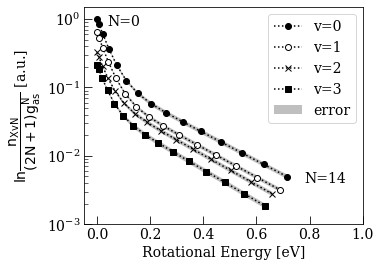

In [ ]:
plot(E_rot_cal[0,0:N_range], nall_g[0,:]/nall_g[0,0], 'o:', c='black', label='v=0')
fill_between(E_rot_cal[0,0:N_range], nall_g_max[0,:]/nall_g[0,0], nall_g_min[0,:]/nall_g[0,0], facecolor='gray', alpha=0.5, label='error')
plot(E_rot_cal[1,0:N_range], nall_g[1,:]/nall_g[0,0], 'o:', c='black', markerfacecolor='w', label='v=1')
fill_between(E_rot_cal[1,0:N_range], nall_g_max[1,:]/nall_g[0,0], nall_g_min[1,:]/nall_g[0,0], facecolor='gray', alpha=0.5)
plot(E_rot_cal[2,0:N_range], nall_g[2,:]/nall_g[0,0], 'x:', c='black', label='v=2')
fill_between(E_rot_cal[2,0:N_range], nall_g_max[2,:]/nall_g[0,0], nall_g_min[2,:]/nall_g[0,0], facecolor='gray', alpha=0.5)
plot(E_rot_cal[3,0:N_range], nall_g[3,:]/nall_g[0,0], 's:', c='black', label='v=3')
fill_between(E_rot_cal[3,0:N_range], nall_g_max[3,:]/nall_g[0,0], nall_g_min[3,:]/nall_g[0,0], facecolor='gray', alpha=0.5)


#xlim(-0.05,1)
xlim(-0.05,1)
yscale('log')
ylim(0.001,1.5)

xlabel('Rotational Energy [eV]')
ylabel(r'$\mathrm{ln \dfrac{n_{XvN}}{(2N+1)g^{N}_{as}} }$ [a.u.]')
text(0.04, 0.8, 'N=0', fontsize=14)
#text(0.66, 0.009, 'N=14', fontsize=14)
text(0.78, 0.004, 'N=14', fontsize=14)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#pylab.savefig('./figure/CMOS/X-state_err_150482.pdf', bbox_inches="tight", dpi=300)
#pylab.savefig(r'C:\Users\Ishihara\Dropbox\paper\paper\X-state_err_150482.png', bbox_inches="tight", dpi=300)

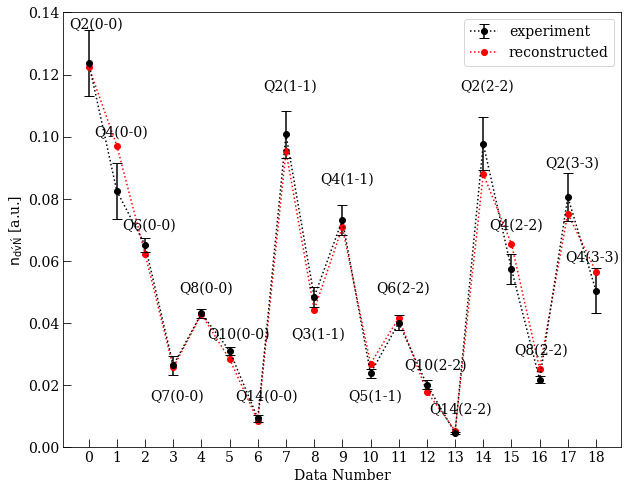

In [ ]:
fig, ax = subplots(facecolor="w")
ax.plot(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), (R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]) ,'o:', c='r', label='reconstructed')
ax.errorbar(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), ((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]),capsize=5,fmt='o:',ecolor='black',markeredgecolor="black",color='black',label='experiment')
#ax.errorbar(range(len(((inte*wl.T/A.T).T)[inte.T!=0])), ((inte*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]),capsize=5,fmt='o:',ecolor='black',markeredgecolor="black",color='black',label='experiment')

#ax.plot(range(len(((inte*wl.T/A.T).T)[inte.T!=0])), (R_mat @ nall.flatten())[((inte*wl.T/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T/A.T).T).flatten() != 0]) ,'o', c='r', label='reconstructed')
#ax.errorbar(range(len(((inte*wl.T/A.T).T)[inte.T!=0])), ((inte*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T/A.T).T)[inte.T!=0]/sum(((inte*wl.T/A.T).T)[inte.T!=0]),capsize=5,fmt='o',ecolor='black',markeredgecolor="black",color='black',label='experiment')

text(-0.7, 0.135, 'Q2(0-0)')
text(0.2, 0.10, 'Q4(0-0)')
text(1.2, 0.07, 'Q6(0-0)')
text(2.2, 0.015, 'Q7(0-0)')
text(3.2, 0.05, 'Q8(0-0)')
text(4.2, 0.035, 'Q10(0-0)')
text(5.2, 0.015, 'Q14(0-0)')

text(6.2, 0.115, 'Q2(1-1)')
text(7.2, 0.035, 'Q3(1-1)')
text(8.2, 0.085, 'Q4(1-1)')
text(9.2, 0.015, 'Q5(1-1)')
text(10.2, 0.05, 'Q6(2-2)')
text(11.2, 0.025, 'Q10(2-2)')
text(12.1, 0.011, 'Q14(2-2)')

text(13.2, 0.115, 'Q2(2-2)')
text(14.2, 0.07, 'Q4(2-2)')
text(15.1, 0.03, 'Q8(2-2)')

text(16.2, 0.09, 'Q2(3-3)')
text(16.9, 0.06, 'Q4(3-3)')

#ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}} / \Sigma_{\acute{v},\acute{N}} n_{d\acute{v}\acute{N}}}}$ [a.u.]')
ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}}}$ [a.u.]')
xlabel('Data Number')
xticks(np.arange(0, 19, 1))
ylim(0,0.14)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
ax.legend(handles, labels)

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([10,8])

#plot_as_emf(fig, filename="./figure/ndvJ_check.emf", bbox_inches="tight")
#pylab.savefig('./figure/CMOS/D2_ndvNcheck_150482.pdf', bbox_inches="tight", dpi=300)
pylab.savefig(r'C:\Users\Ishihara\Dropbox\paper\paper\ndvNcheck_150482.png', bbox_inches="tight", dpi=300)

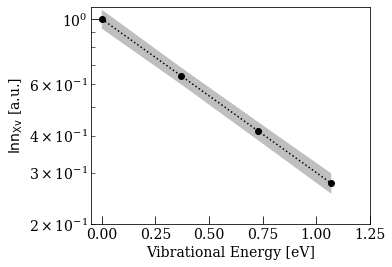

In [ ]:
mean = np.array([sum(nall[0,:])/sum(nall[0,:]), sum(nall[1,:])/sum(nall[0,:]), sum(nall[2,:])/sum(nall[0,:]), sum(nall[3,:])/sum(nall[0,:])])
maxi = np.array([sum(nall_max[0,:])/sum(nall[0,:]), sum(nall_max[1,:])/sum(nall[0,:]), sum(nall_max[2,:])/sum(nall[0,:]), sum(nall_max[3,:])/sum(nall[0,:])])
mini = np.array([sum(nall_min[0,:])/sum(nall[0,:]), sum(nall_min[1,:])/sum(nall[0,:]), sum(nall_min[2,:])/sum(nall[0,:]), sum(nall_min[3,:])/sum(nall[0,:])])
    
plot(np.array([E_vib[0]-E_vib[0], E_vib[1]-E_vib[0], E_vib[2]-E_vib[0], E_vib[3]-E_vib[0]]), mean, 'o:', c='black')
#errorbar(np.array([E_vib[0]-E_vib[0], E_vib[1]-E_vib[0], E_vib[2]-E_vib[0]]), mean, yerr=(maxi, mini), markersize=4, capsize=4, fmt='o', ecolor='black', markeredgecolor = "black", color='w')
fill_between(np.array([E_vib[0]-E_vib[0], E_vib[1]-E_vib[0], E_vib[2]-E_vib[0], E_vib[3]-E_vib[0]]), maxi, mini, facecolor='gray', alpha=0.5)

xlabel('Vibrational Energy [eV]')
ylabel(r'$\mathrm{ln n_{Xv}}$ [a.u.]')
xlim(-0.05, 1.25)
ylim(0.2, 1.1)
#text(0.04, 0.8, 'N=0', fontsize=14)
#text(0.81, 0.006, 'N=11', fontsize=14)
#legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([5,4])

#plot(np.array([E_vib[0]-E_vib[0], E_vib[1]-E_vib[0], E_vib[2]-E_vib[0]]), np.poly1d(np.polyfit(np.array([E_vib[0]-E_vib[0], E_vib[1]-E_vib[0], E_vib[2]-E_vib[0]]), np.array([sum(nall_g[0,:])/sum(nall_g[0,:]), sum(nall_g[1,:])/sum(nall_g[0,:]), sum(nall_g[2,:])/sum(nall_g[0,:])]), 1))(np.array([E_vib[0]-E_vib[0], E_vib[1]-E_vib[0], E_vib[2]-E_vib[0]])), ':', c='black')

yscale('log')

#pylab.savefig('./figure/CMOS/Boltzcheck_150482.pdf', bbox_inches="tight", dpi=300)

In [ ]:
R_mat = np.zeros( [len(Nda[0,:]), len(Nda[:,0]), v_range, N_range] ) 
for vv in range(len(Nda[0,:])):
    for NN in range(len(Nda[:,0])):
        for v in range(v_range):
            for N in range(N_range):
                R_mat[vv,NN,v,N] = rtp_check[N,NN]*fcf[v,vv]*ccs[v,vv]
                #if(R_mat[vv,NN,v,N]<1e-2): # remove too small transition plobabilities
R_mat = R_mat.reshape(len(Nda[0,:])*len(Nda[:,0]), v_range*N_range)
R_mat.shape

(56, 60)

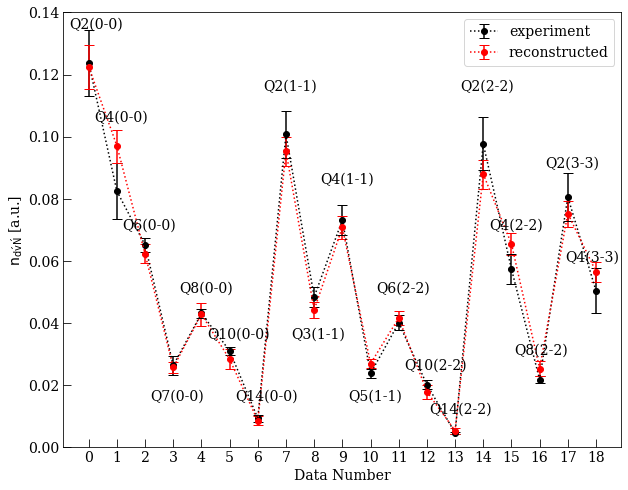

In [ ]:
errorbar(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), ((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]), yerr=((inte_error*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]),capsize=5,fmt='o:',ecolor='black',markeredgecolor="black",color='black',label='experiment')
errorbar(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), (R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]), yerr=((R_mat @ nall_plus.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]), (R_mat @ nall_minus.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]/sum((R_mat @ nall.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0])) ,capsize=5,fmt='o:',ecolor='r',markeredgecolor="r",color='r', label='reconstructed')

text(-0.7, 0.135, 'Q2(0-0)')
text(0.2, 0.105, 'Q4(0-0)')
text(1.2, 0.07, 'Q6(0-0)')
text(2.2, 0.015, 'Q7(0-0)')
text(3.2, 0.05, 'Q8(0-0)')
text(4.2, 0.035, 'Q10(0-0)')
text(5.2, 0.015, 'Q14(0-0)')

text(6.2, 0.115, 'Q2(1-1)')
text(7.2, 0.035, 'Q3(1-1)')
text(8.2, 0.085, 'Q4(1-1)')
text(9.2, 0.015, 'Q5(1-1)')
text(10.2, 0.05, 'Q6(2-2)')
text(11.2, 0.025, 'Q10(2-2)')
text(12.1, 0.011, 'Q14(2-2)')

text(13.2, 0.115, 'Q2(2-2)')
text(14.2, 0.07, 'Q4(2-2)')
text(15.1, 0.03, 'Q8(2-2)')

text(16.2, 0.09, 'Q2(3-3)')
text(16.9, 0.06, 'Q4(3-3)')

#ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}} / \Sigma_{\acute{v},\acute{N}} n_{d\acute{v}\acute{N}}}}$ [a.u.]')
ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}}}$ [a.u.]')
xlabel('Data Number')
xticks(np.arange(0, 19, 1))
ylim(0,0.14)

#handles,labels = ax.get_legend_handles_labels()
#handles = [handles[1], handles[0]]
#labels = [labels[1], labels[0]]
#ax.legend(handles, labels)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([10,8])

#plot_as_emf(fig, filename="./figure/ndvJ_check.emf", bbox_inches="tight")
#pylab.savefig('./figure/CMOS/ndvNcheck_err_150482.pdf', bbox_inches="tight", dpi=300)
pylab.savefig(r'C:\Users\Ishihara\Dropbox\paper\paper\ndvNcheck_150482.png', bbox_inches="tight", dpi=300)

In [ ]:
nall_plus

array([[-0.01966435,  0.06027206, -0.06007231,  0.05990812, -0.0385725 ,
         0.03239821, -0.02140664,  0.02087317, -0.01415413,  0.01534994,
        -0.00913285,  0.00988103, -0.00520071,  0.00562785, -0.00263412],
       [-0.0126352 ,  0.03799683, -0.03858543,  0.03776668, -0.02478561,
         0.02043231, -0.01376104,  0.01316812, -0.00910912,  0.00969772,
        -0.00588892,  0.00625752, -0.00336476,  0.00357795, -0.00171337],
       [-0.00638589,  0.02017543, -0.02055874,  0.0224351 , -0.01592594,
         0.01469693, -0.01099825,  0.01089874, -0.00782579,  0.00810719,
        -0.00511879,  0.00524655, -0.00293755,  0.00301307, -0.00150489],
       [-0.00420118,  0.01352122, -0.01353024,  0.01504078, -0.01048477,
         0.00985734, -0.0072449 ,  0.00731085, -0.00515785,  0.00544394,
        -0.00337964,  0.00353133, -0.00194607,  0.00203635, -0.00100255]])

In [ ]:
v_range = 10
N_range = 15
R_mat = np.zeros( [ndN.shape[1], ndN.shape[0], v_range, N_range] ) 
for vv in range(ndN.shape[1]):
    for NN in range(ndN.shape[0]):
        for v in range(v_range):
            for N in range(N_range):
                R_mat[vv,NN,v,N] = rtp_check[N,NN]*fcf[v,vv]*ccs[v,vv]
                #if(R_mat[vv,NN,v,N]<1e-2): # remove too small transition plobabilities

R_mat = R_mat.reshape(ndN.shape[1]*ndN.shape[0], v_range*N_range)
R_mat.shape

(56, 150)

In [ ]:
d_vec = np.array([(nd0*a_opt), (nd1*b_opt), (nd2*c_opt)]).flatten()
X_vec = np.linalg.pinv(R_mat[0:42, :])@d_vec

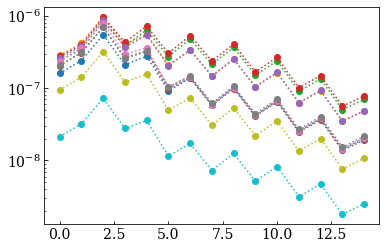

In [ ]:
nxvn = X_vec.reshape(v_range, N_range)
for v in range(v_range):
    plot(nxvn[v,:],'o:')
yscale('log')

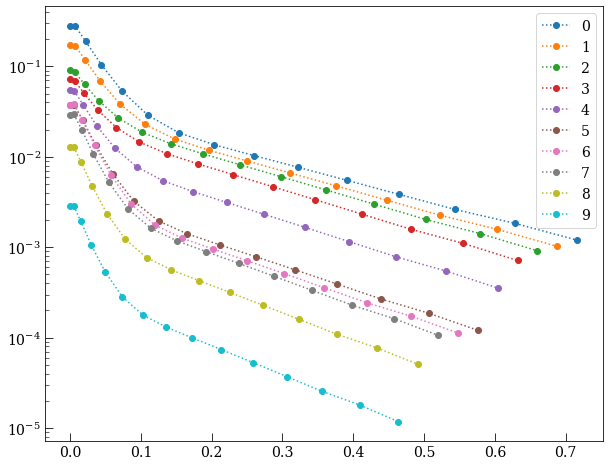

In [ ]:
nxvn_g = np.zeros([v_range, N_range])
for v in range(v_range):
    for N in range(N_range):
        nxvn_g[v,N] = nxvn[v,N]/((2*N+1)*(6-3*np.mod(N,2)))
    plot(E_rot_cal[v,0:N_range], nxvn_g[v,:]/sum(nxvn_g), 'o:', label=v)
    #plot(dens_saito[0,0:N_range],dens_saito[3,0:N_range]/sum(dens_saito[3,0:N_range]),'+:', c='black', label='Molecular Dynamics')
    #plot(nxvn_g[v,:]/sum(nxvn_g), 'o:')    
yscale('log')
#ylim(0.001,0.5)
legend()

font = {'family':'serif','weight':'normal','size': 14}
rc('font',**font)
rcParams['xtick.direction'] = 'in' # x axis in
rcParams['ytick.direction'] = 'in' # y axis in 
#rcParams['axes.linewidth'] = 0.8 # axis line width
rcParams['axes.grid'] = False # make grid
tick_params(length = 8, which='major')
tick_params(length = 4, which='minor')
gcf().set_size_inches([10,8])

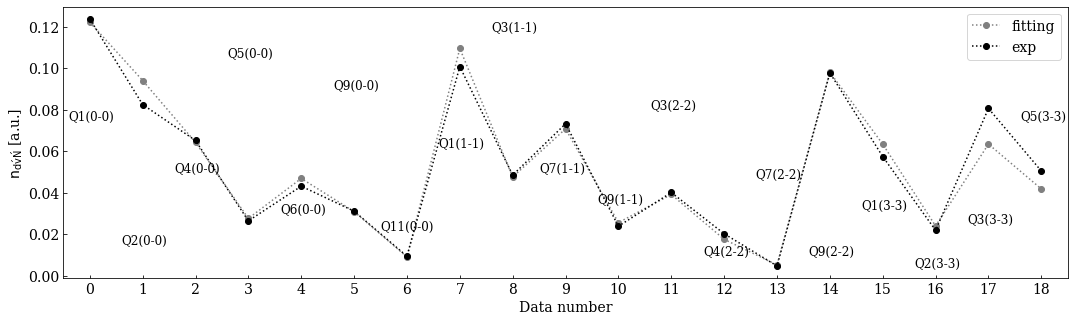

In [ ]:
# Font set-up
font = {'family':'serif','weight':'normal','size': 14}
plt.rc('font',**font)
gcf().set_size_inches([18,5])

#plot(range(len(Ndafit)),Ndafit,linestyle='dotted',c='black')
text(-0.4, 0.075, 'Q1(0-0)', fontsize=12)
text(0.6, 0.015, 'Q2(0-0)', fontsize=12)
text(1.6, 0.05, 'Q4(0-0)', fontsize=12)
text(2.6, 0.105, 'Q5(0-0)', fontsize=12)
text(3.6, 0.03, 'Q6(0-0)', fontsize=12)
text(4.6, 0.09, 'Q9(0-0)', fontsize=12)
text(5.5, 0.022, 'Q11(0-0)', fontsize=12)
text(6.6, 0.062, 'Q1(1-1)', fontsize=12)
text(7.6, 0.118, 'Q3(1-1)', fontsize=12)
text(8.5, 0.05, 'Q7(1-1)', fontsize=12)
text(9.6, 0.035, 'Q9(1-1)', fontsize=12)
text(10.6, 0.08, 'Q3(2-2)', fontsize=12)
text(11.6, 0.01, 'Q4(2-2)', fontsize=12)
text(12.6, 0.047, 'Q7(2-2)', fontsize=12)
text(13.6, 0.01, 'Q9(2-2)', fontsize=12)
text(14.6, 0.032, 'Q1(3-3)', fontsize=12)
text(15.6, 0.004, 'Q2(3-3)', fontsize=12)
text(16.6, 0.025, 'Q3(3-3)', fontsize=12)
text(17.6, 0.075, 'Q5(3-3)', fontsize=12)

plot(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), (R_mat @ nxvn.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]/sum((R_mat @ nxvn.flatten())[((inte*wl.T[0:14,0:4]/A.T).T).flatten() != 0]) ,'o:', c='gray', label='fitting')
plot(range(len(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0])), ((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]/sum(((inte*wl.T[0:14,0:4]/A.T).T)[inte.T!=0]), 'o:', c='black', label='exp')
#errorbar(range(len(Ndafit)),Ndafit,yerr=Ndafit_error,capsize=5,fmt='o',ecolor='black',markeredgecolor="black" ,color='black',label='data')

#ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}} / \Sigma_{\acute{v},\acute{N}} n_{d\acute{v}\acute{N}}}}$ [a.u.]')
ylabel(r'$\mathrm{n_{d \acute{v}\acute{N}}}$ [a.u.]')
xlabel('Data number')
xlim(-0.5,18.5,1)
xticks(np.arange(0, 19, 1))
#ylim(0,0.25)
legend()

#plot_as_emf(fig, filename="./figure/ndvJ_check.emf", bbox_inches="tight")
#pylab.savefig('./figure/ndvN_check.png', bbox_inches="tight", dpi=300)

In [ ]:
v_range = 4
N_range = 15
R_mat = np.zeros( [ndN.shape[1], ndN.shape[0], v_range, N_range] ) 
for vv in range(ndN.shape[1]):
    for NN in range(ndN.shape[0]):
        for v in range(v_range):
            for N in range(N_range):
                R_mat[vv,NN,v,N] = rtp_check[N,NN]*fcf[v,vv]*ccs[v,vv]
                #if(R_mat[vv,NN,v,N]<1e-2): # remove too small transition plobabilities

R_mat = R_mat.reshape(ndN.shape[1]*ndN.shape[0], v_range*N_range)
R_mat.shape

(56, 60)

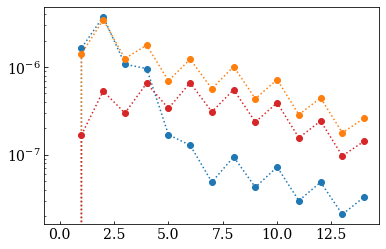

In [ ]:
X_vec = sp.optimize.nnls(R_mat[0:42,:], d_vec)[0]
nxvn = X_vec.reshape(v_range, N_range)

for v in range(v_range):
    plot(nxvn[v,:], 'o:')

yscale('log')

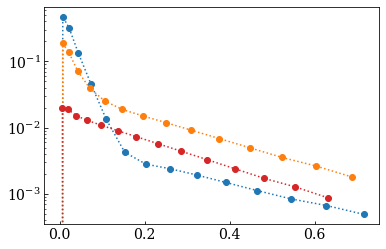

In [ ]:
nxvn_g = np.zeros([v_range, N_range])
for v in range(v_range):
    for N in range(N_range):
        nxvn_g[v,N] = nxvn[v,N]/((2*N+1)*(6-3*np.mod(N,2)))
    plot(E_rot_cal[v,0:N_range], nxvn_g[v,:]/sum(nxvn_g), 'o:')
    #plot(nxvn_g[v,:]/sum(nxvn_g), 'o:')    
yscale('log')

In [ ]:
A_sigma = np.array([(2.3387E+7+2.3479E+6+3.9083E+4+6.9282E+1+6.7372E-2+1.9986E-2+2.9027E-4+7.7599E-3),    
                    (2.1551E+6+1.8841E+7+4.4730E+6+1.2747E+5+2.7294E+2+4.3313E-1+3.4305E-2+3.5382E-2),
                    (1.8763E+5+3.8098E+6+1.4795E+7+6.3500E+6+2.4539E+5+6.9366E+2+2.0363E+0+2.0664E-3),
                    (1.7678E+4+5.2206E+5+4.9835E+6+1.1276E+7+7.9698E+6+4.1361E+5+1.3613E+3+6.0937E+0)
                   ])

In [ ]:
v_range = 3
vv_range = 3

def fitfunc(x, T_vib):
    nv = np.zeros(vv_range) 
    for v in range(v_range):
        for vv in range(vv_range): 
            nv[vv] += ccs[v,vv]*fcf[v,vv]*np.exp(-(E_vib[v]-E_vib[0])/(T_vib*k))/A_sigma[vv]
    print(nv)
    return nv[0:3]/sum(nv[0:3])

array_x = np.arange(len(fitv))
para_ini = np.array([10000])
para_opt_v, para_cov_v = sp.optimize.curve_fit(fitfunc, array_x, fitv/sum(fitv), para_ini)
para_err_v = np.sqrt(np.diag(para_cov_v))

print('T_vib =', para_opt_v)
#print('Covariance =', para_cov)
print('Standard error =', para_err_v)

[1.06663952e-08 9.88317465e-09 7.88732901e-09]


ValueError: operands could not be broadcast together with shapes (3,) (4,) 